# result analysis

## 1



### 关于 `unlearn_acc` 数据的分析：

1. **机器学习方法的表现差异**:
   - 不同的机器学习方法在 `unlearn_acc` 的多个指标上表现出显著差异。例如，一些方法在 `retain` 指标上表现优异，而另一些方法在 `forget` 指标上表现较好。这表明不同的unlearning方法可能适合不同的应用场景。

2. **模型和数据集的影响**:
   - 不同的数据集和模型组合对同一方法的性能有显著影响。例如，同样的方法在 CIFAR-10 和 CIFAR-100 数据集上的表现可能会有所不同。这表明数据集和模型选择对于unlearning的效果至关重要。

3. **整体性能的提升**:
   - 从 `ft_before` 到 `ft_after`，大多数方法的表现都有所提升，特别是在 `retain` 和 `val` 指标上。这表明进行了某种改进（可能是算法调整或数据预处理），提升了模型的整体性能。

4. **特定方法的改进效果**:
   - 一些特定的方法在改进后（`ft_after`）表现出明显的改进，尤其是在关键指标（如 `test` 和 `forget`）上。这表明这些方法在改进过程中受益最大，可能因为改进更好地适应了特定的数据或任务。

### 关于 `mia` 数据的分析：

1. **Membership Inference Attack（MIA） 的表现**:
   - MIA 的表现可以用来评估模型的隐私风险。通过分析 `ft_before` 和 `ft_after` 在 MIA 指标上的变化，我们可以看到某些方法在降低隐私泄露风险方面有所改进。这对于保护数据隐私和安全至关重要。

2. **不同方法的隐私保护能力**:
   - 不同的unlearning方法在MIA指标上的表现差异显著。一些方法在 `ft_after` 阶段显著降低了MIA的成功率，表明这些方法在隐私保护方面更为有效。这对选择合适的unlearning方法以提高模型的隐私性有指导意义。

3. **指标之间的平衡**:
   - 柱状图显示了模型在保持精度和降低MIA成功率之间的权衡。某些方法可能在精度上有所妥协以降低隐私泄露的风险，而其他方法则可能在保持高精度的同时提供有限的隐私保护。

### 总结:
从以上分析可以看出，`ft_before` 和 `ft_after` 阶段的大多数方法都表现出明显的改进，尤其是在性能和隐私保护方面。不同的数据集和模型组合对方法的影响显著，选择合适的方法和配置对实现预期效果至关重要。此外，MIA分析提供了关于模型隐私风险的重要信息，帮助理解和减少数据泄露的潜在风险。



## 2

基于以上实验数据的可视化分析，可以得到以下几点结论：

1. **性能变化的整体趋势**:
   - 从并行坐标图和小提琴图可以看出，大多数方法在 `ft_after` 阶段比 `ft_before` 有更好的性能。这表明进行了某种改进，提升了整体模型的性能。

2. **不同方法的稳定性和分布**:
   - 通过小提琴图，可以观察到 `ft_before` 和 `ft_after` 阶段的不同方法在数据分布上的差异。某些方法在改进后（`ft_after`）有更集中的分布，这表明改进后的方法可能更加稳定，减少了性能的波动。

3. **方法间的性能差异**:
   - 从散点矩阵图可以看出，各种方法在不同指标上的表现差异。有些方法在某些特定的指标上明显优于其他方法，这有助于识别出最适合某一类任务的最佳方法。

4. **三维空间中的数据聚类**:
   - 通过三维散点图，我们能够看到在 `retain`、`forget` 和 `val` 这些关键指标上的数据分布情况。我们可以识别出哪些方法在这些指标上表现更为出色或相对均衡。

5. **数据点间的相似性和关系**:
   - 网络图展示了 `ft_before` 和 `ft_after` 数据点之间的相似性。我们可以看到，许多数据点在改进后（`ft_after`）趋于更接近，表明改进可能使得模型的不同部分更加一致或协调。

6. **特定方法的改进效果**:
   - 在针对特定方法的图中，可以看出某些方法在 `ft_after` 的表现明显改善，尤其是在特定的指标上。这有助于识别出哪些方法在改进过程中收益最大，哪些指标受到了最大影响。

### 总结:
总体而言，这些图表展示了在 `ft_before` 和 `ft_after` 阶段不同方法的性能变化和分布情况。我们观察到，在大多数情况下，`ft_after` 阶段的性能优于 `ft_before`，这表明改进对模型的整体性能有正面影响。此外，不同方法在不同指标上的表现差异也表明，特定任务可能需要特定的方法来获得最佳效果。这些结论可以帮助进一步优化模型和方法，针对具体的应用场景进行调整和改进。


# unlearn acc

## by (dataset,model)

/tmp/ipykernel_247547/1542137341.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  method = row[0]


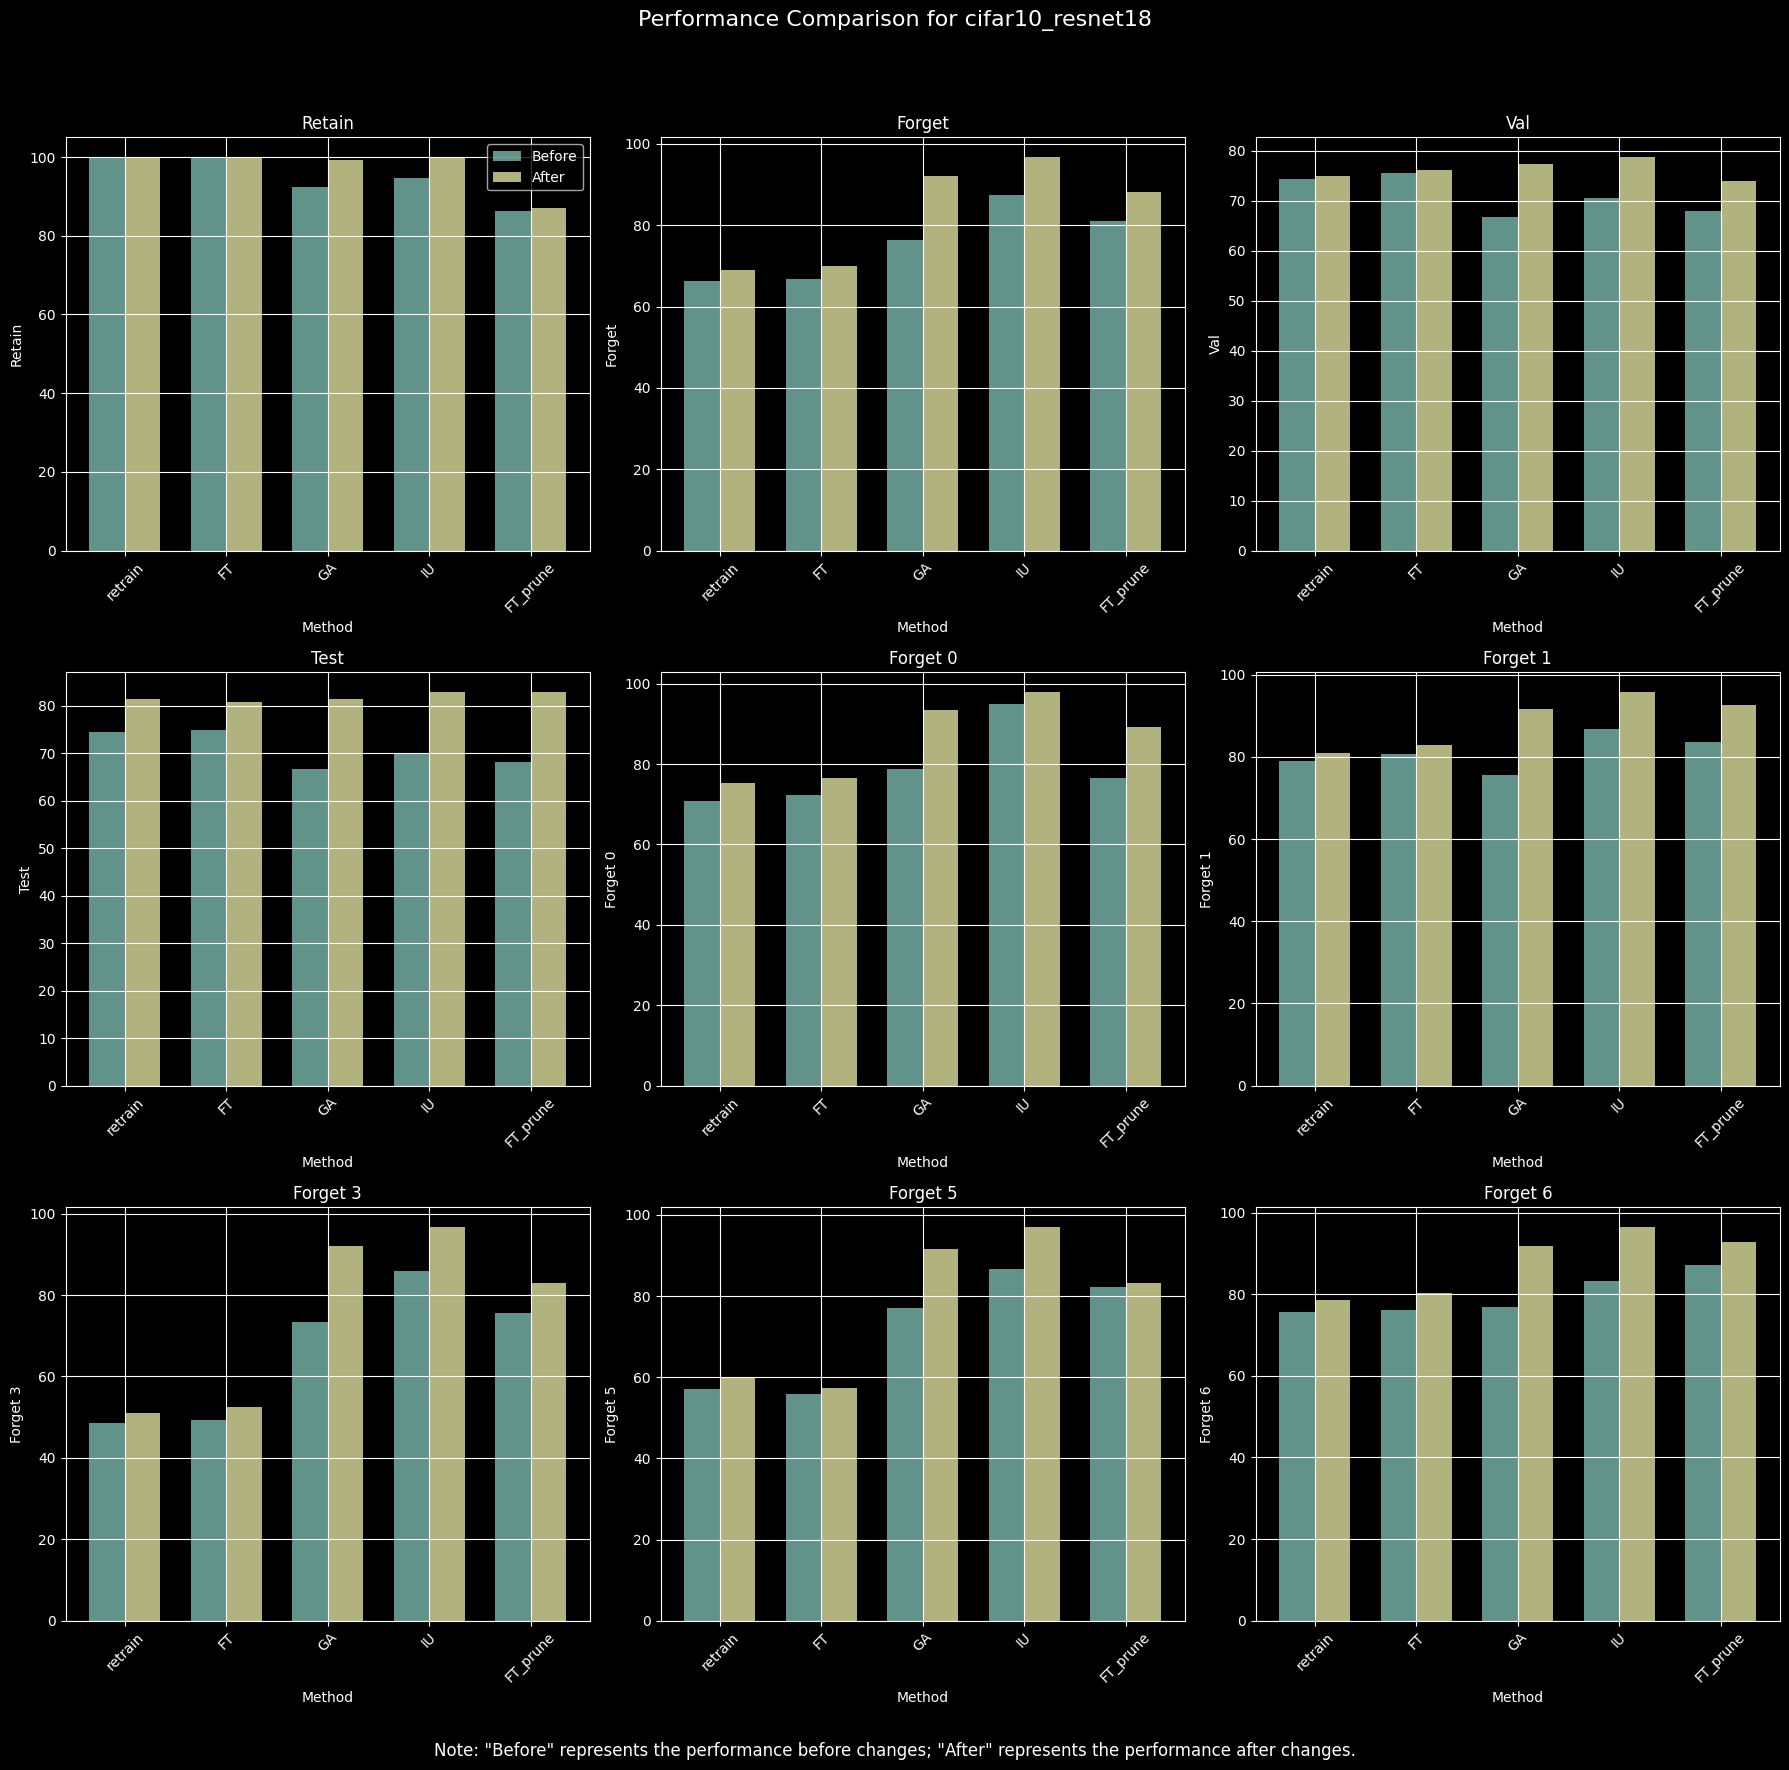

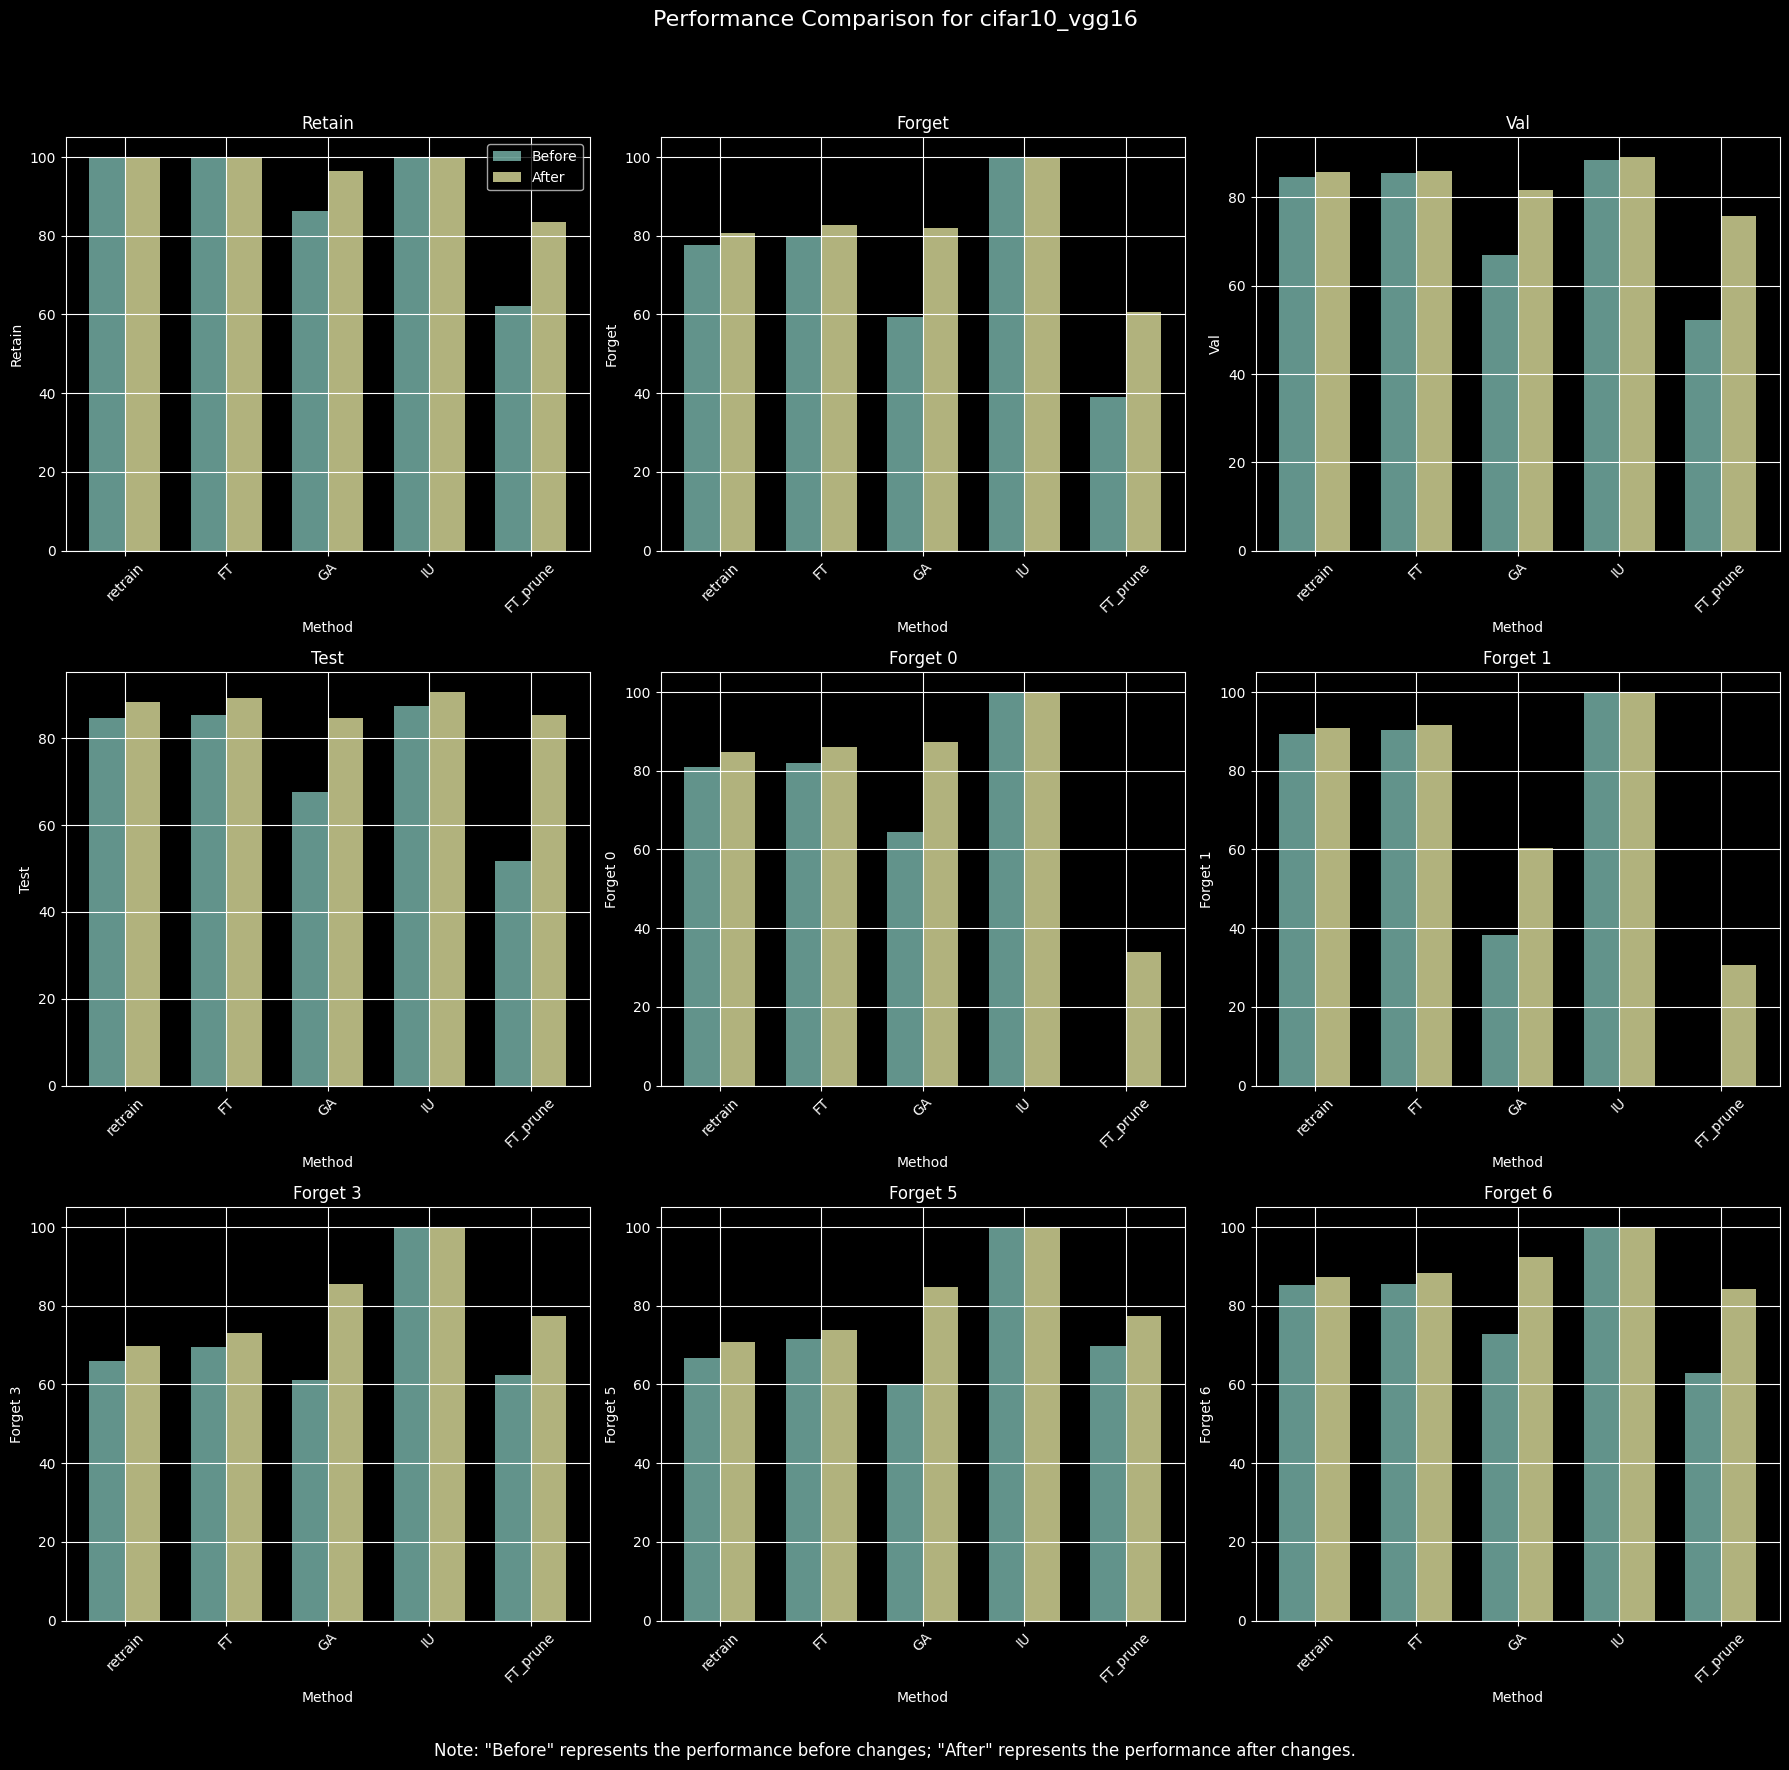

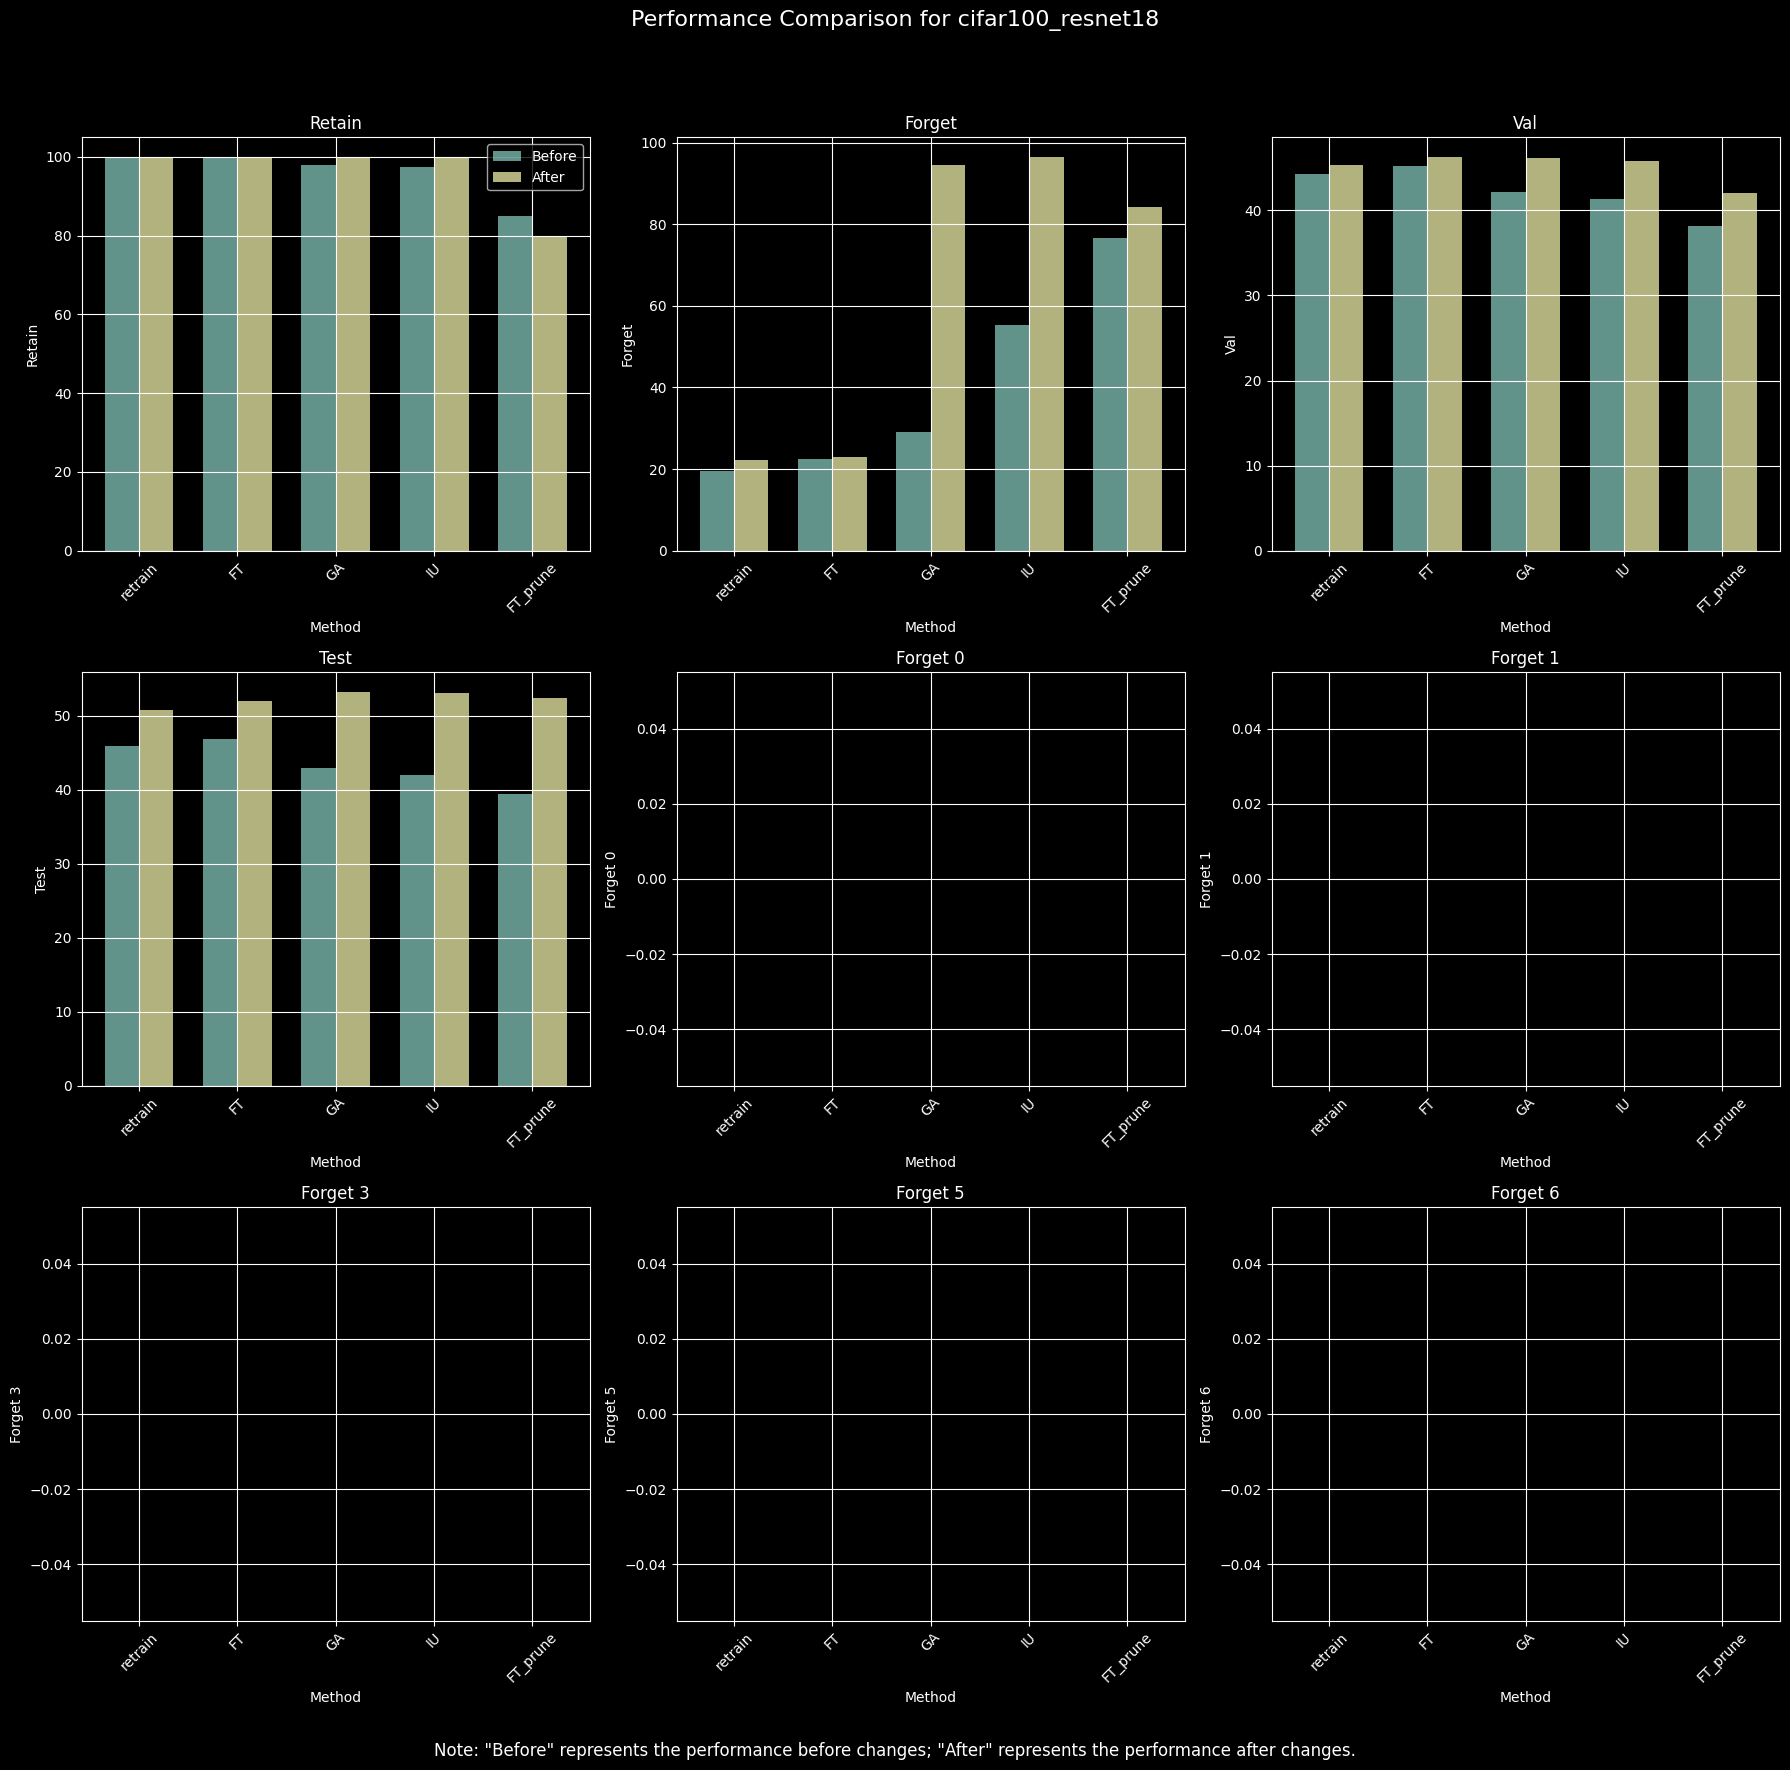

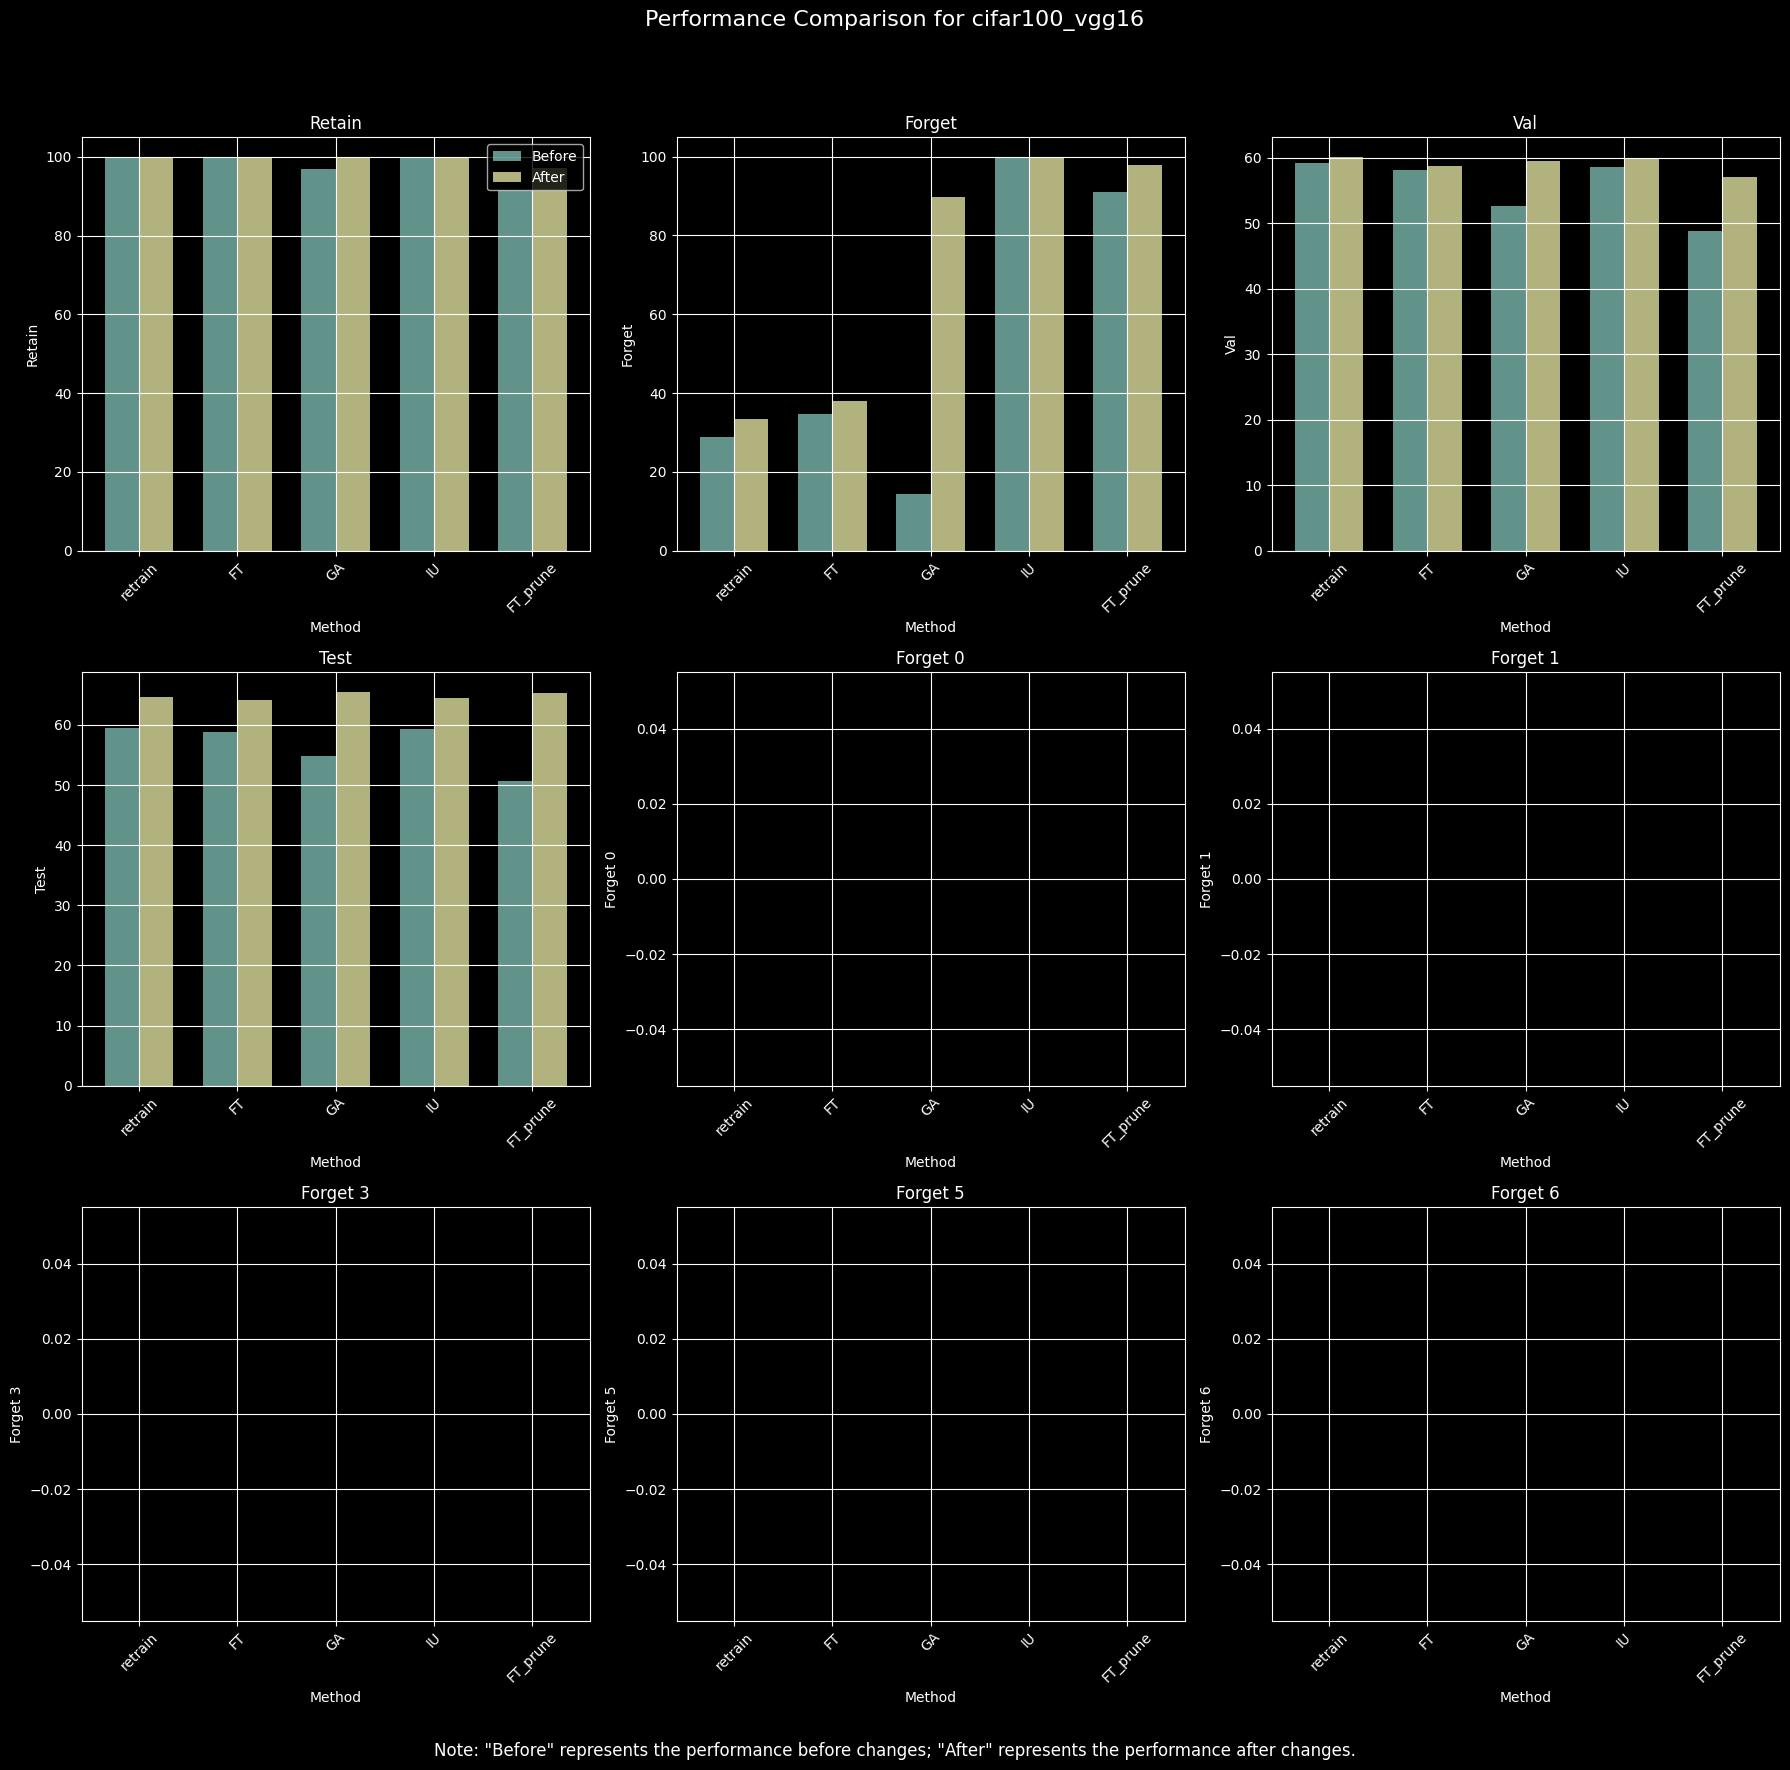

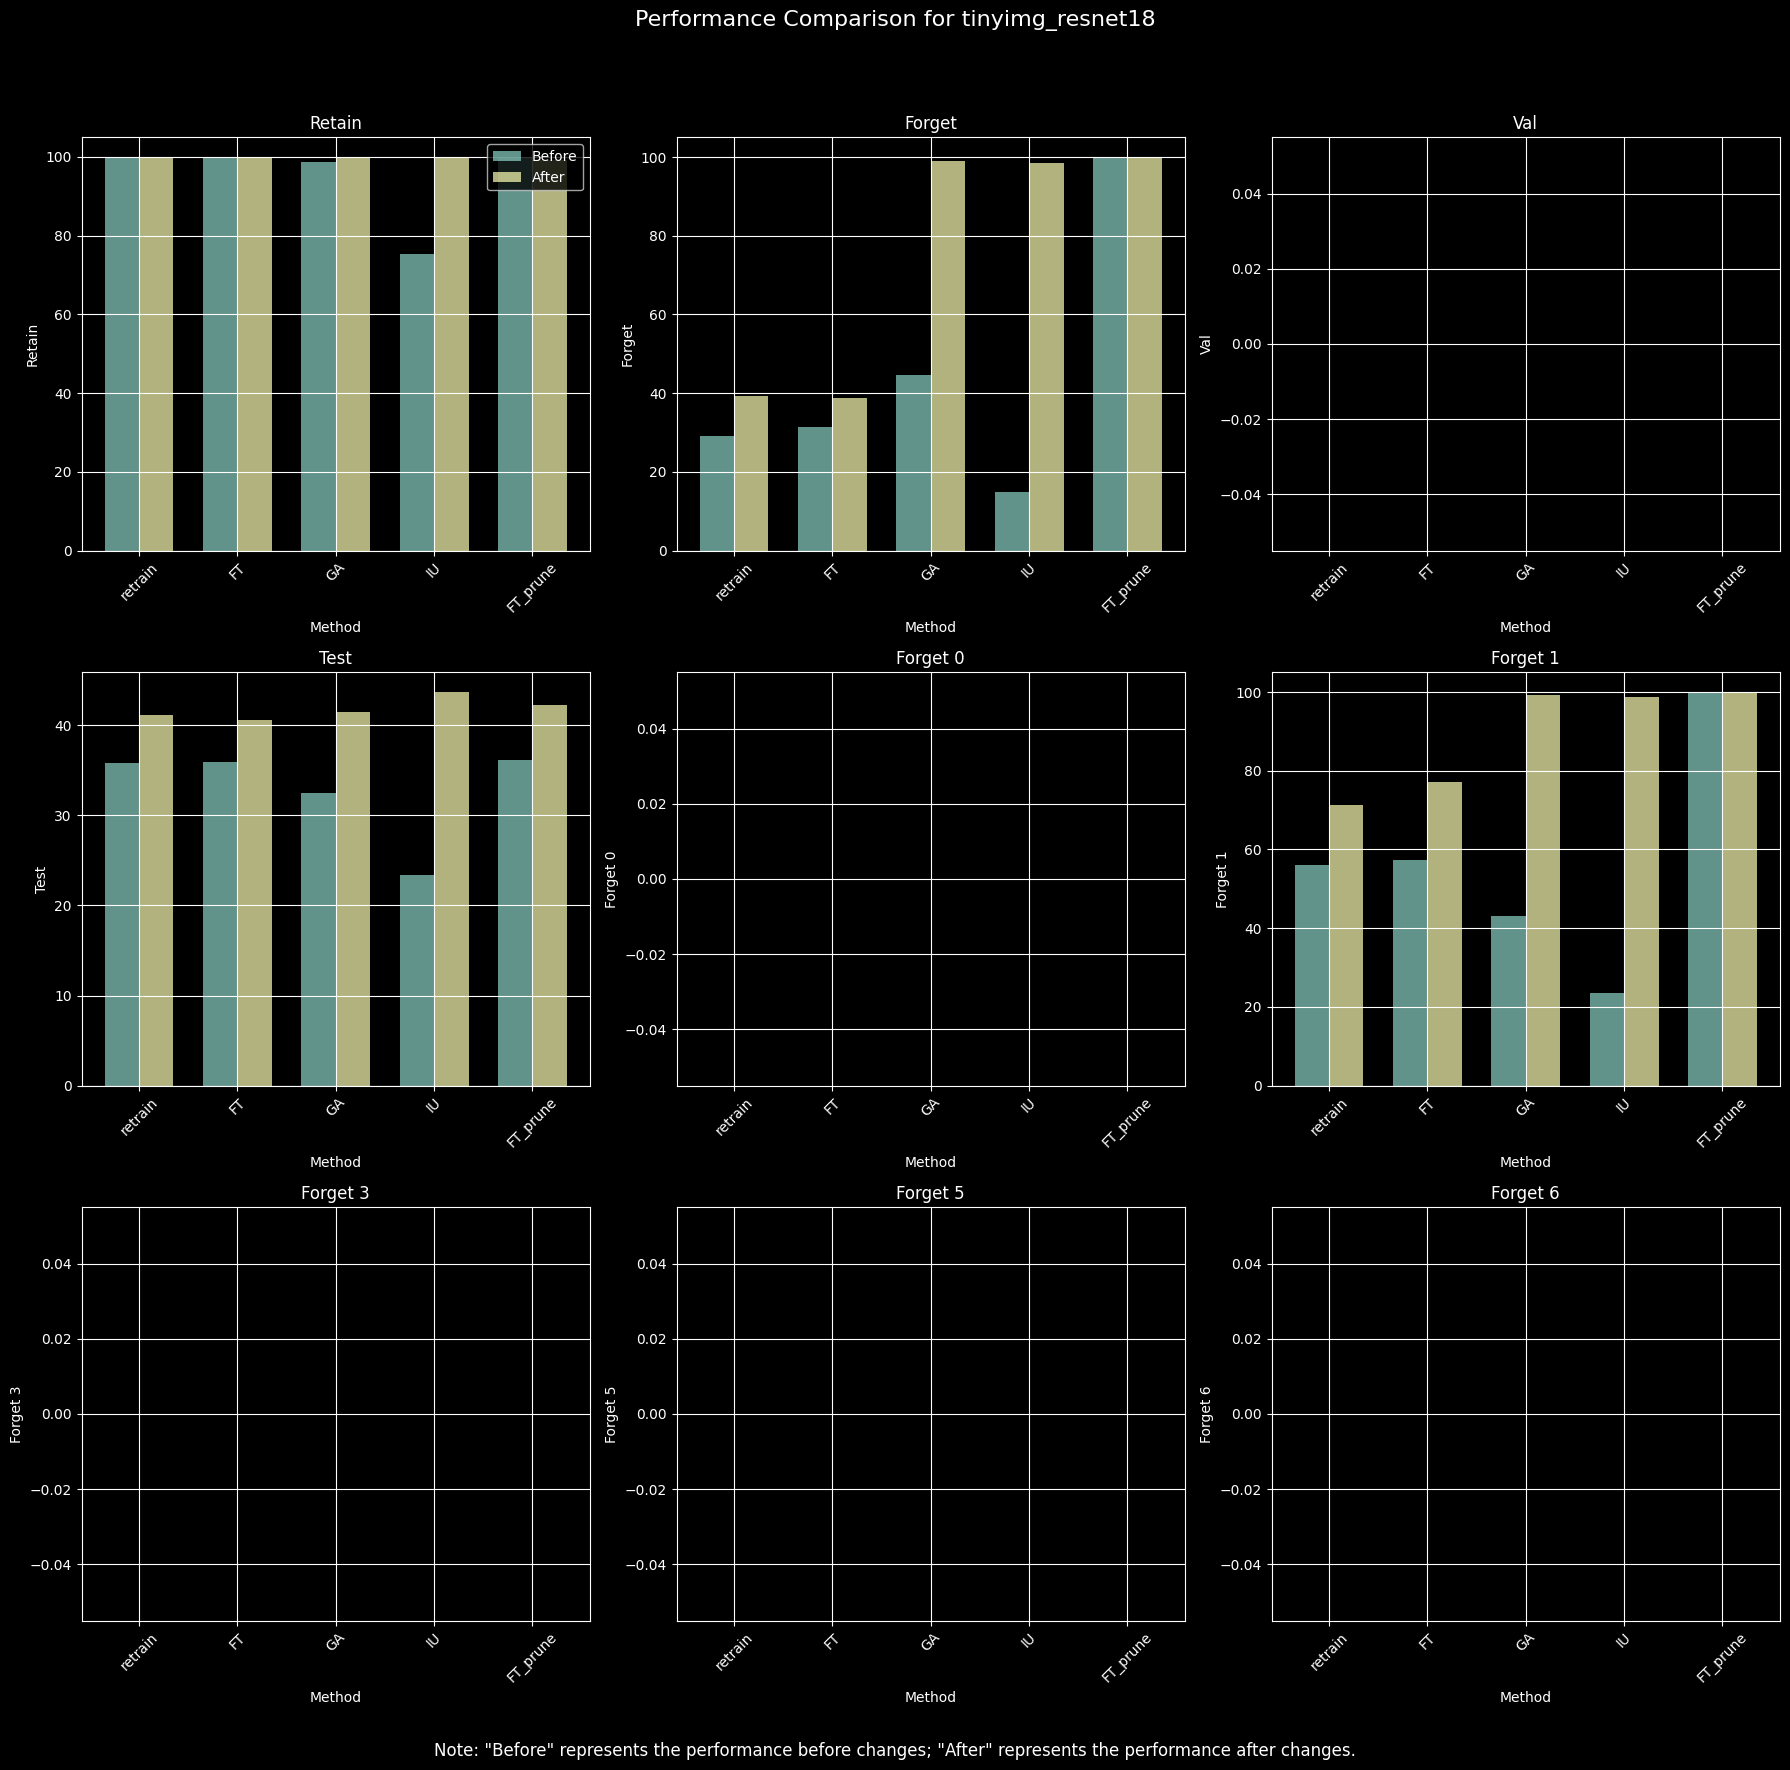

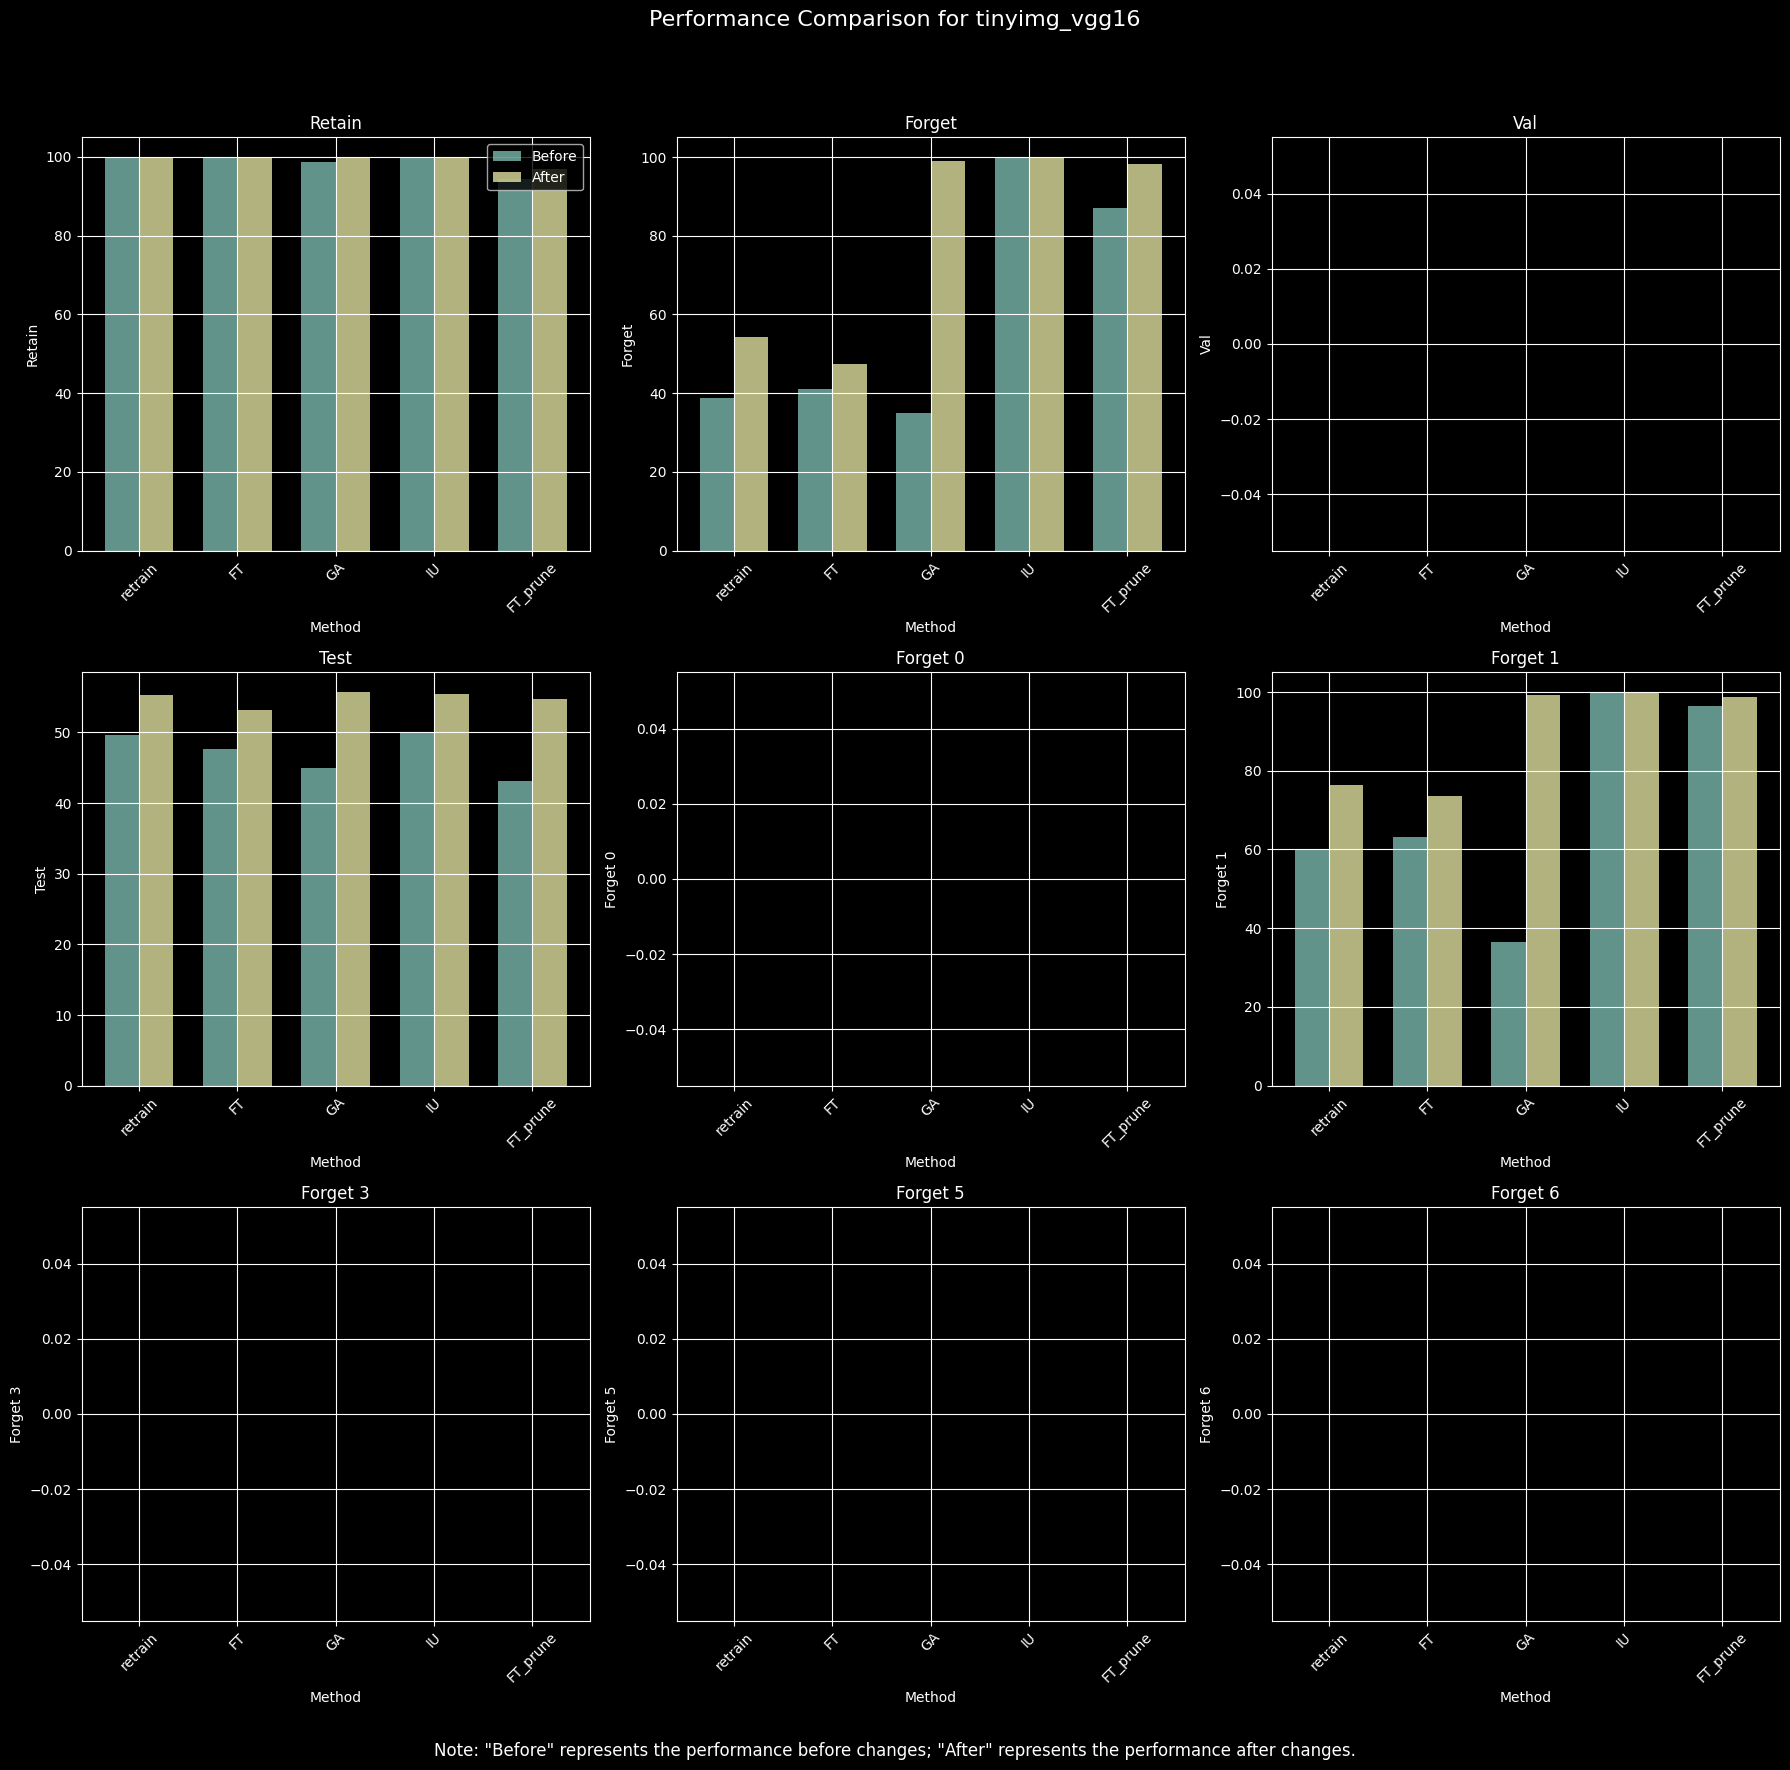

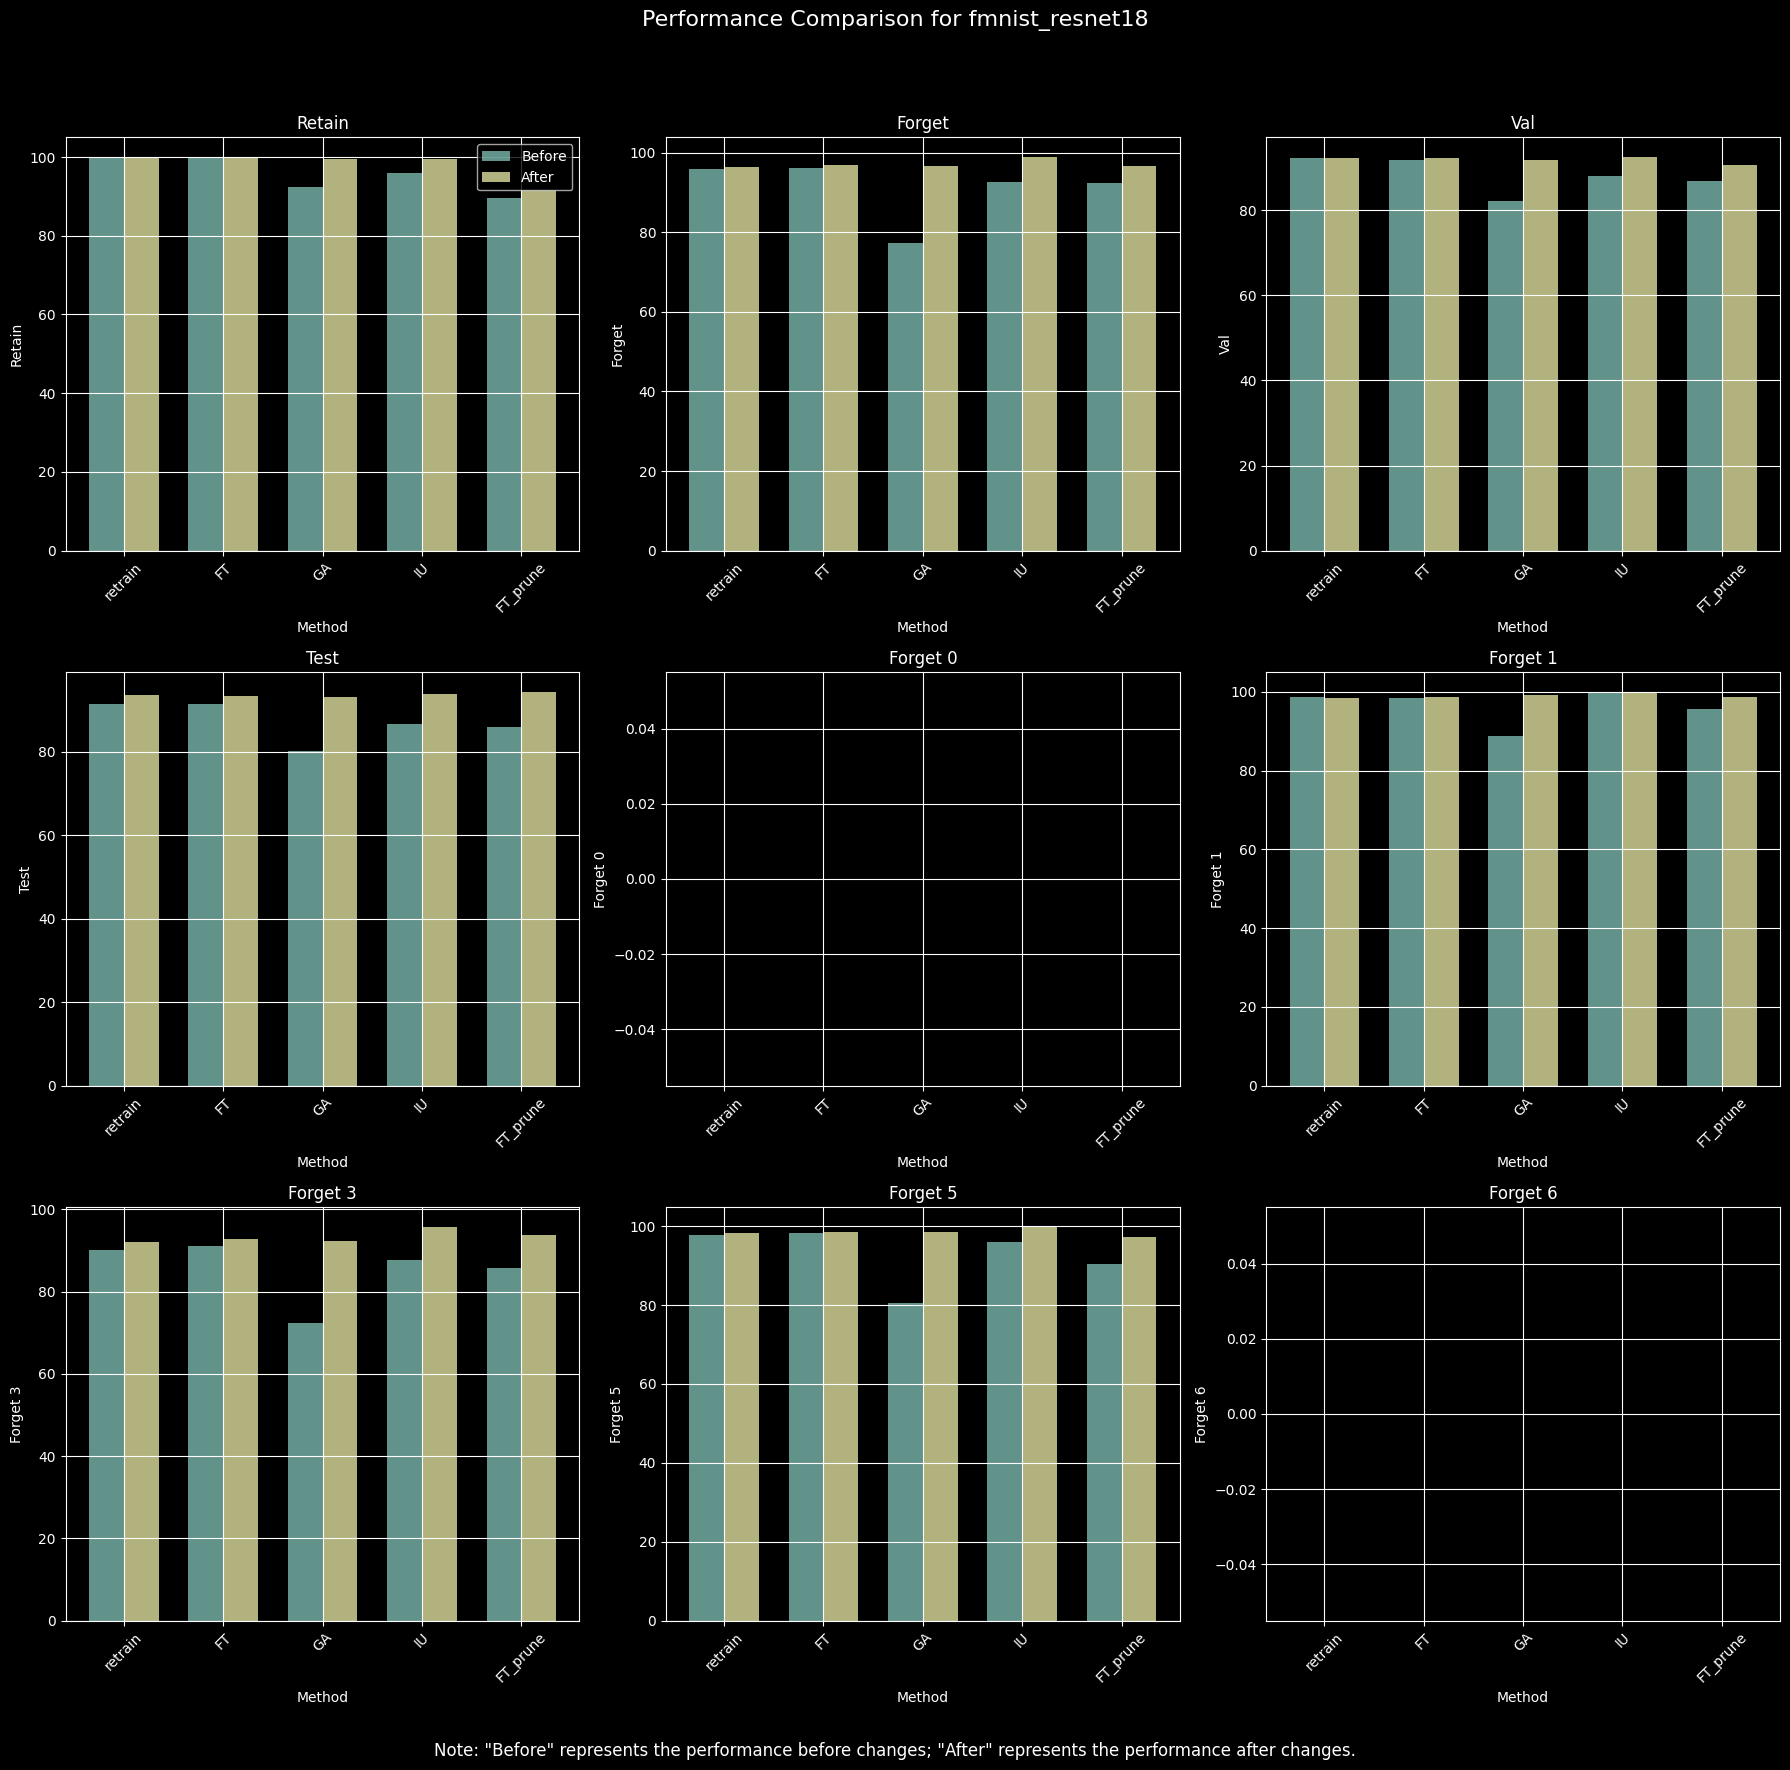

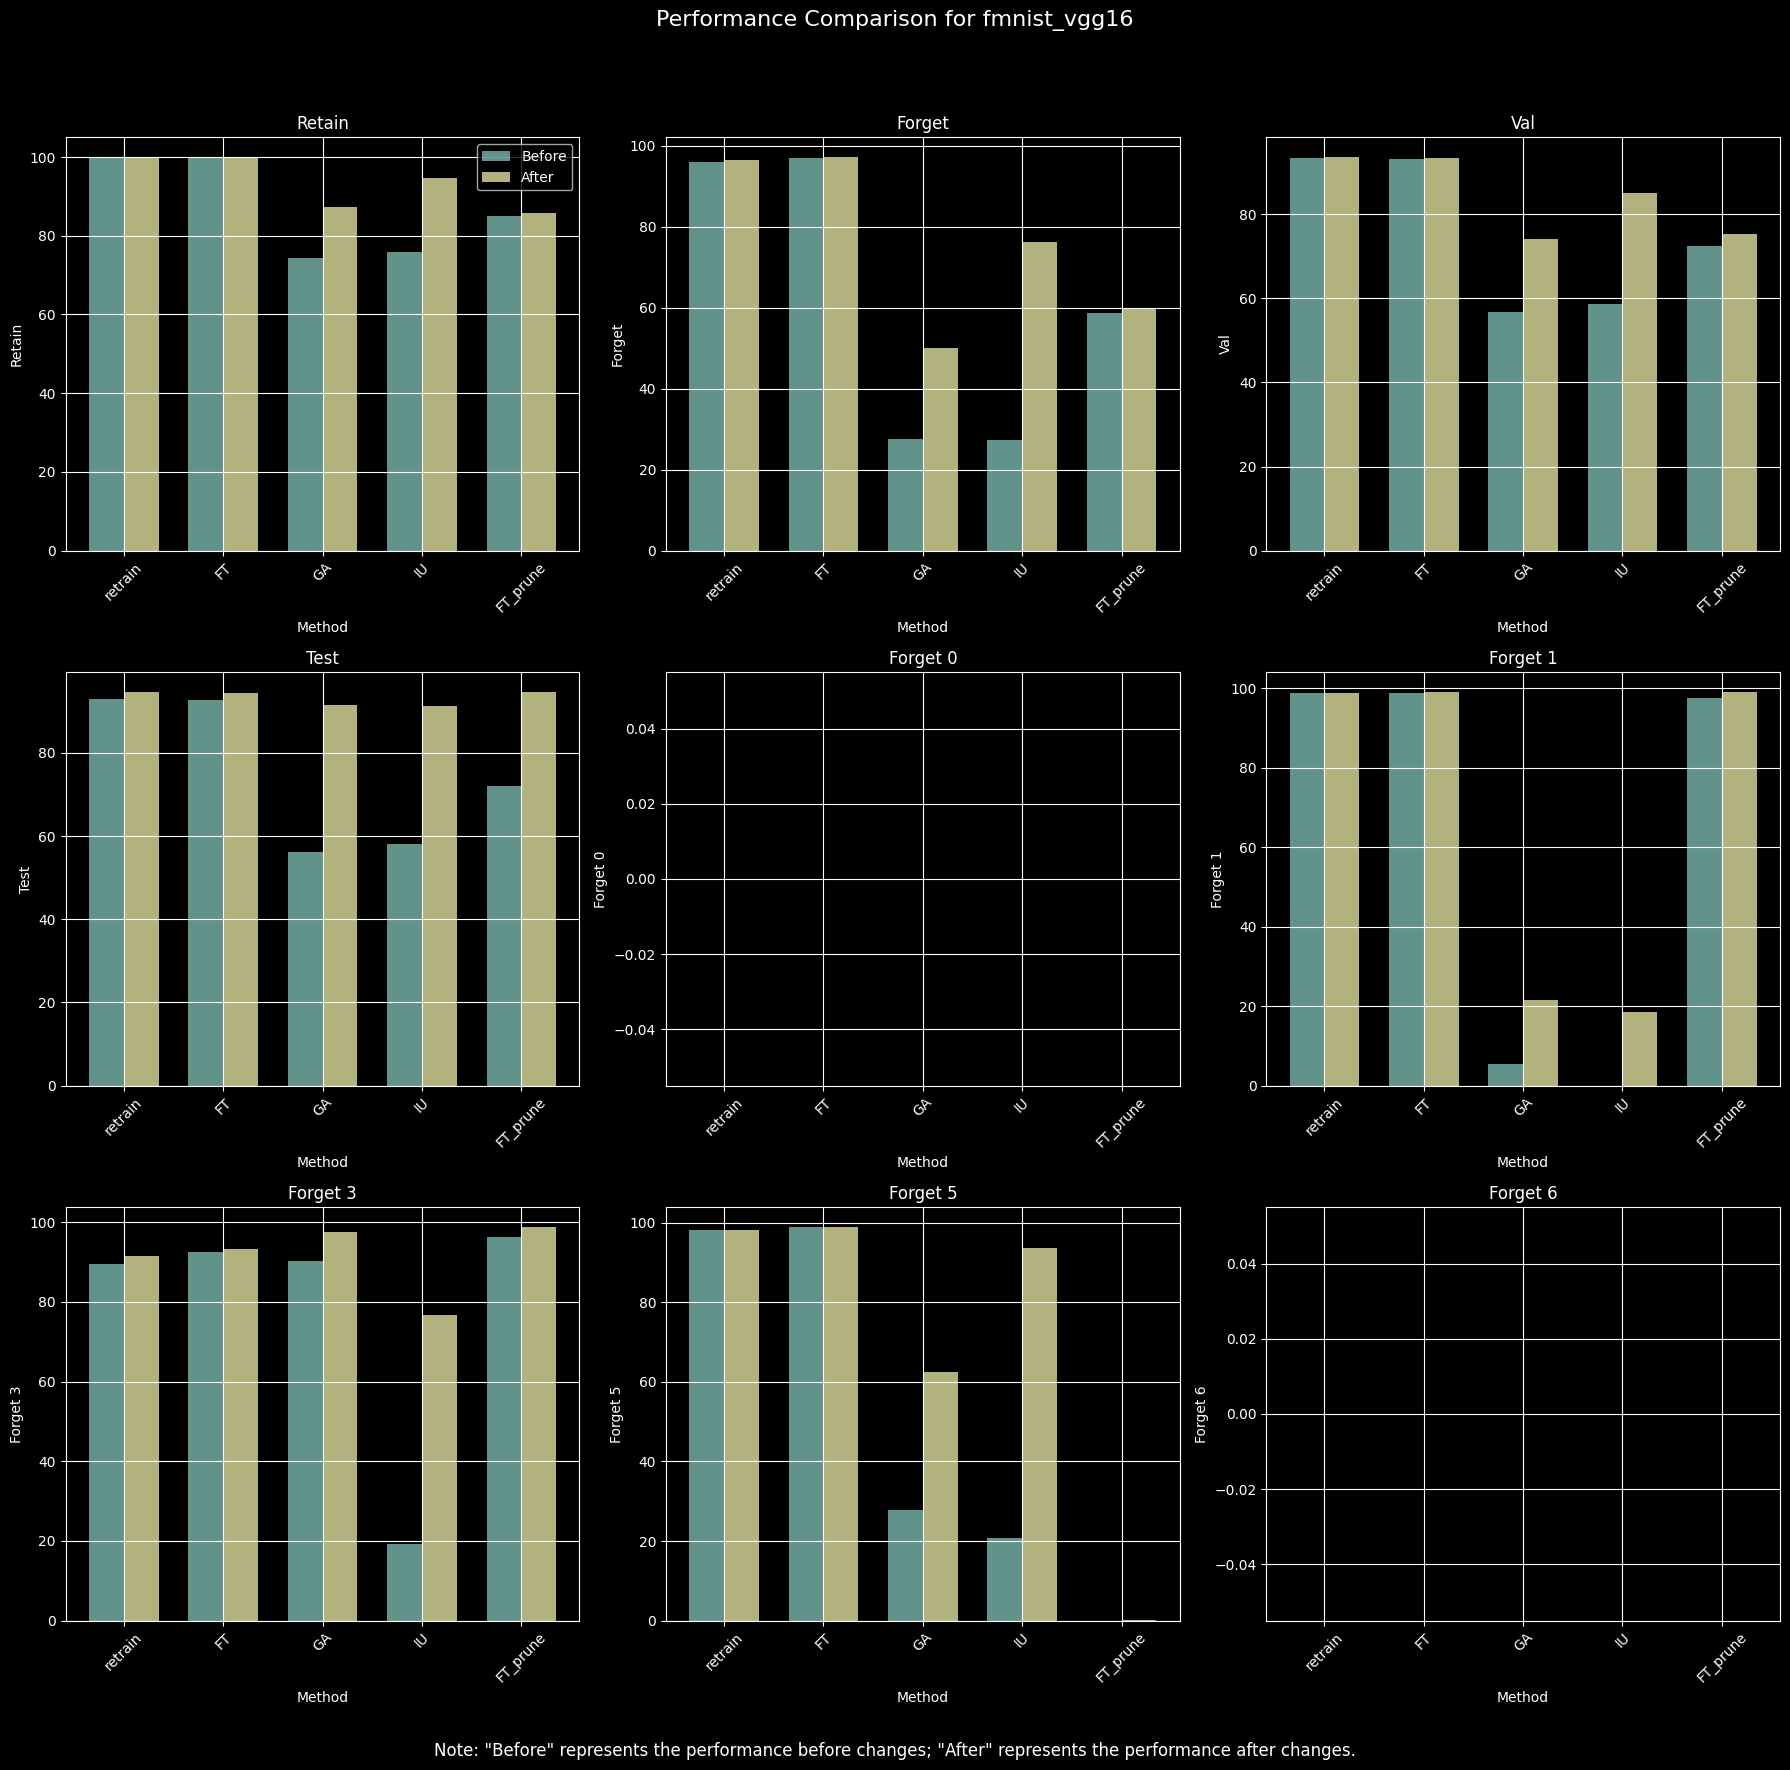

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import zipfile

# # Step 1: Unzip the files
# ft_before_extract_path = '/mnt/data/ft_before_corrected'
# ft_after_extract_path = '/mnt/data/ft_after_corrected'

# with zipfile.ZipFile('/mnt/data/ft_before.zip', 'r') as zip_ref:
#     zip_ref.extractall(ft_before_extract_path)

# with zipfile.ZipFile('/mnt/data/ft_after.zip', 'r') as zip_ref:
#     zip_ref.extractall(ft_after_extract_path)

# Step 2: Define the paths for 'unlearn_acc.csv' files
# ft_before_correct_path = os.path.join(ft_before_extract_path, 'ft_before', 'unlearn_acc.csv')
# ft_after_correct_path = os.path.join(ft_after_extract_path, 'ft_after', 'unlearn_acc.csv')

ft_before_correct_path = os.path.join('ft_before', 'unlearn_acc.csv')
ft_after_correct_path = os.path.join('ft_after', 'unlearn_acc.csv')

# Step 3: Load the CSV files into DataFrames
unlearn_acc_df = pd.read_csv(ft_before_correct_path)
unlearn_acc_after_df = pd.read_csv(ft_after_correct_path)

# Step 4: Correct the JSON format in the DataFrames
def correct_json_format(json_str):
    return json_str.replace("'", '"')

unlearn_acc_df_corrected = unlearn_acc_df.copy()
unlearn_acc_after_df_corrected = unlearn_acc_after_df.copy()

for i in range(1, unlearn_acc_df_corrected.shape[1]):
    unlearn_acc_df_corrected.iloc[:, i] = unlearn_acc_df_corrected.iloc[:, i].apply(correct_json_format)
    unlearn_acc_after_df_corrected.iloc[:, i] = unlearn_acc_after_df_corrected.iloc[:, i].apply(correct_json_format)

# Step 5: Filter out rows with non-dictionary JSON data
def is_valid_json(val):
    try:
        data = json.loads(val)
        return isinstance(data, dict)
    except (json.JSONDecodeError, TypeError):
        return False

filtered_df = unlearn_acc_df_corrected.copy()
filtered_after_df = unlearn_acc_after_df_corrected.copy()

for col in filtered_df.columns[1:]:
    filtered_df = filtered_df[filtered_df[col].apply(is_valid_json)]
    filtered_after_df = filtered_after_df[filtered_after_df[col].apply(is_valid_json)]

# Step 6: Extract the valid data keys
first_valid_data_cell = json.loads(filtered_df.iloc[0, 1])
valid_data_keys = first_valid_data_cell.keys()

# Step 7: Function to plot 9-grid comparison for a given dataset, handling None values
def plot_comparison(dataset_column):
    fig, axes = plt.subplots(3, 3, figsize=(18, 18))
    axes = axes.flatten()

    for idx, key in enumerate(valid_data_keys):
        ax = axes[idx]
        before_values = []
        after_values = []
        labels = []

        for i, row in filtered_df.iterrows():
            method = row[0]
            before_data = json.loads(row[dataset_column])
            before_values.append(before_data.get(key, 0))  # Use 0 for None values
            labels.append(method)

            after_row = filtered_after_df[filtered_after_df.iloc[:, 0] == method]
            if not after_row.empty:
                after_data = json.loads(after_row.iloc[0][dataset_column])
                after_values.append(after_data.get(key, 0))  # Use 0 for None values
            else:
                after_values.append(0)

        x = range(len(labels))
        width = 0.35

        ax.bar(x, before_values, width=width, label='Before', alpha=0.7)
        ax.bar([p + width for p in x], after_values, width=width, label='After', alpha=0.7)

        ax.set_title(f'{key.capitalize()}')
        ax.set_xlabel('Method')
        ax.set_ylabel(f'{key.capitalize()}')
        ax.set_xticks([p + width/2 for p in x])
        ax.set_xticklabels(labels, rotation=45)
        ax.grid(True)
        if idx == 0:
            ax.legend()

    fig.suptitle(f'Performance Comparison for {dataset_column}', fontsize=16)
    plt.figtext(0.5, 0.01, 'Note: "Before" represents the performance before changes; "After" represents the performance after changes.', ha='center', fontsize=12)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Step 8: List of datasets to plot and plotting for each dataset
datasets = ['cifar10_resnet18', 'cifar10_vgg16', 'cifar100_resnet18', 
            'cifar100_vgg16', 'tinyimg_resnet18', 'tinyimg_vgg16', 
            'fmnist_resnet18', 'fmnist_vgg16']

for dataset in datasets:
    plot_comparison(dataset)


## by MU method

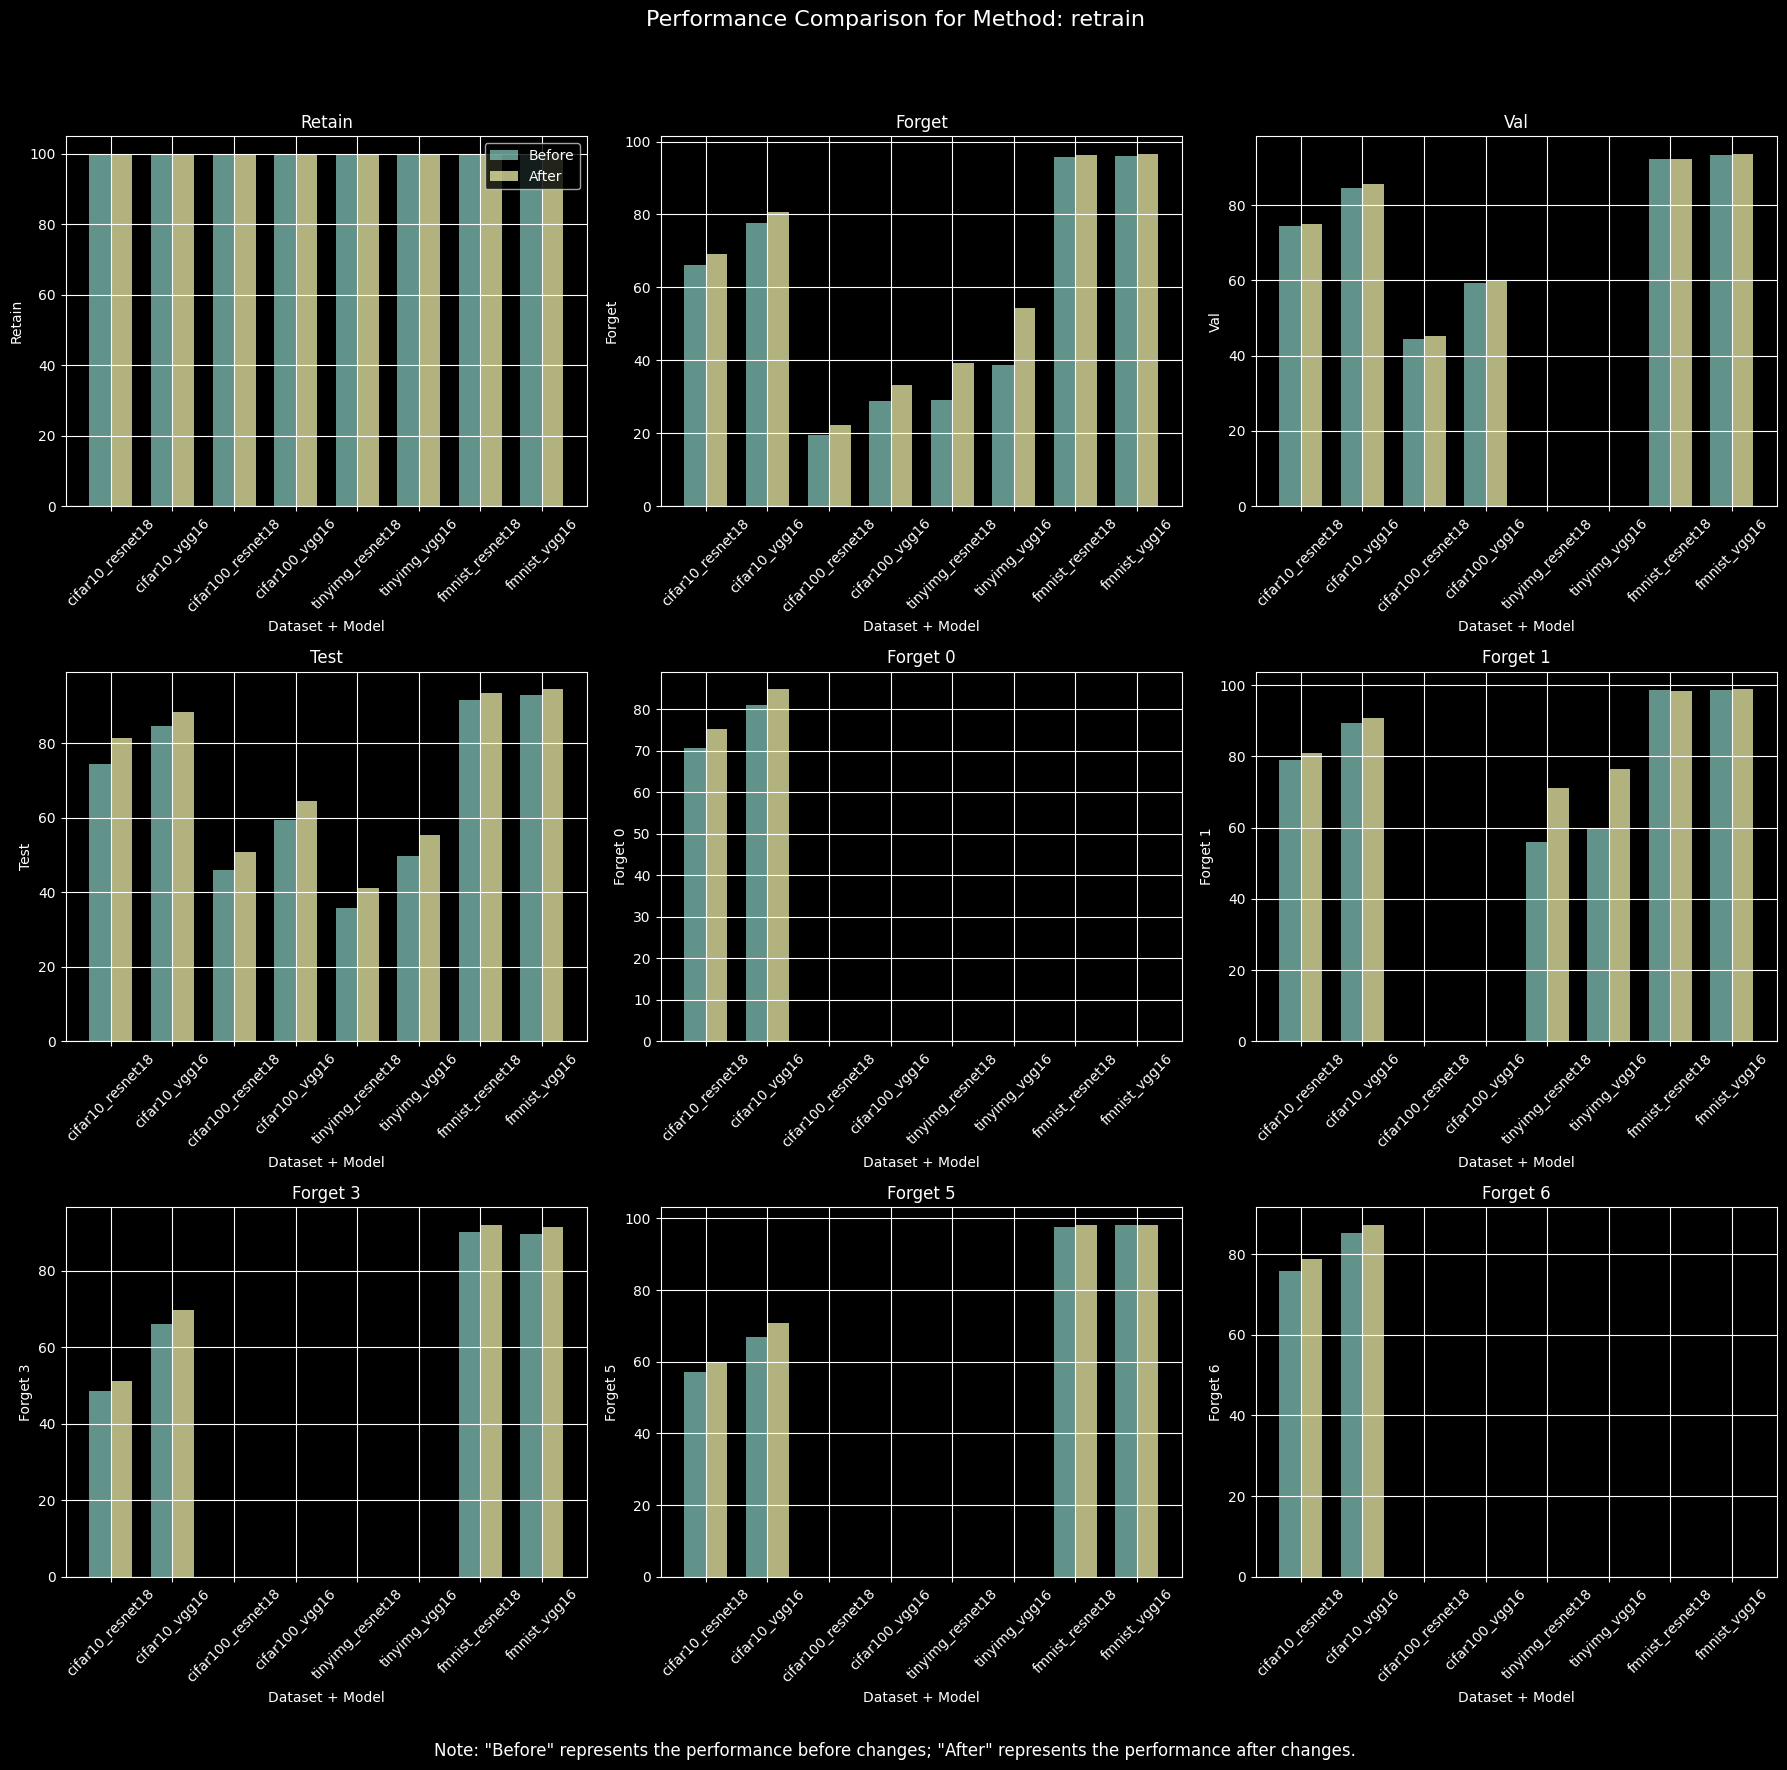

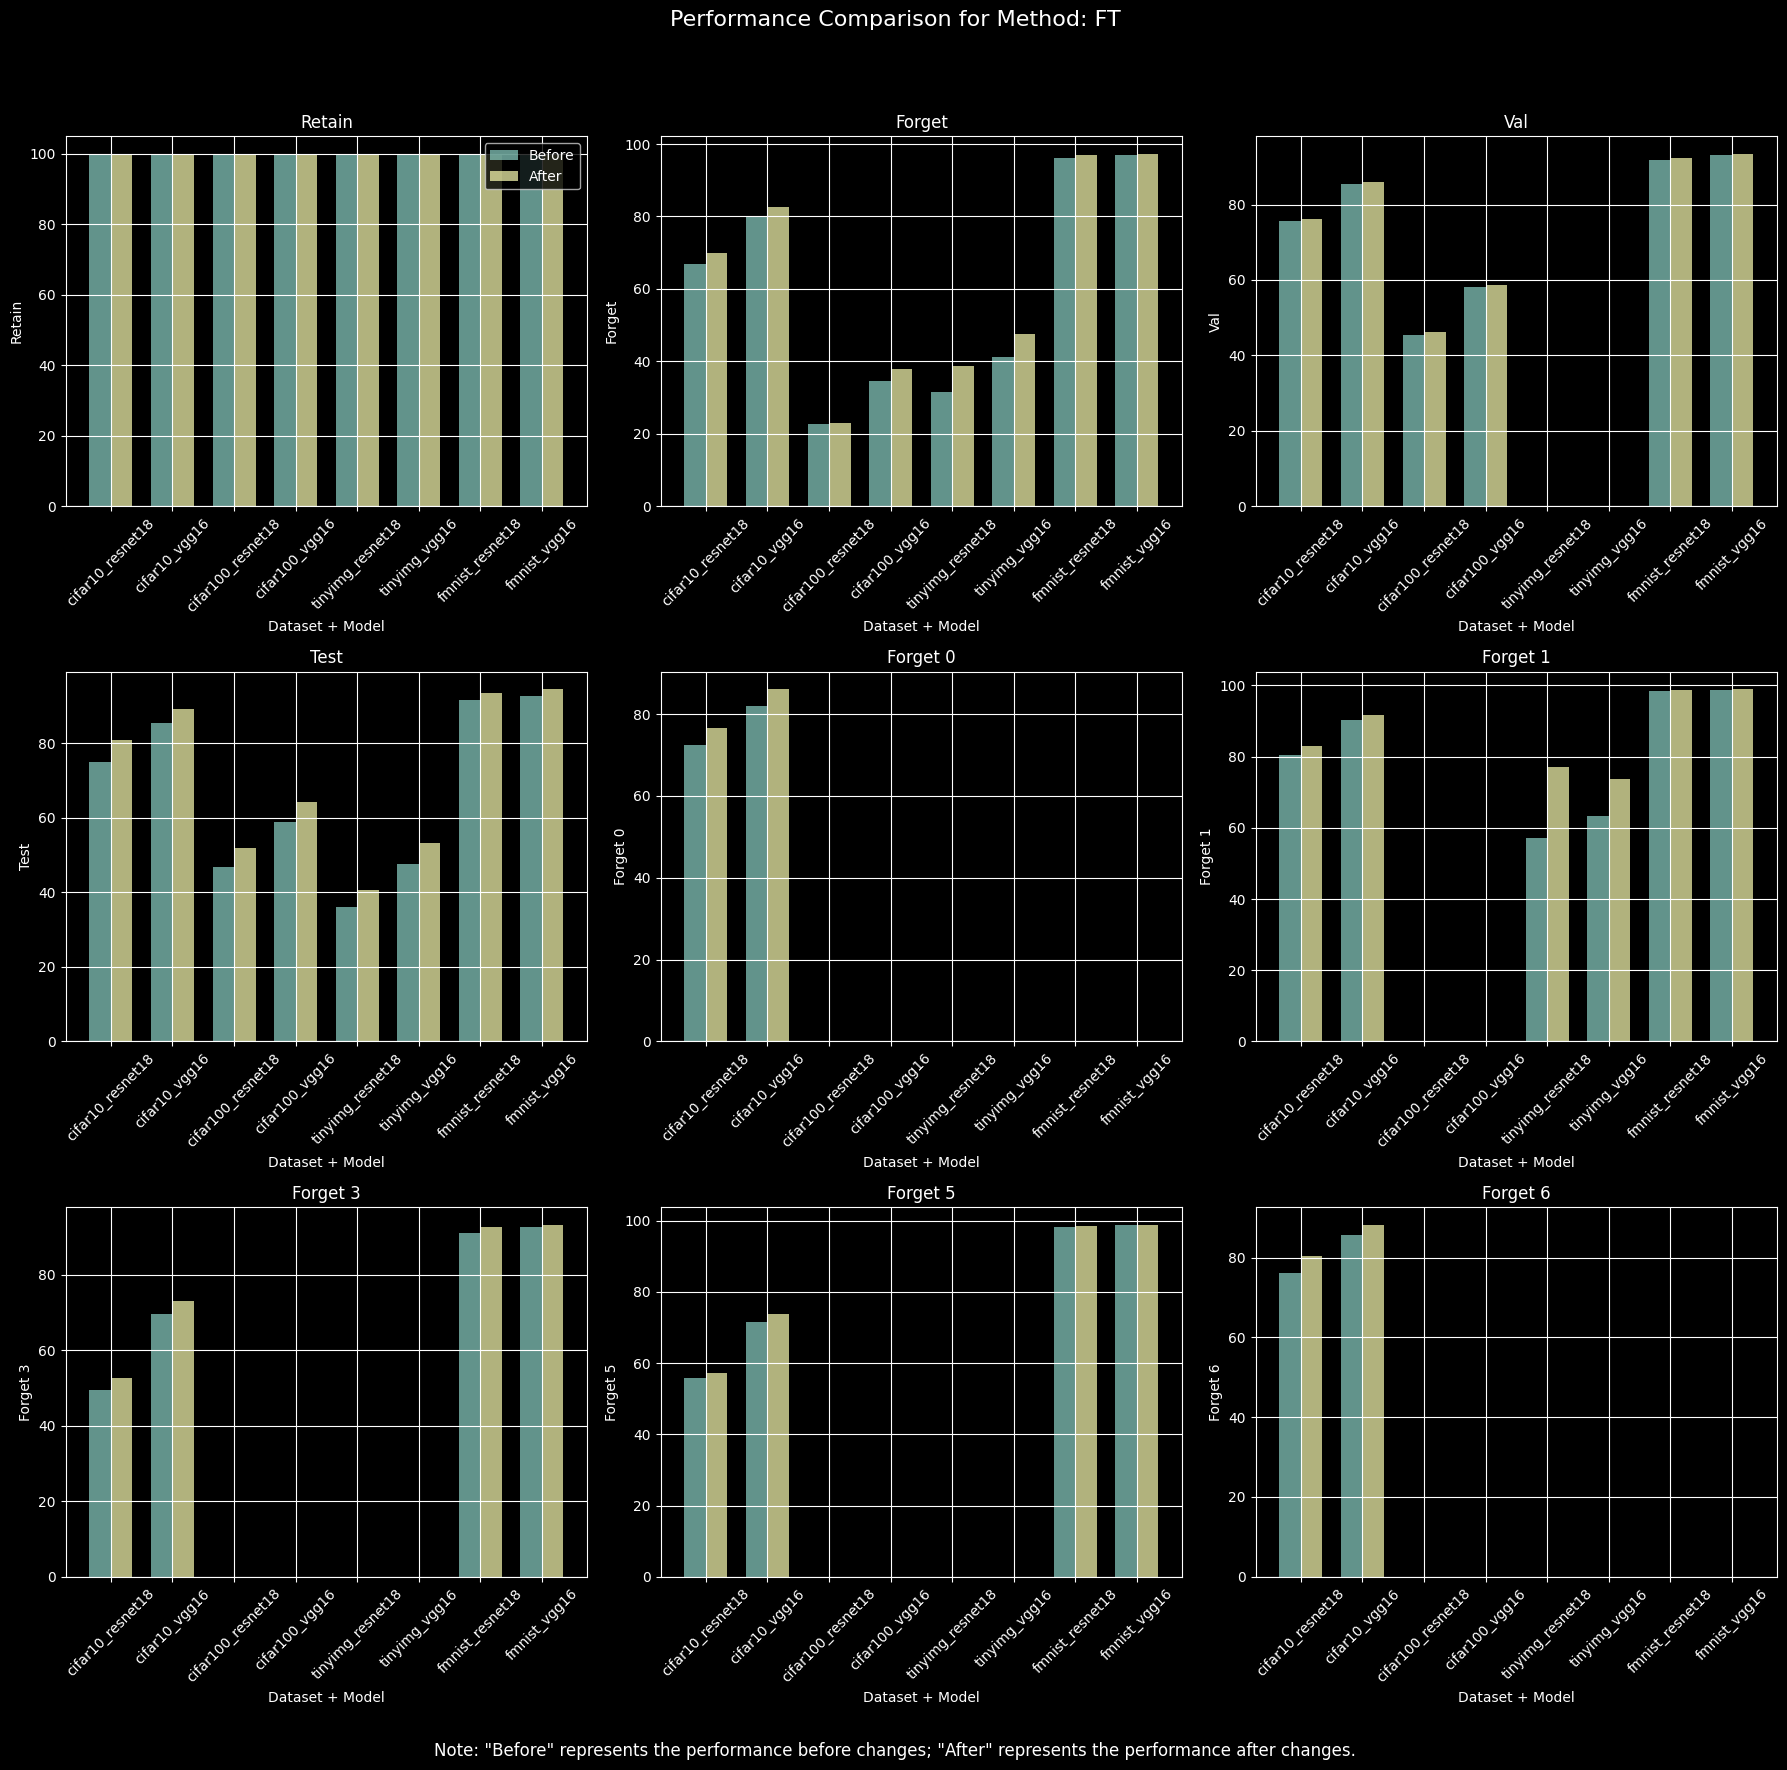

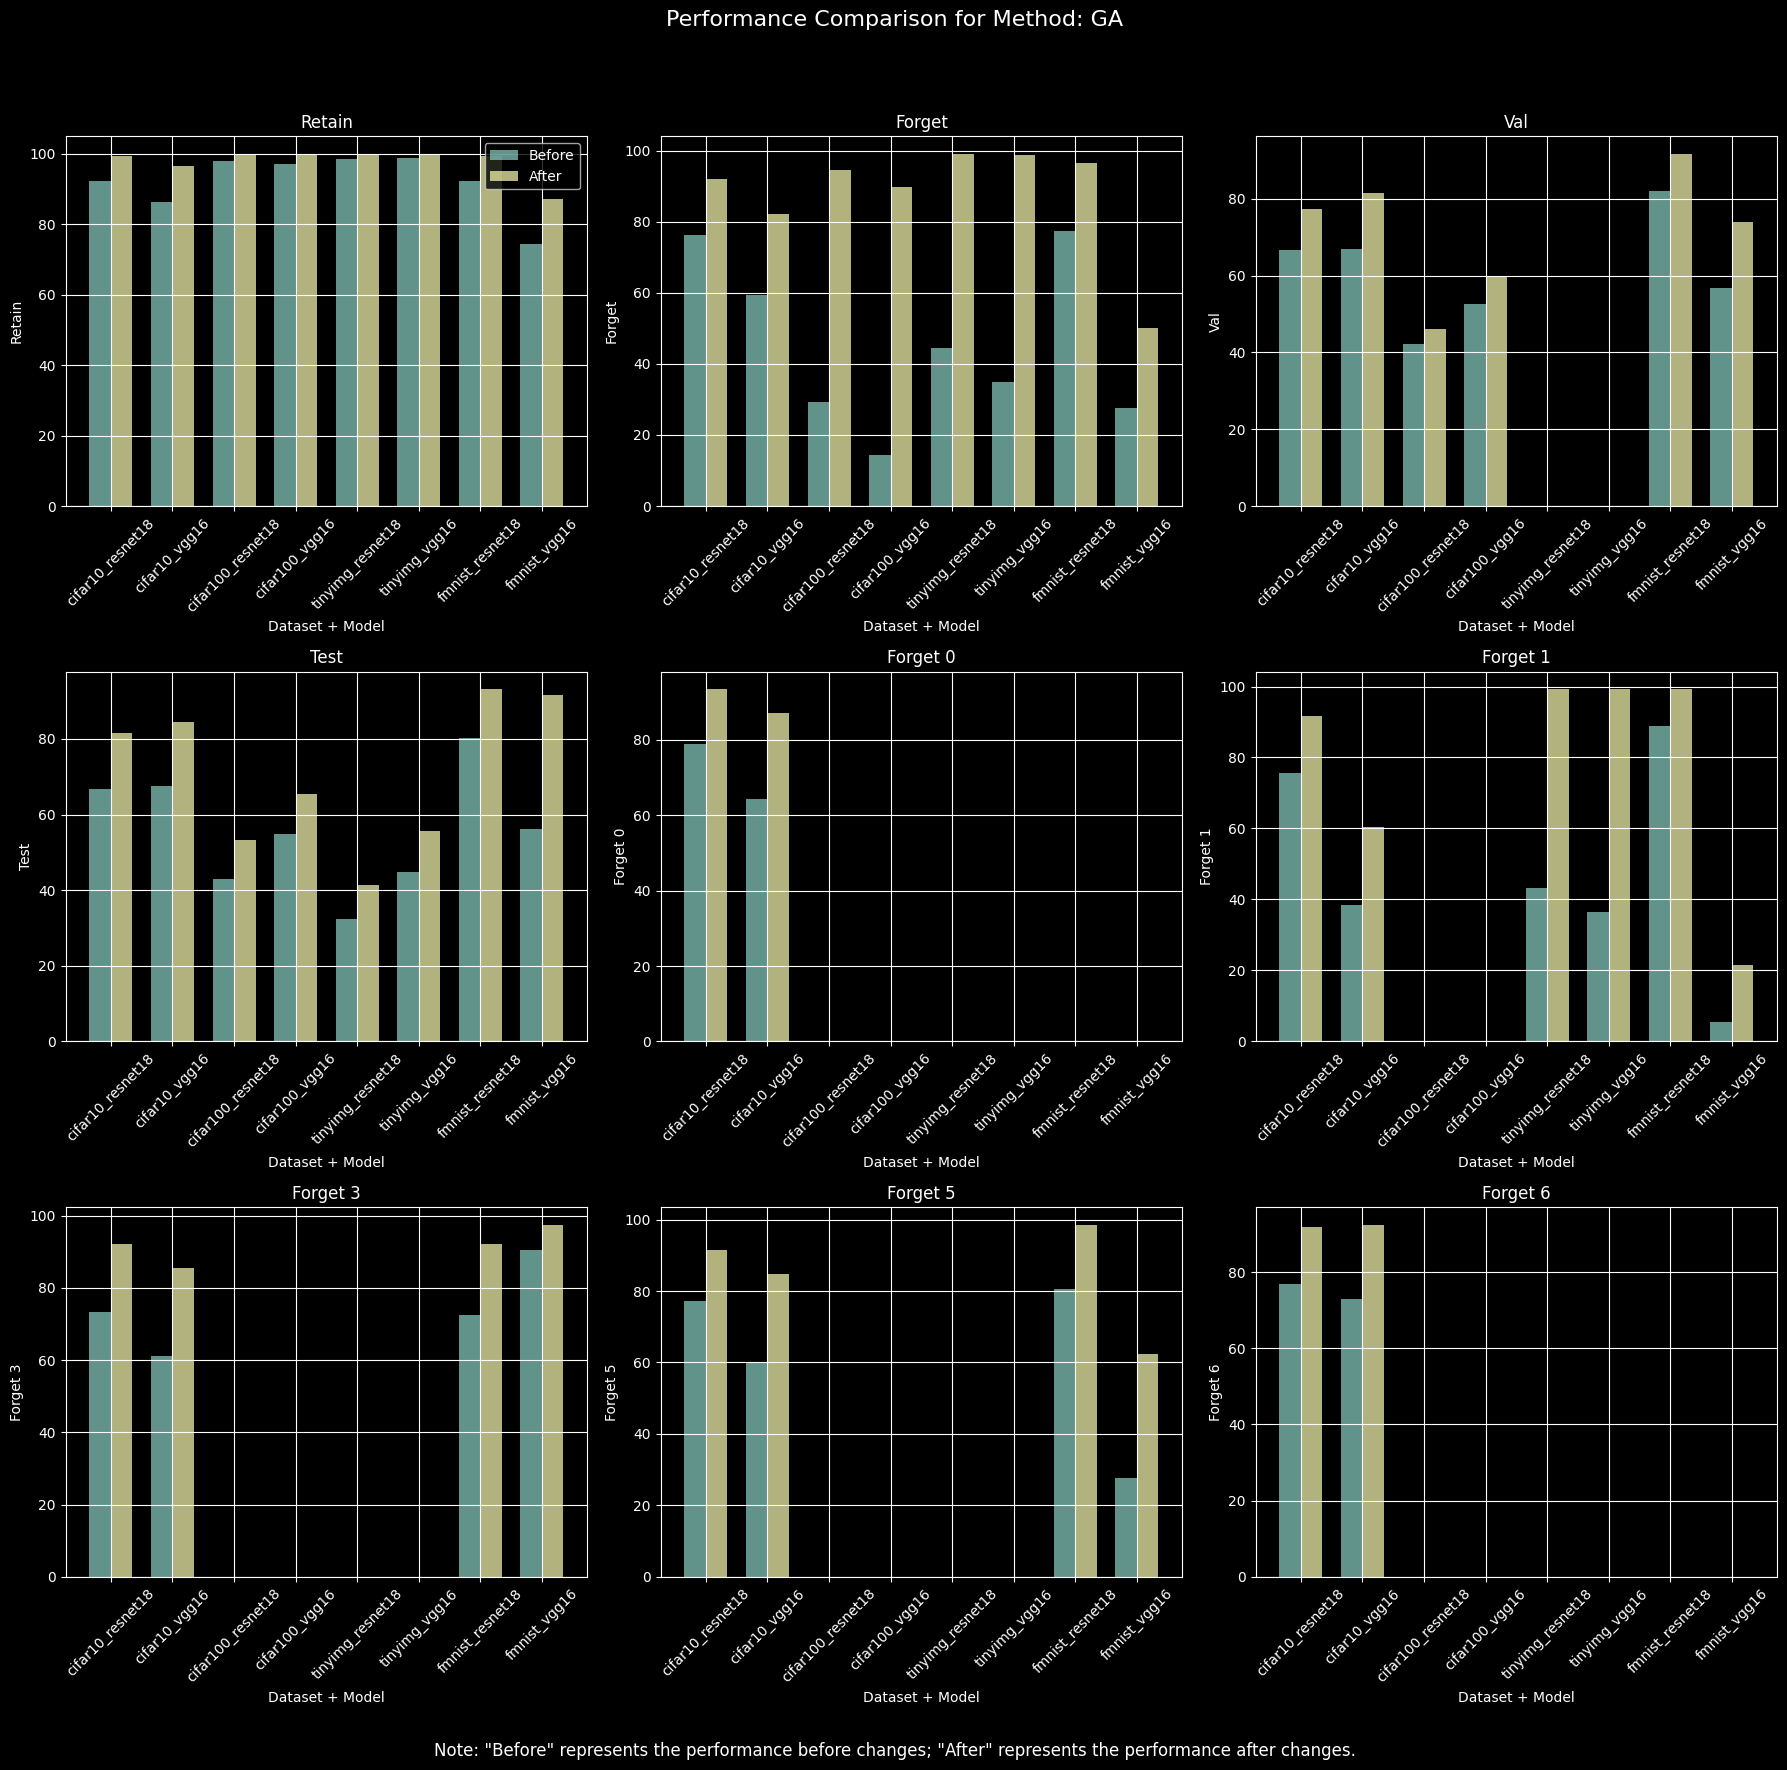

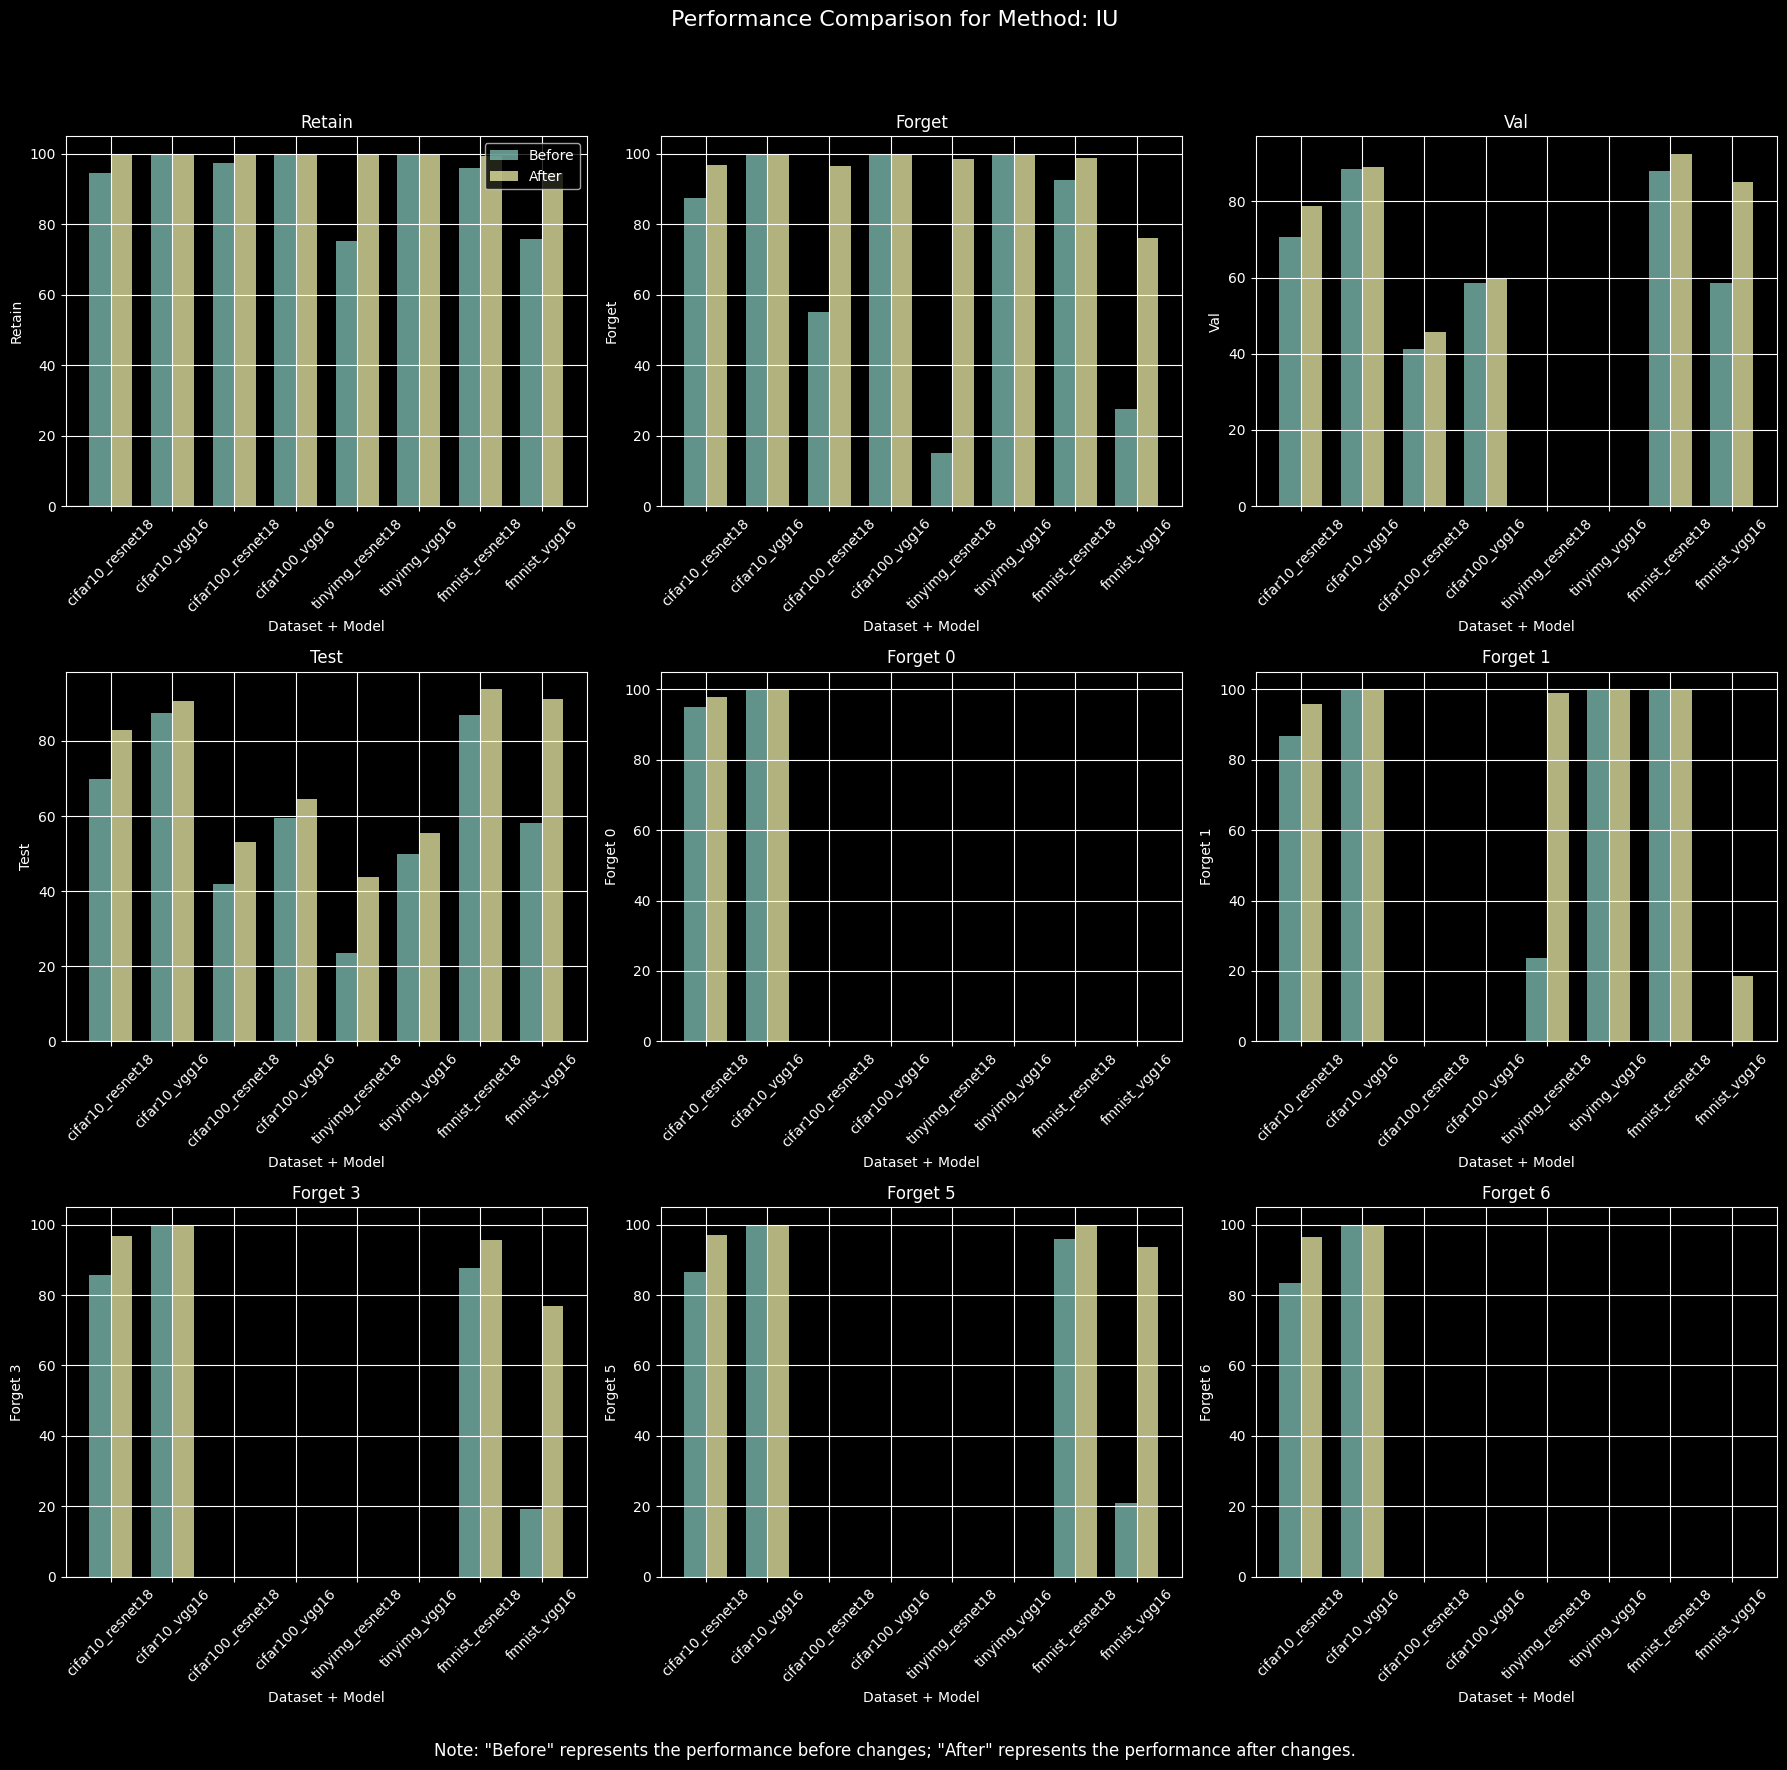

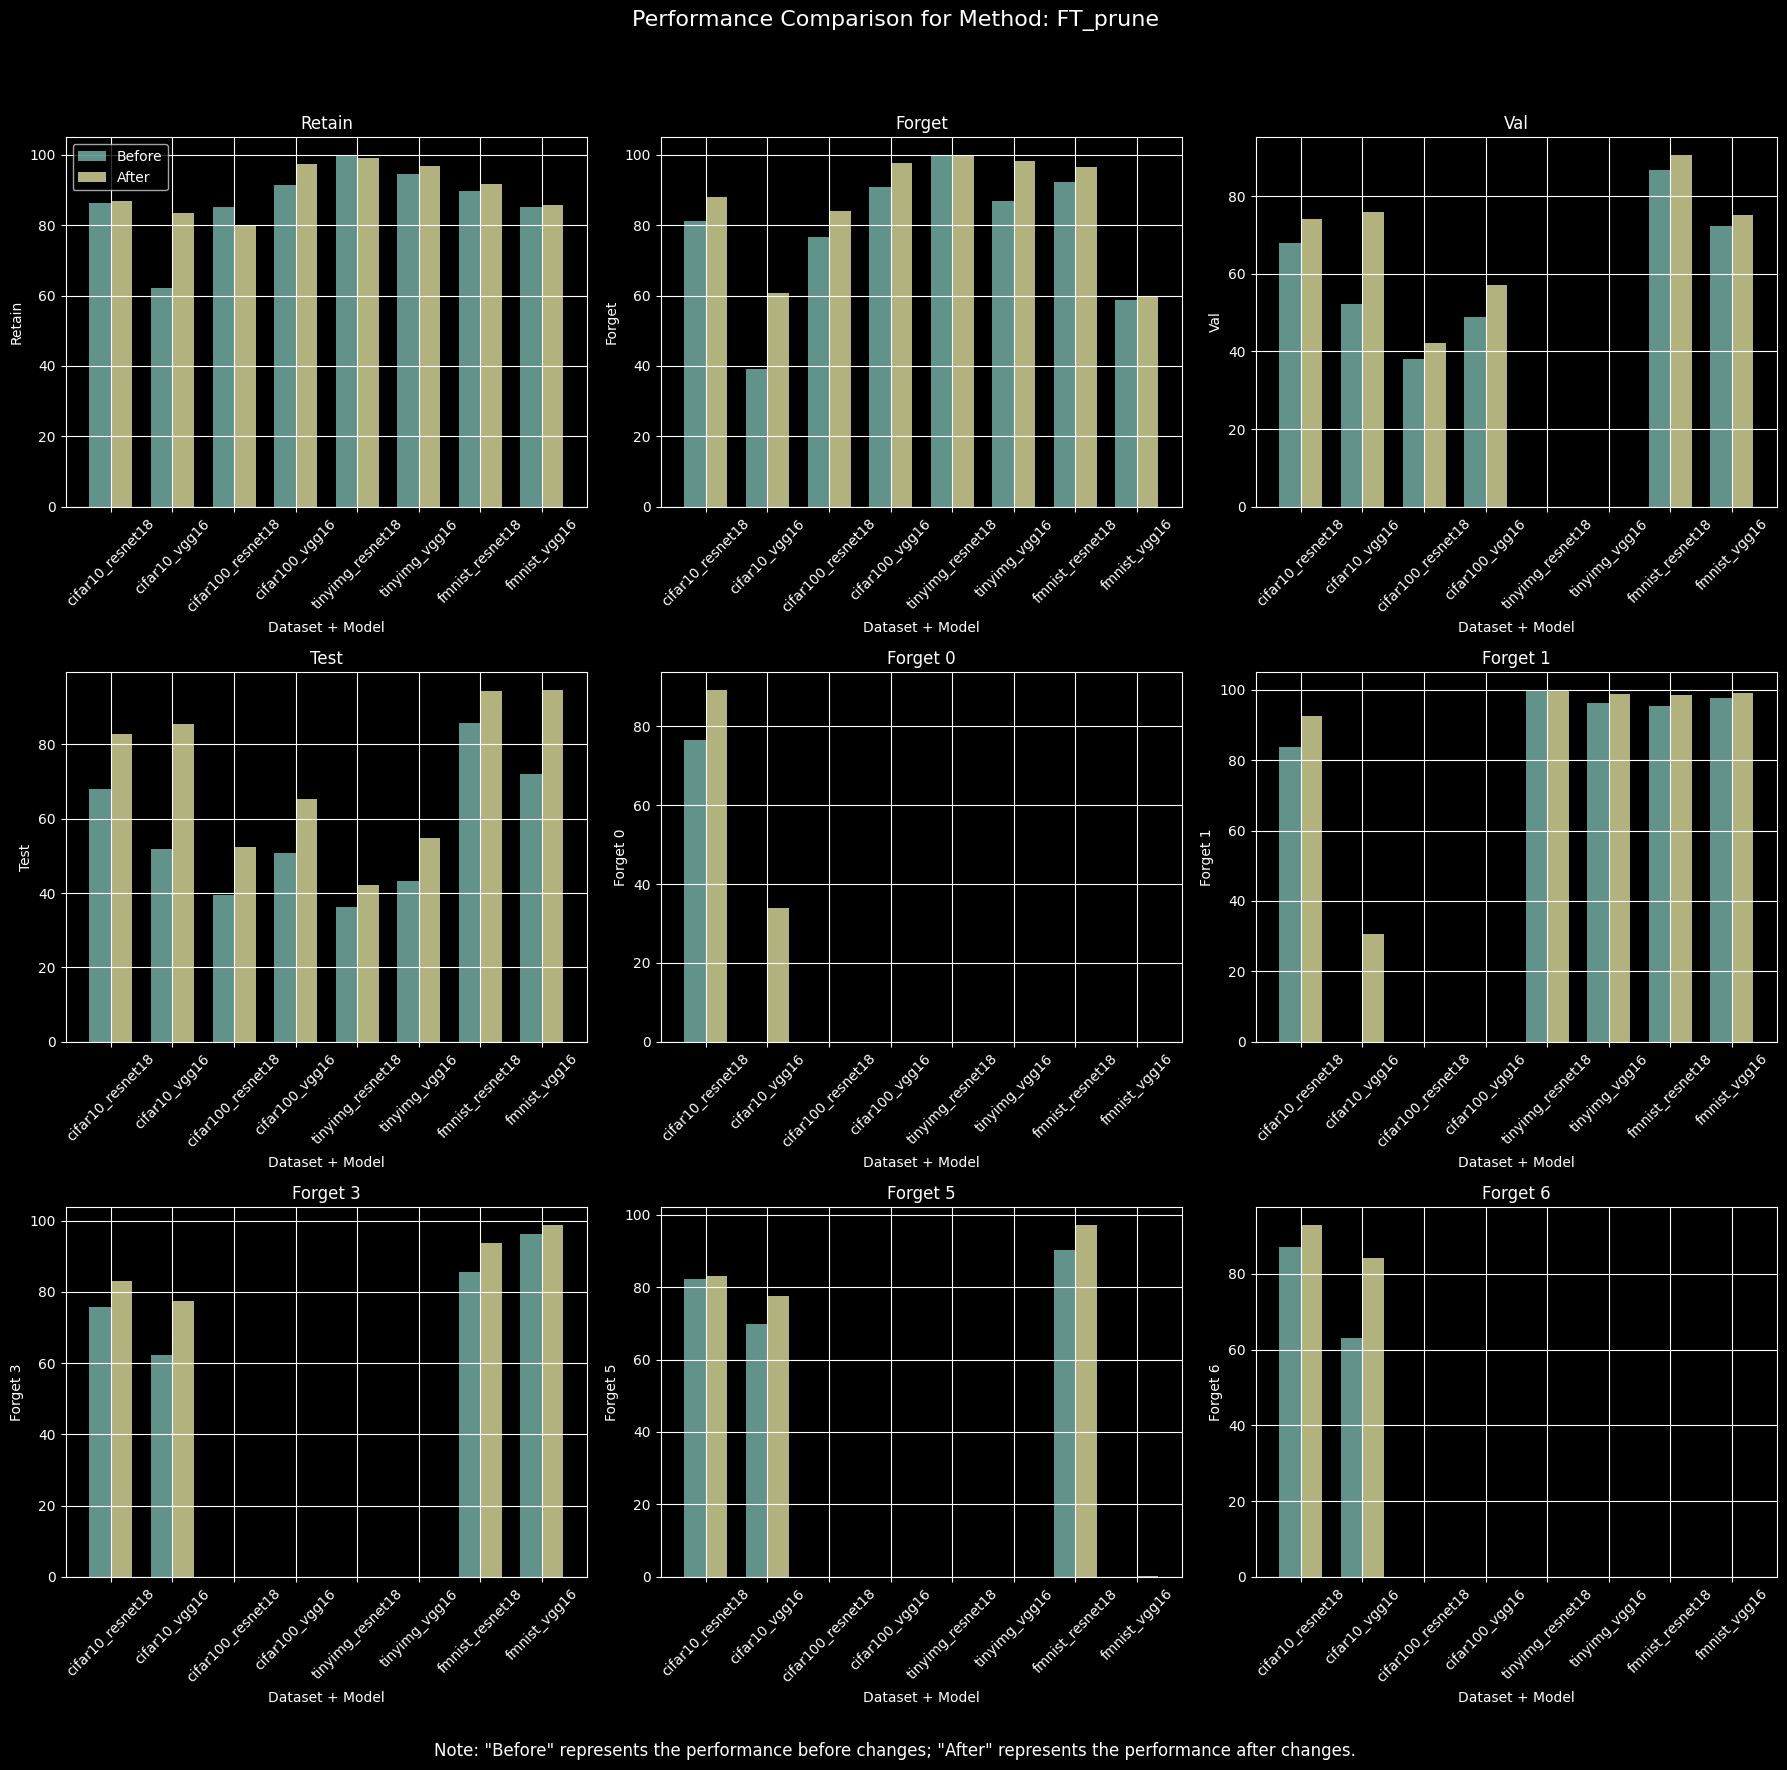

In [2]:
# Function to plot comparison for each machine unlearning method
def plot_method_comparison(method_name):
    fig, axes = plt.subplots(3, 3, figsize=(18, 18))
    axes = axes.flatten()

    for idx, key in enumerate(valid_data_keys):
        ax = axes[idx]
        before_values = []
        after_values = []
        labels = []

        for dataset in filtered_df.columns[1:]:
            before_row = filtered_df[filtered_df.iloc[:, 0] == method_name]
            after_row = filtered_after_df[filtered_after_df.iloc[:, 0] == method_name]

            if not before_row.empty:
                before_data = json.loads(before_row.iloc[0][dataset])
                before_values.append(before_data.get(key, 0))
            else:
                before_values.append(0)

            if not after_row.empty:
                after_data = json.loads(after_row.iloc[0][dataset])
                after_values.append(after_data.get(key, 0))
            else:
                after_values.append(0)

            labels.append(dataset)

        x = range(len(labels))
        width = 0.35

        ax.bar(x, before_values, width=width, label='Before', alpha=0.7)
        ax.bar([p + width for p in x], after_values, width=width, label='After', alpha=0.7)

        ax.set_title(f'{key.capitalize()}')
        ax.set_xlabel('Dataset + Model')
        ax.set_ylabel(f'{key.capitalize()}')
        ax.set_xticks([p + width/2 for p in x])
        ax.set_xticklabels(labels, rotation=45)
        ax.grid(True)
        if idx == 0:
            ax.legend()

    fig.suptitle(f'Performance Comparison for Method: {method_name}', fontsize=16)
    plt.figtext(0.5, 0.01, 'Note: "Before" represents the performance before changes; "After" represents the performance after changes.', ha='center', fontsize=12)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plotting for each machine unlearning method in unlearn_acc
methods = filtered_df.iloc[:, 0].unique()
for method in methods:
    plot_method_comparison(method)



# mia

## by (dataset,model)

/tmp/ipykernel_247547/3618421346.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  method = row[0]


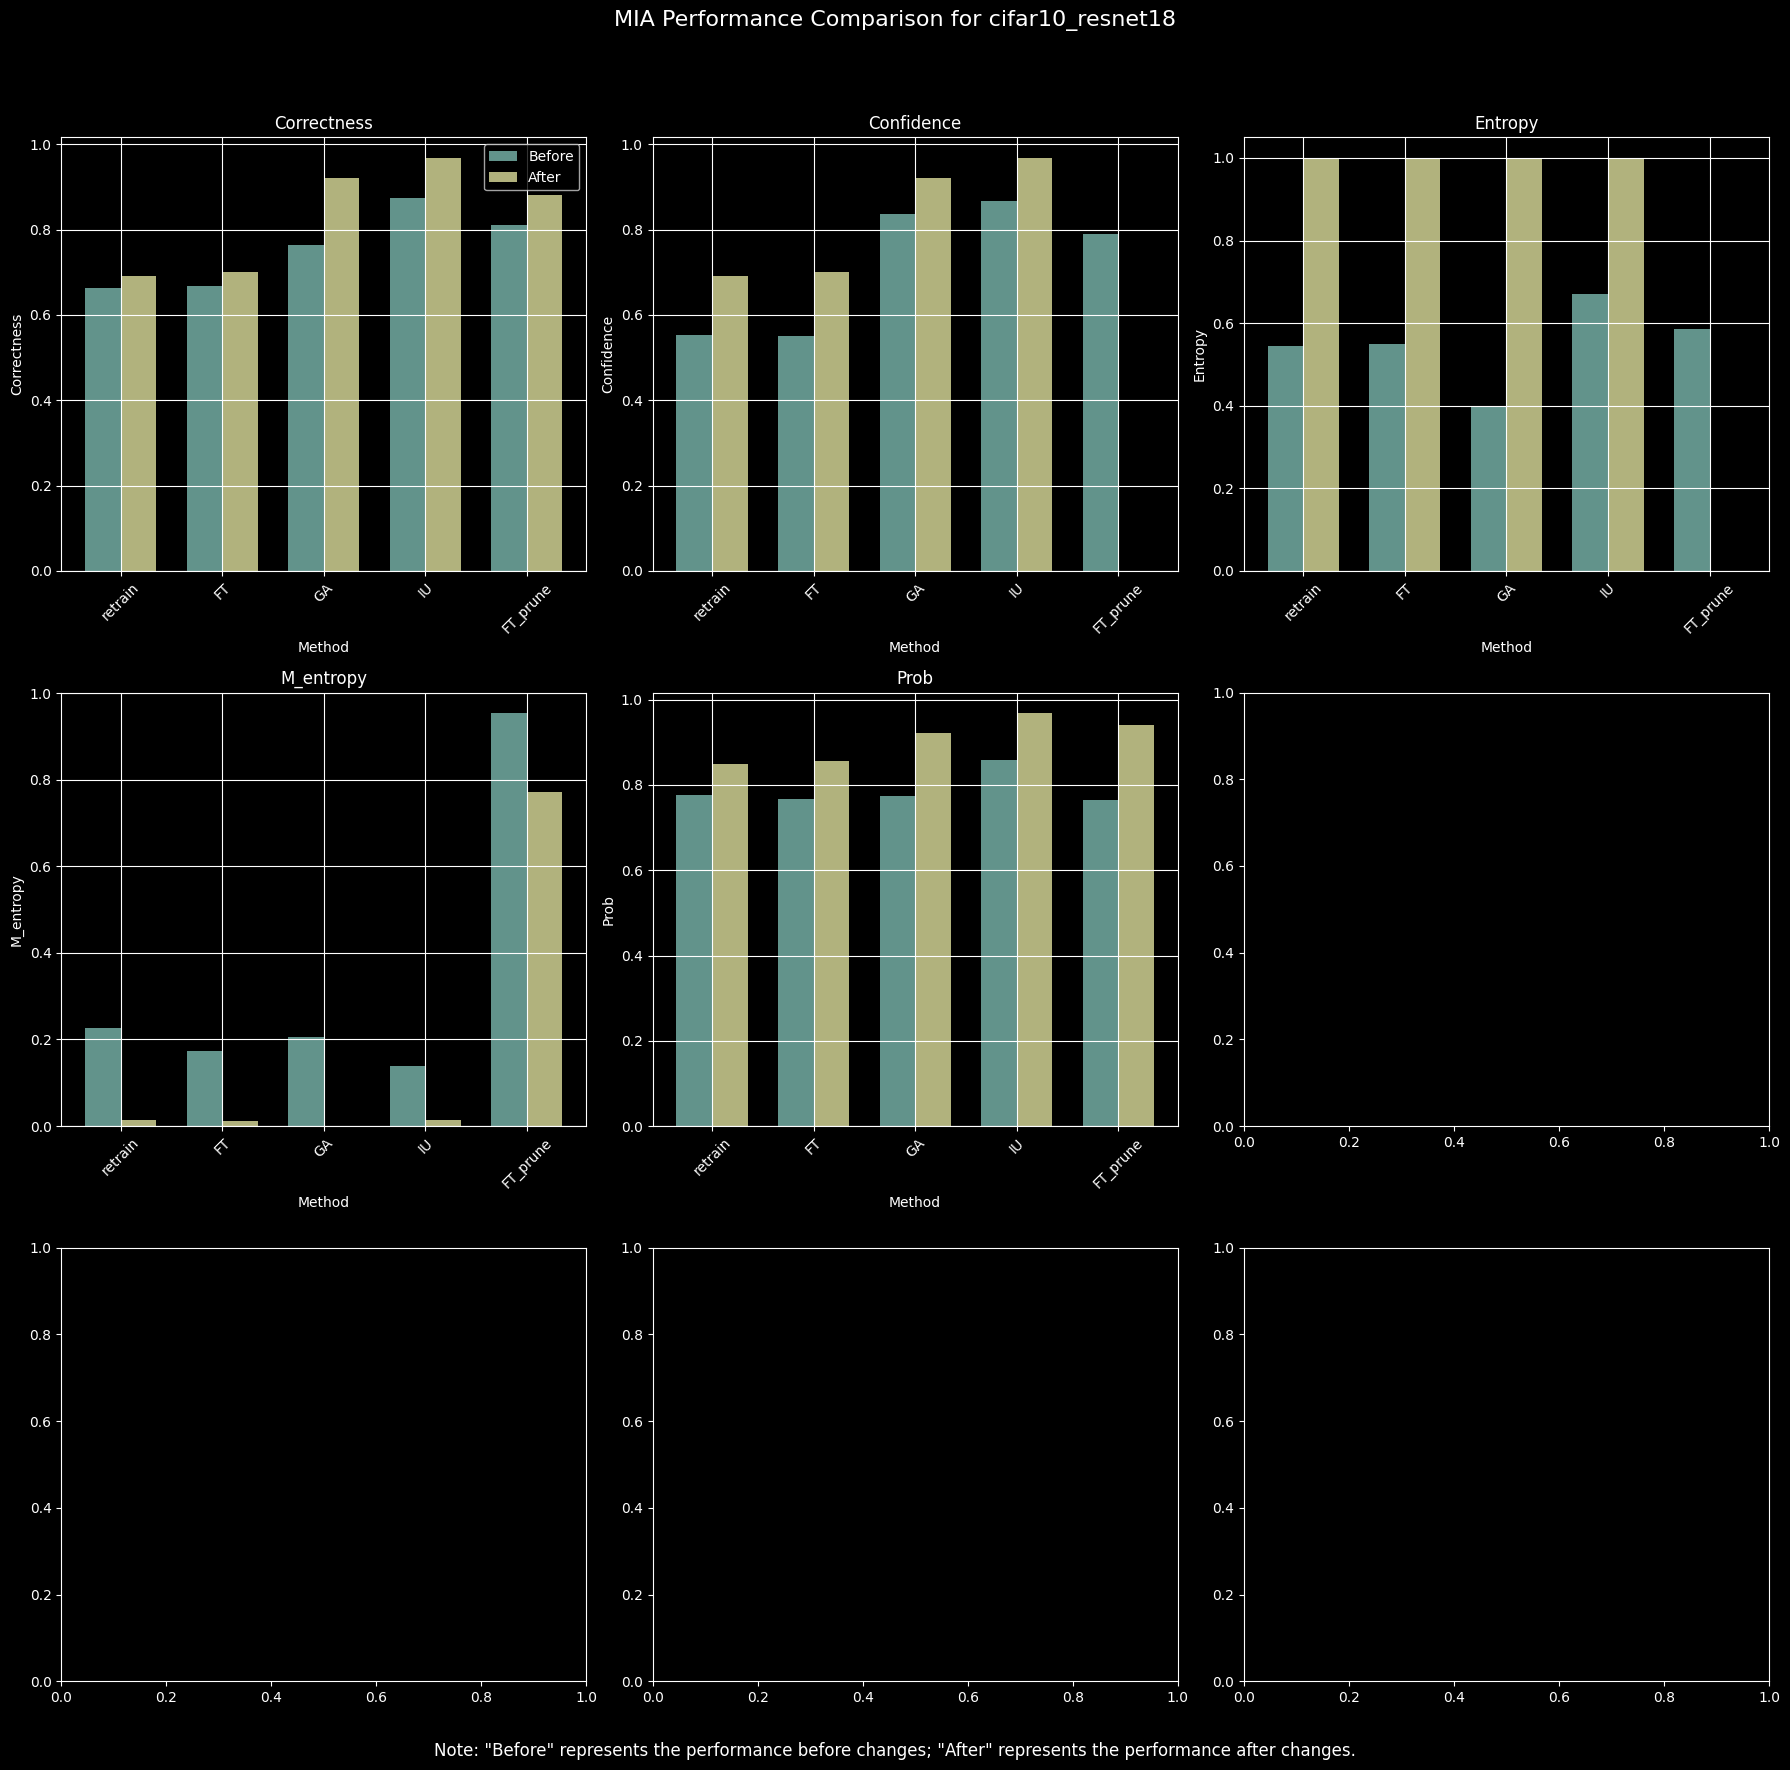

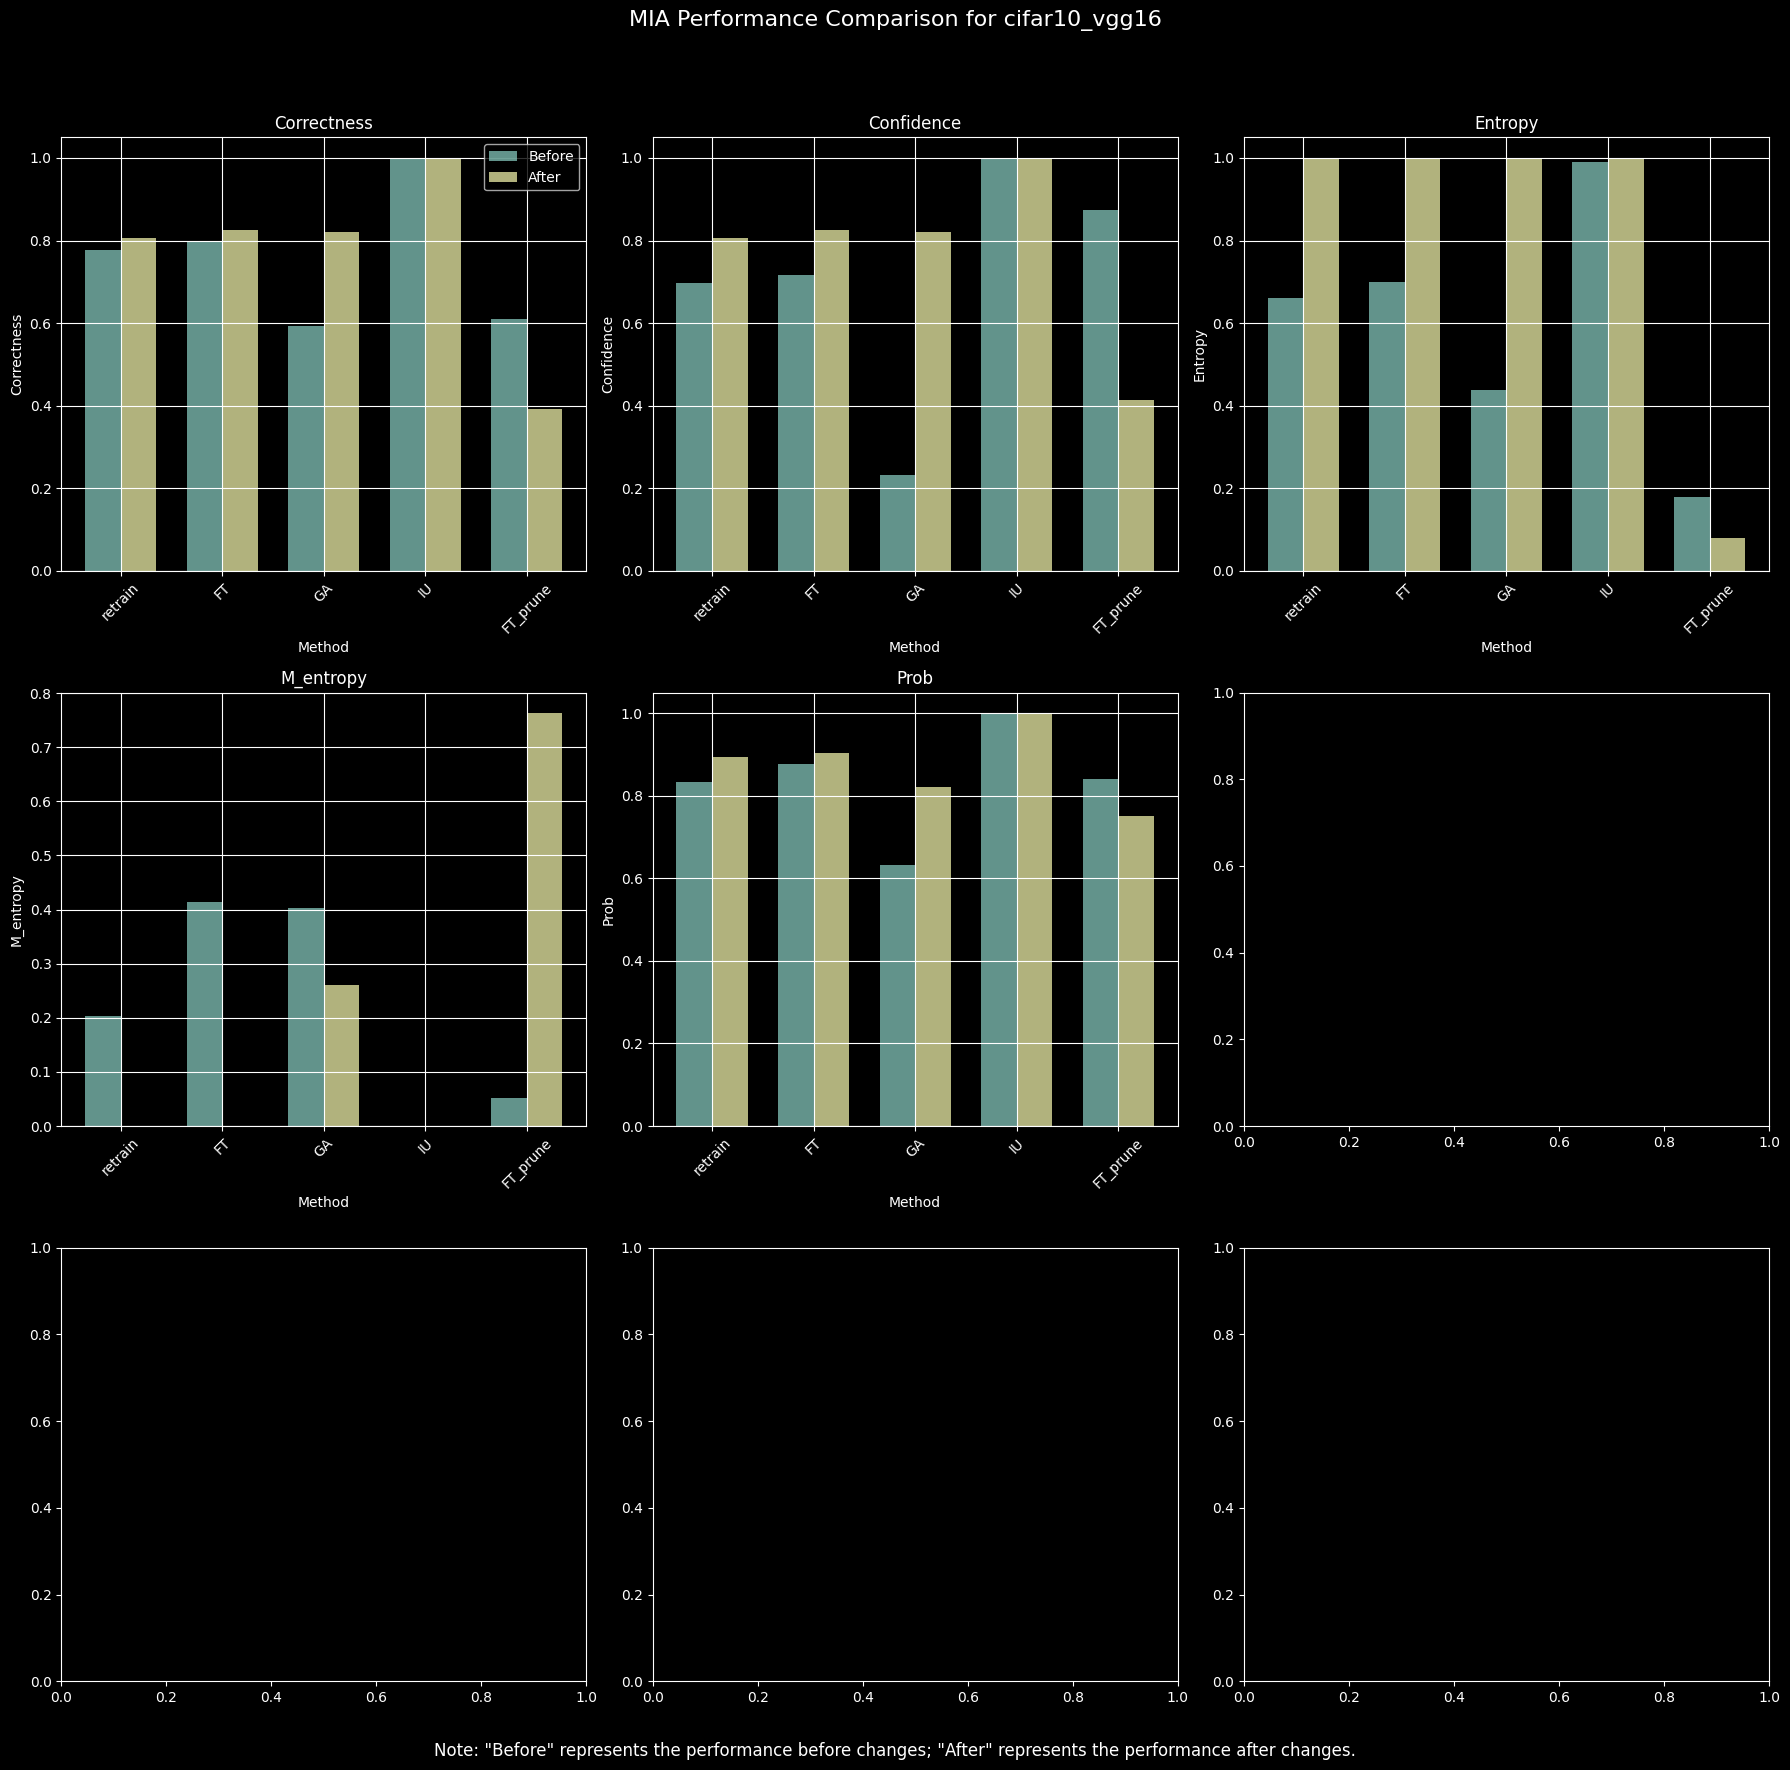

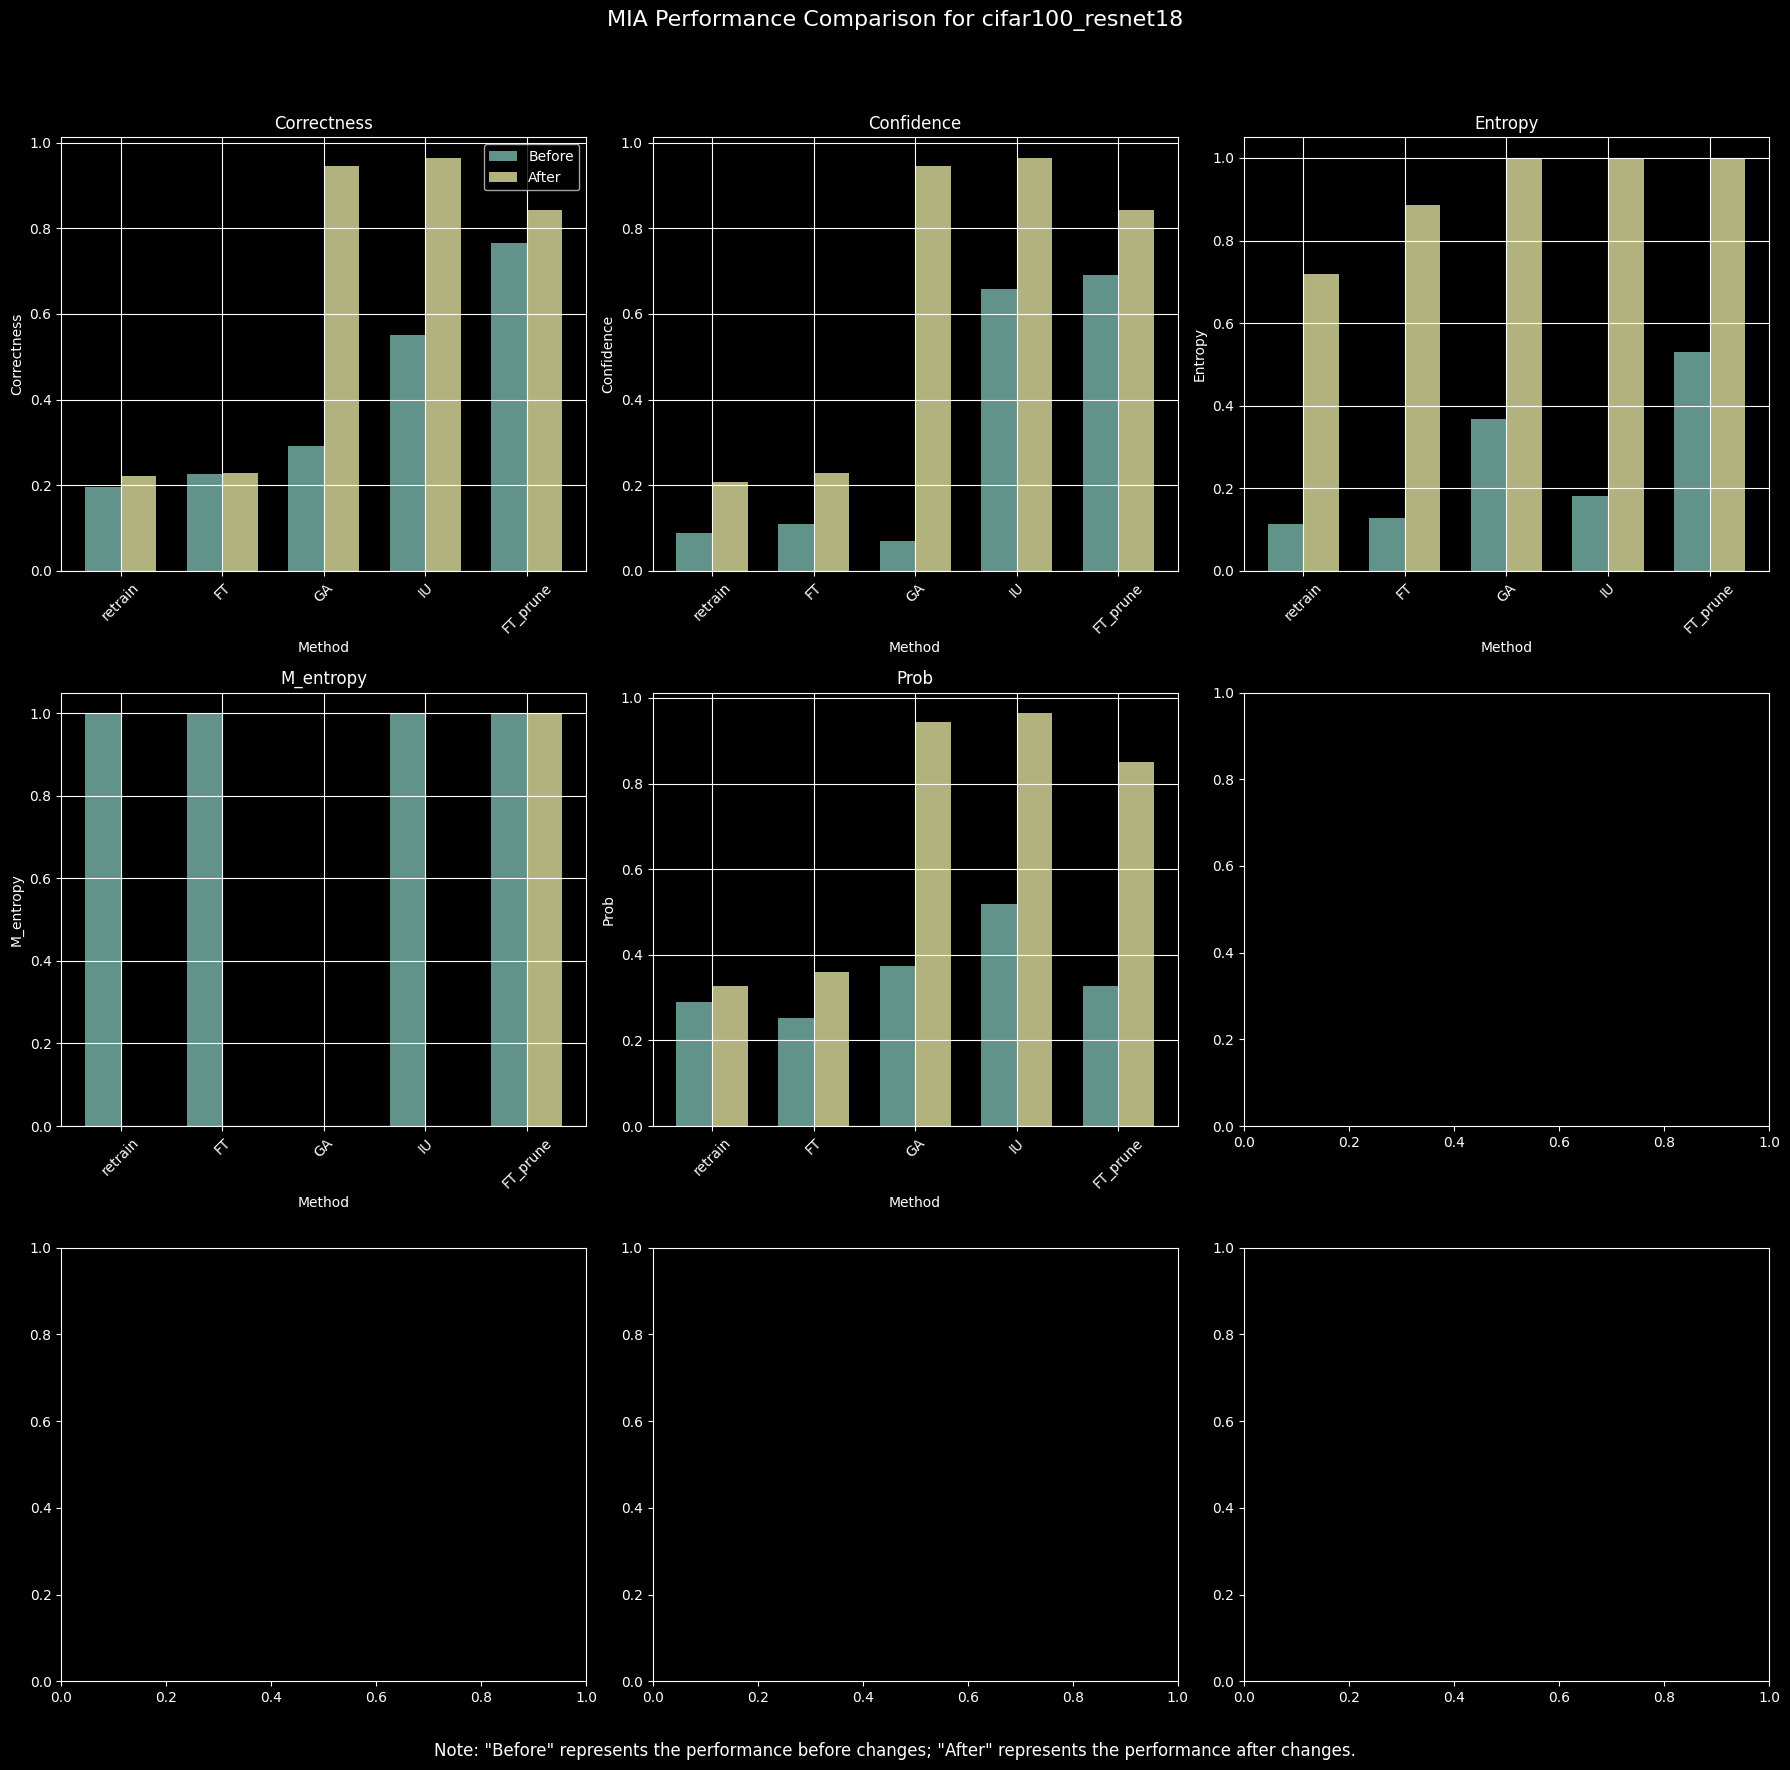

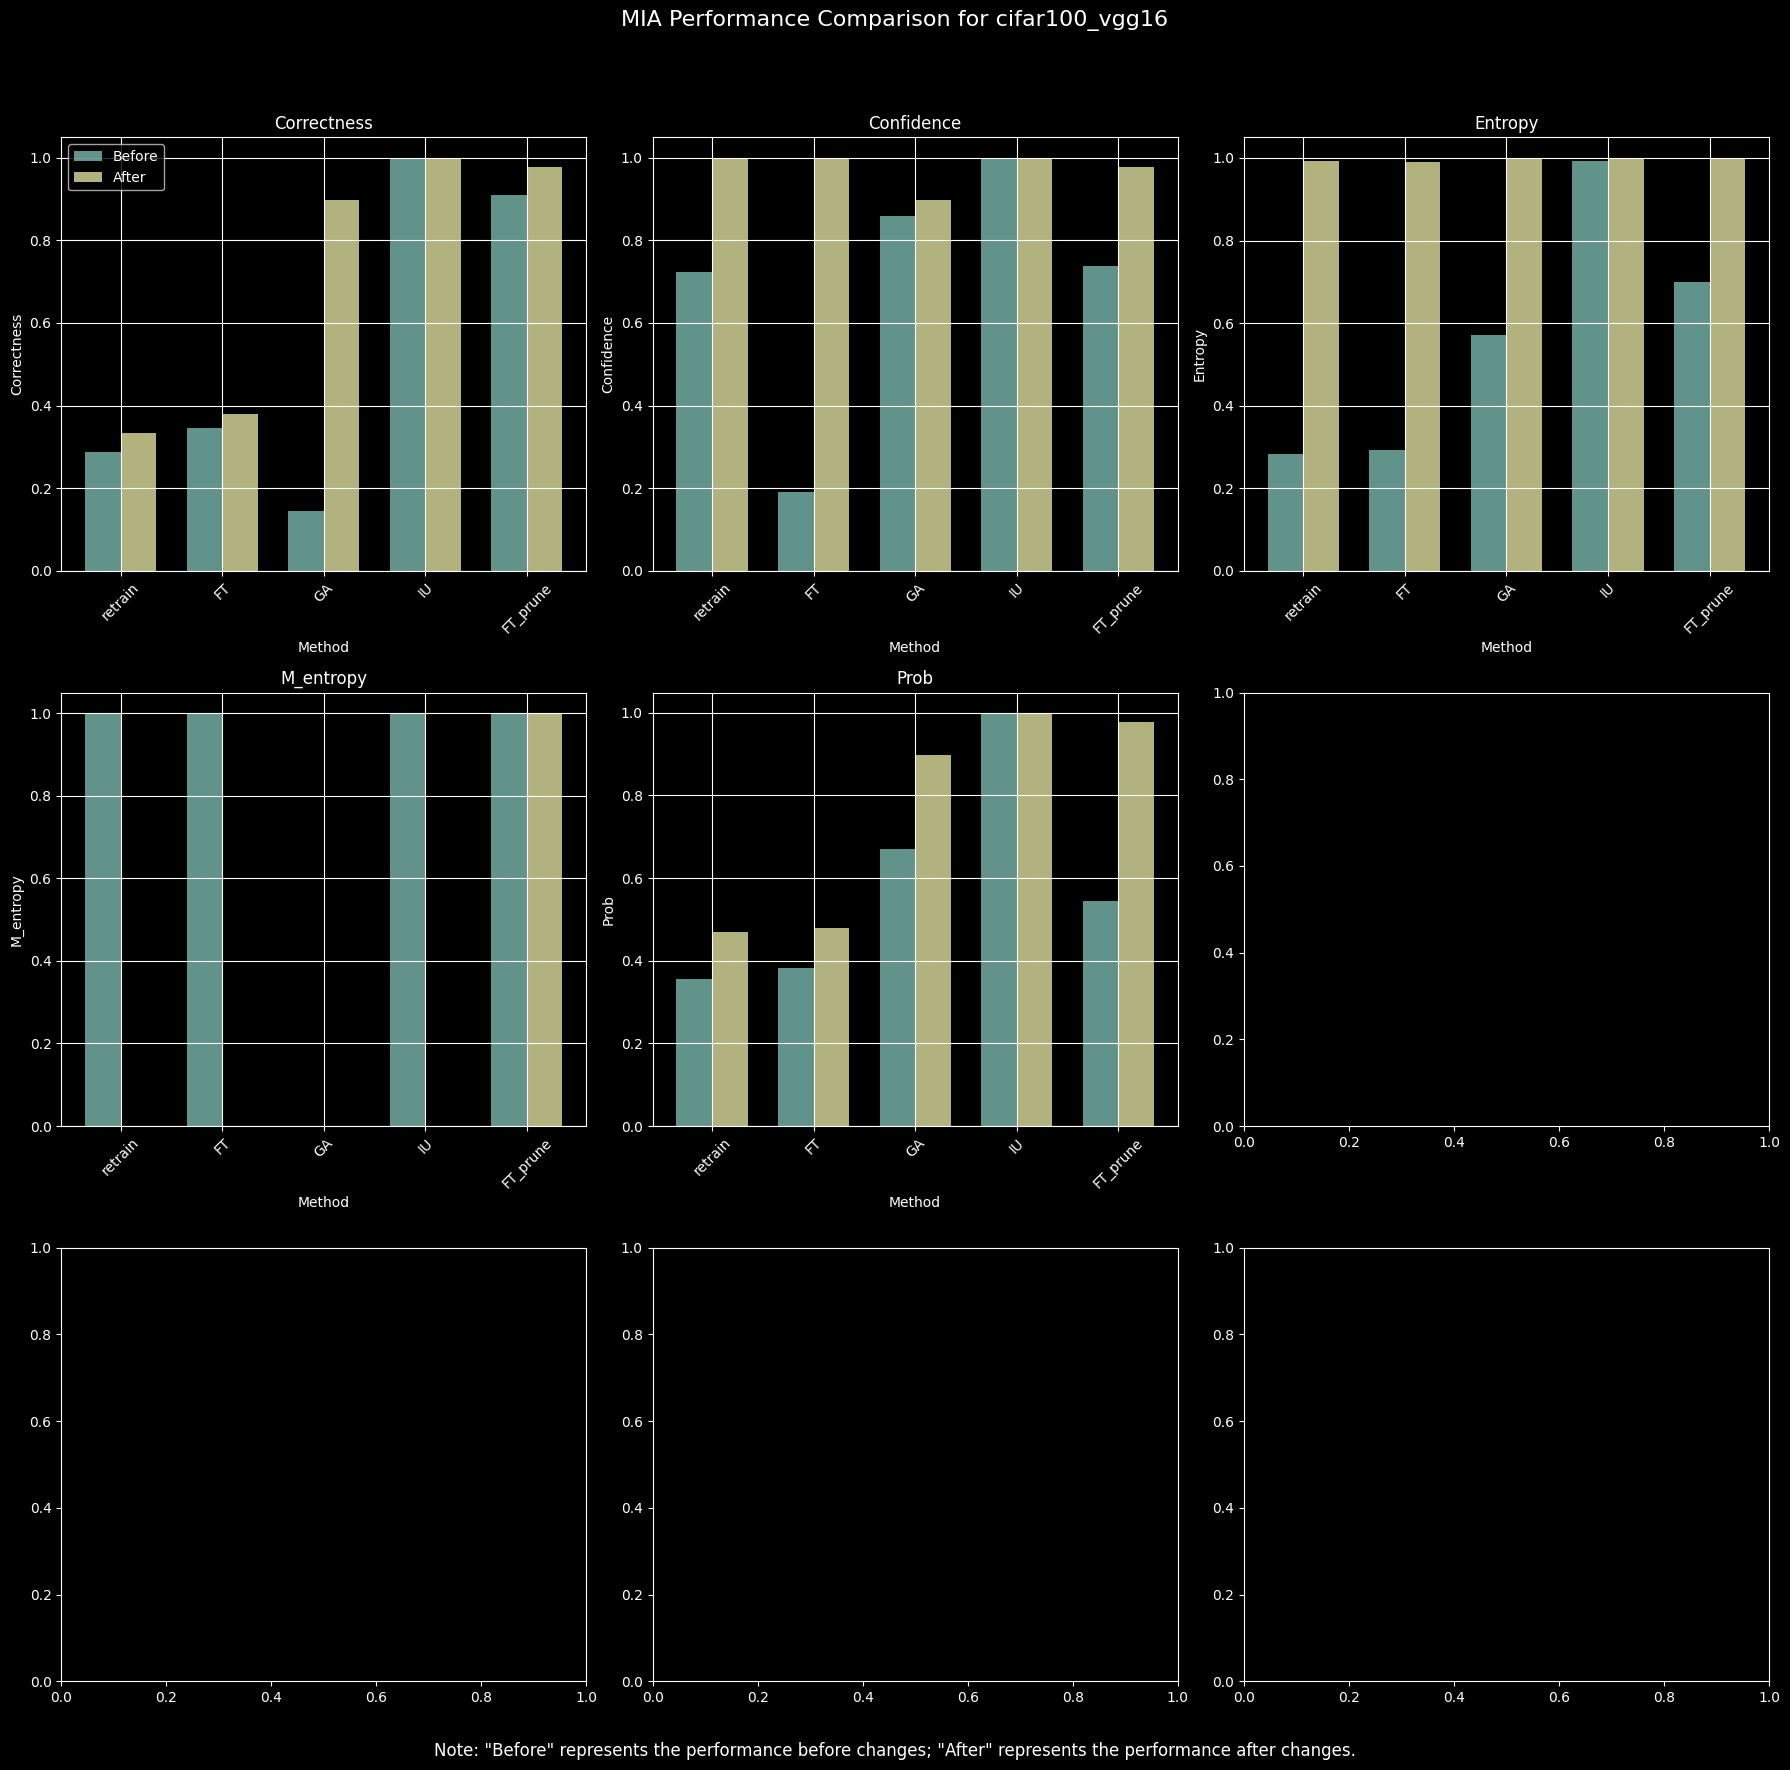

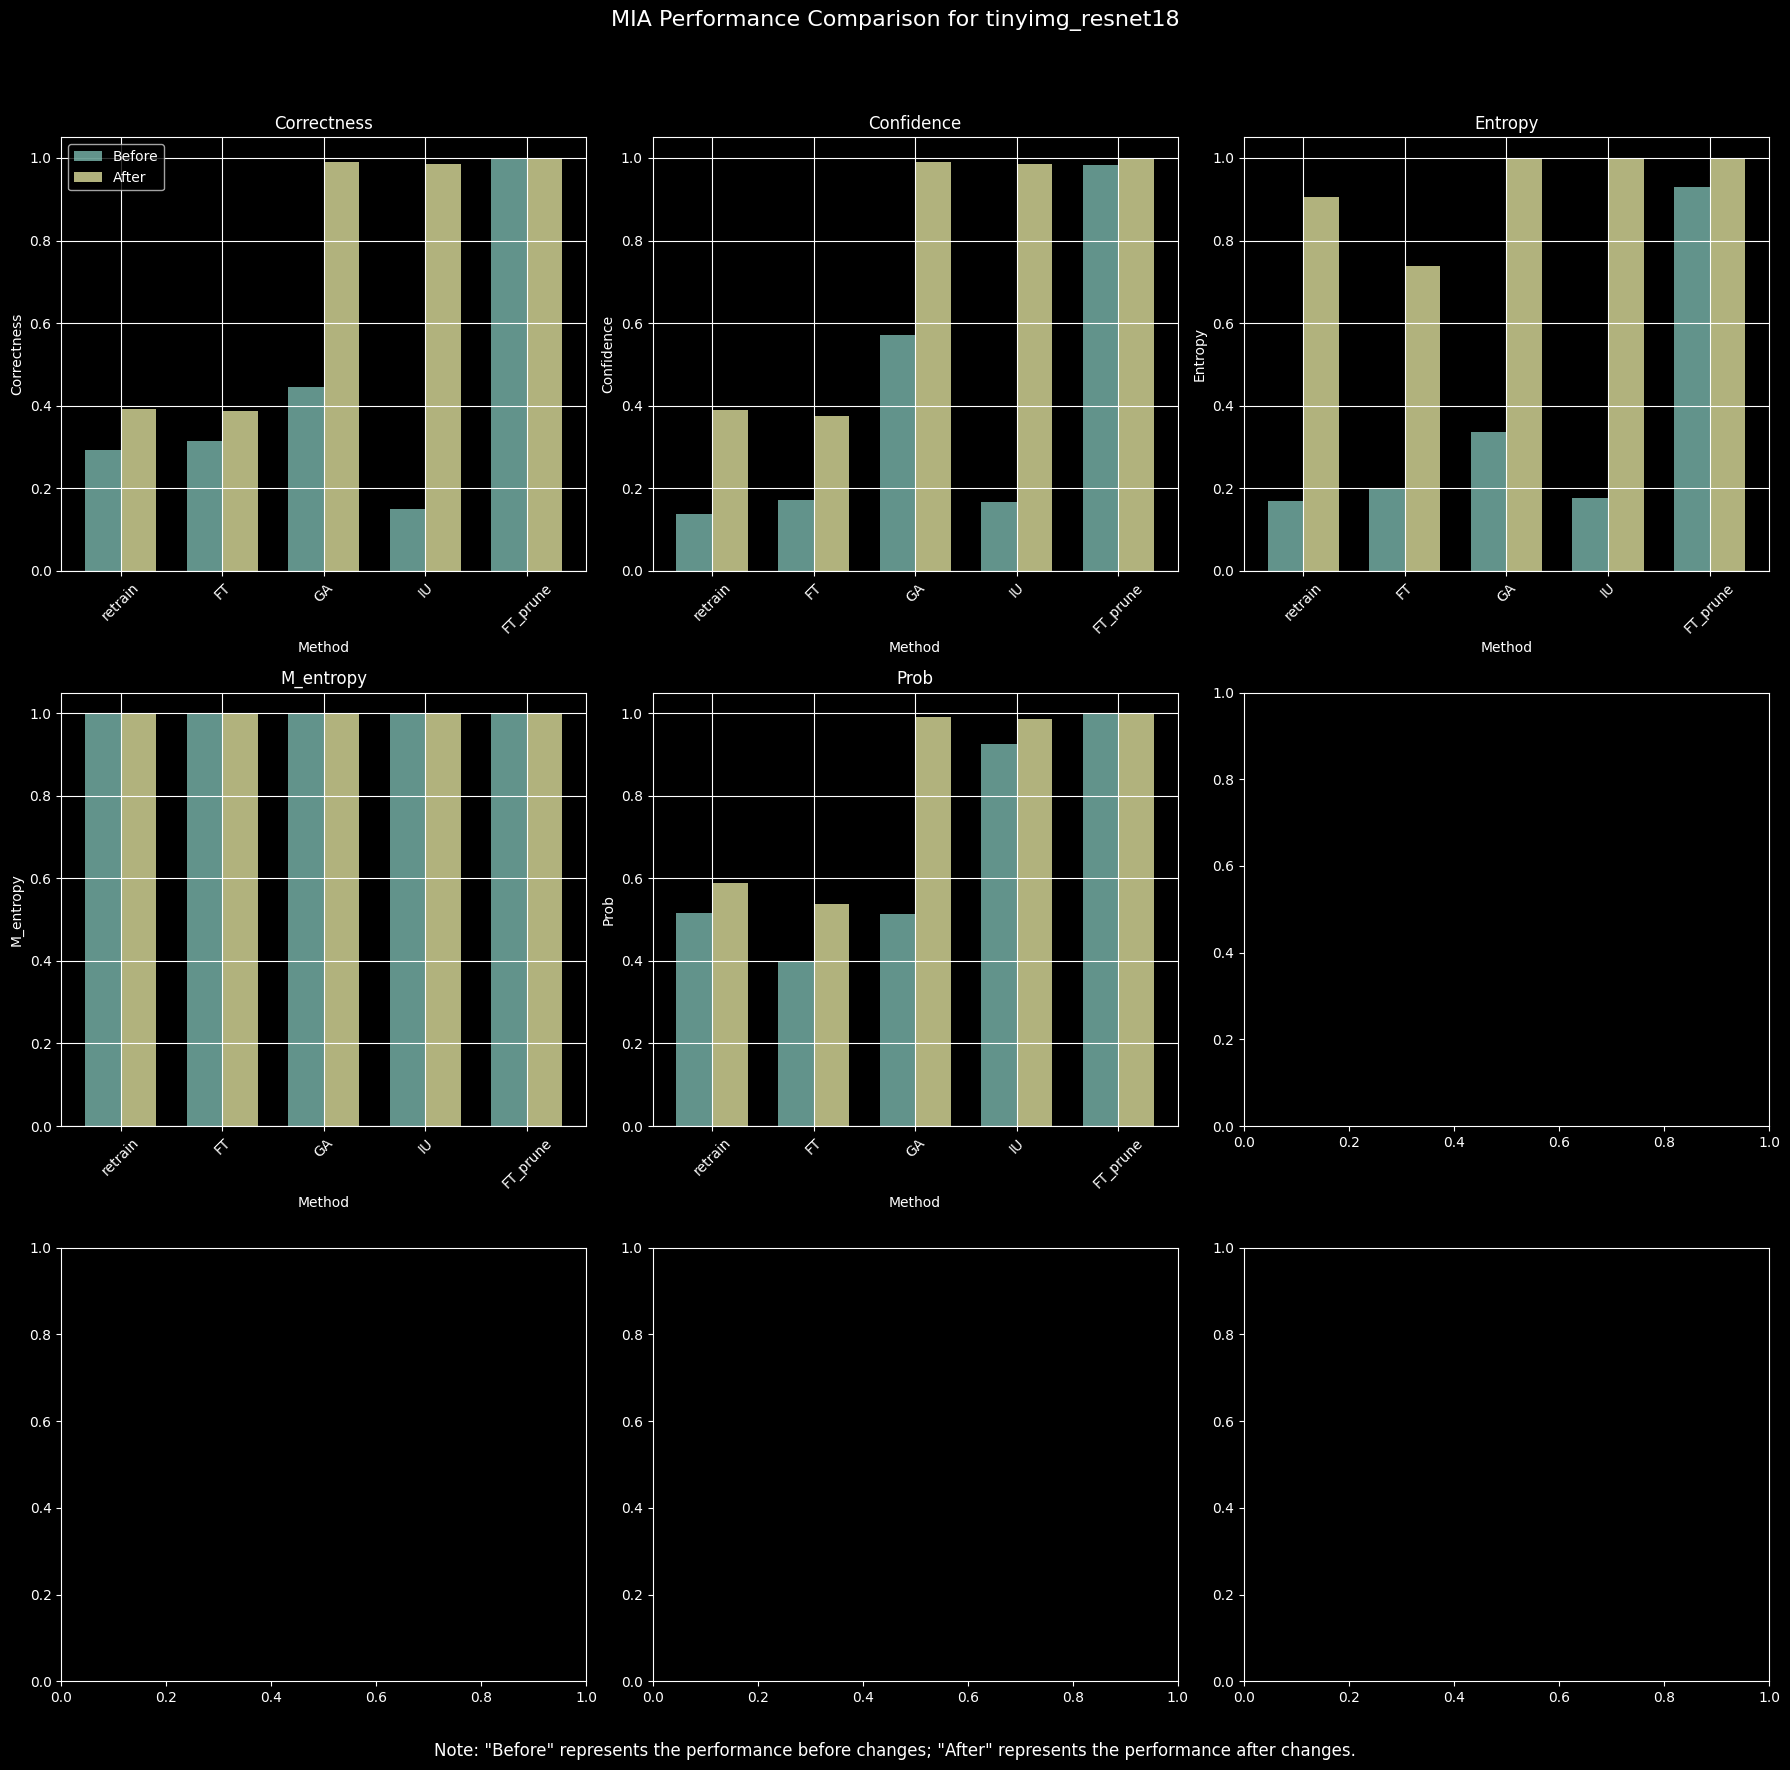

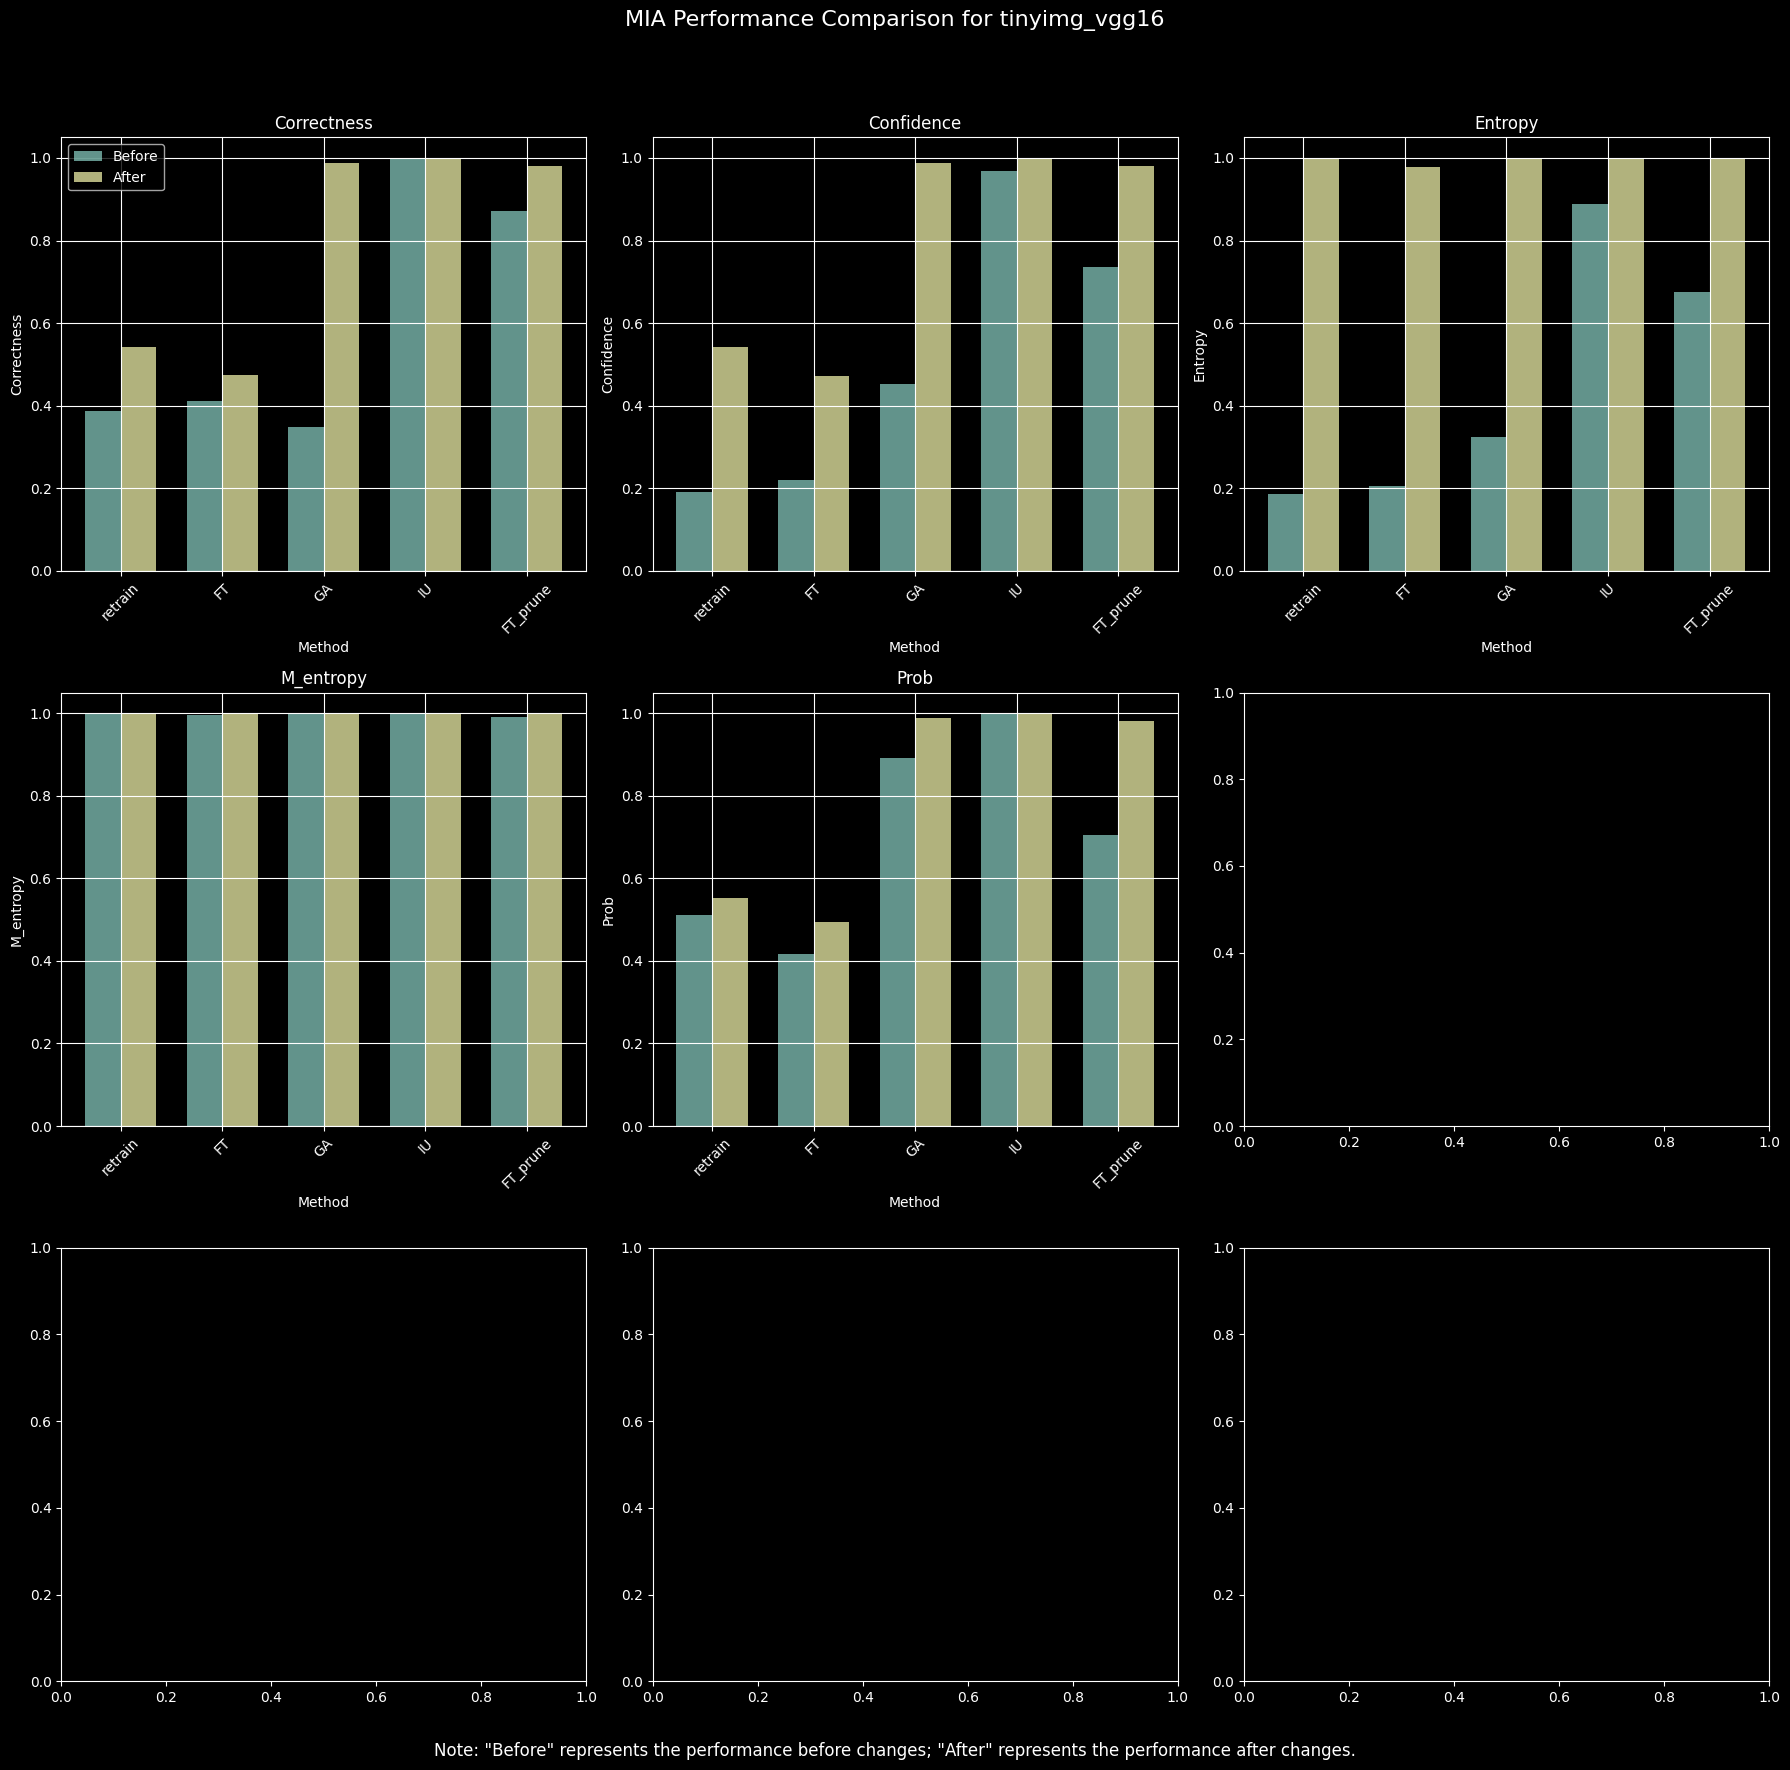

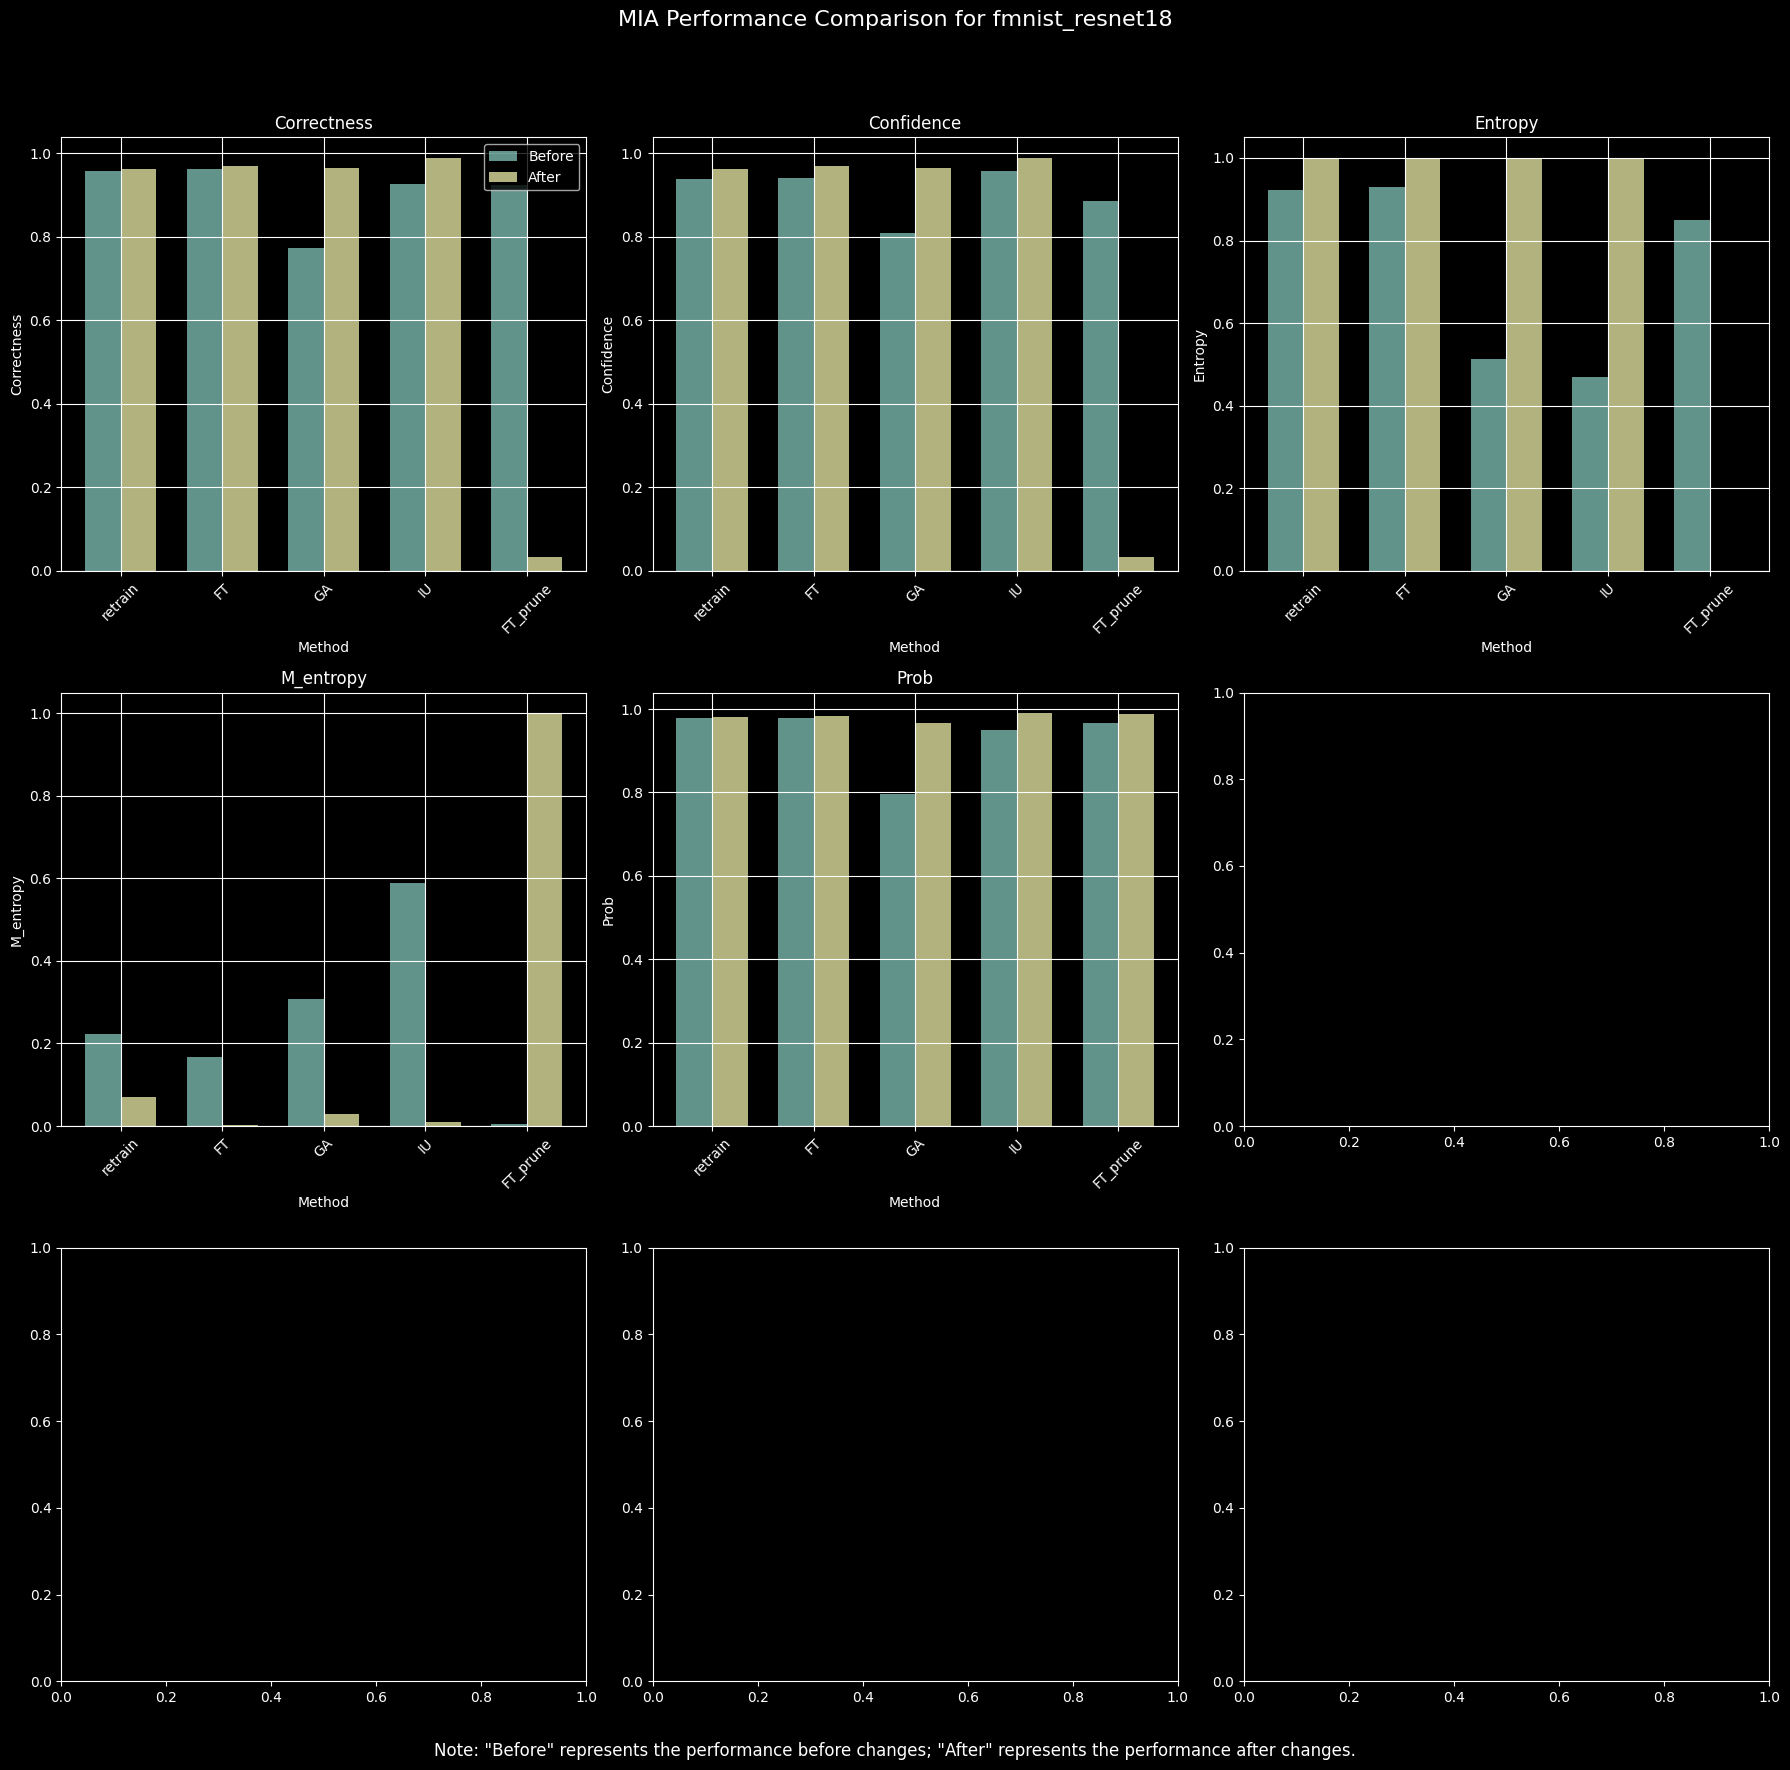

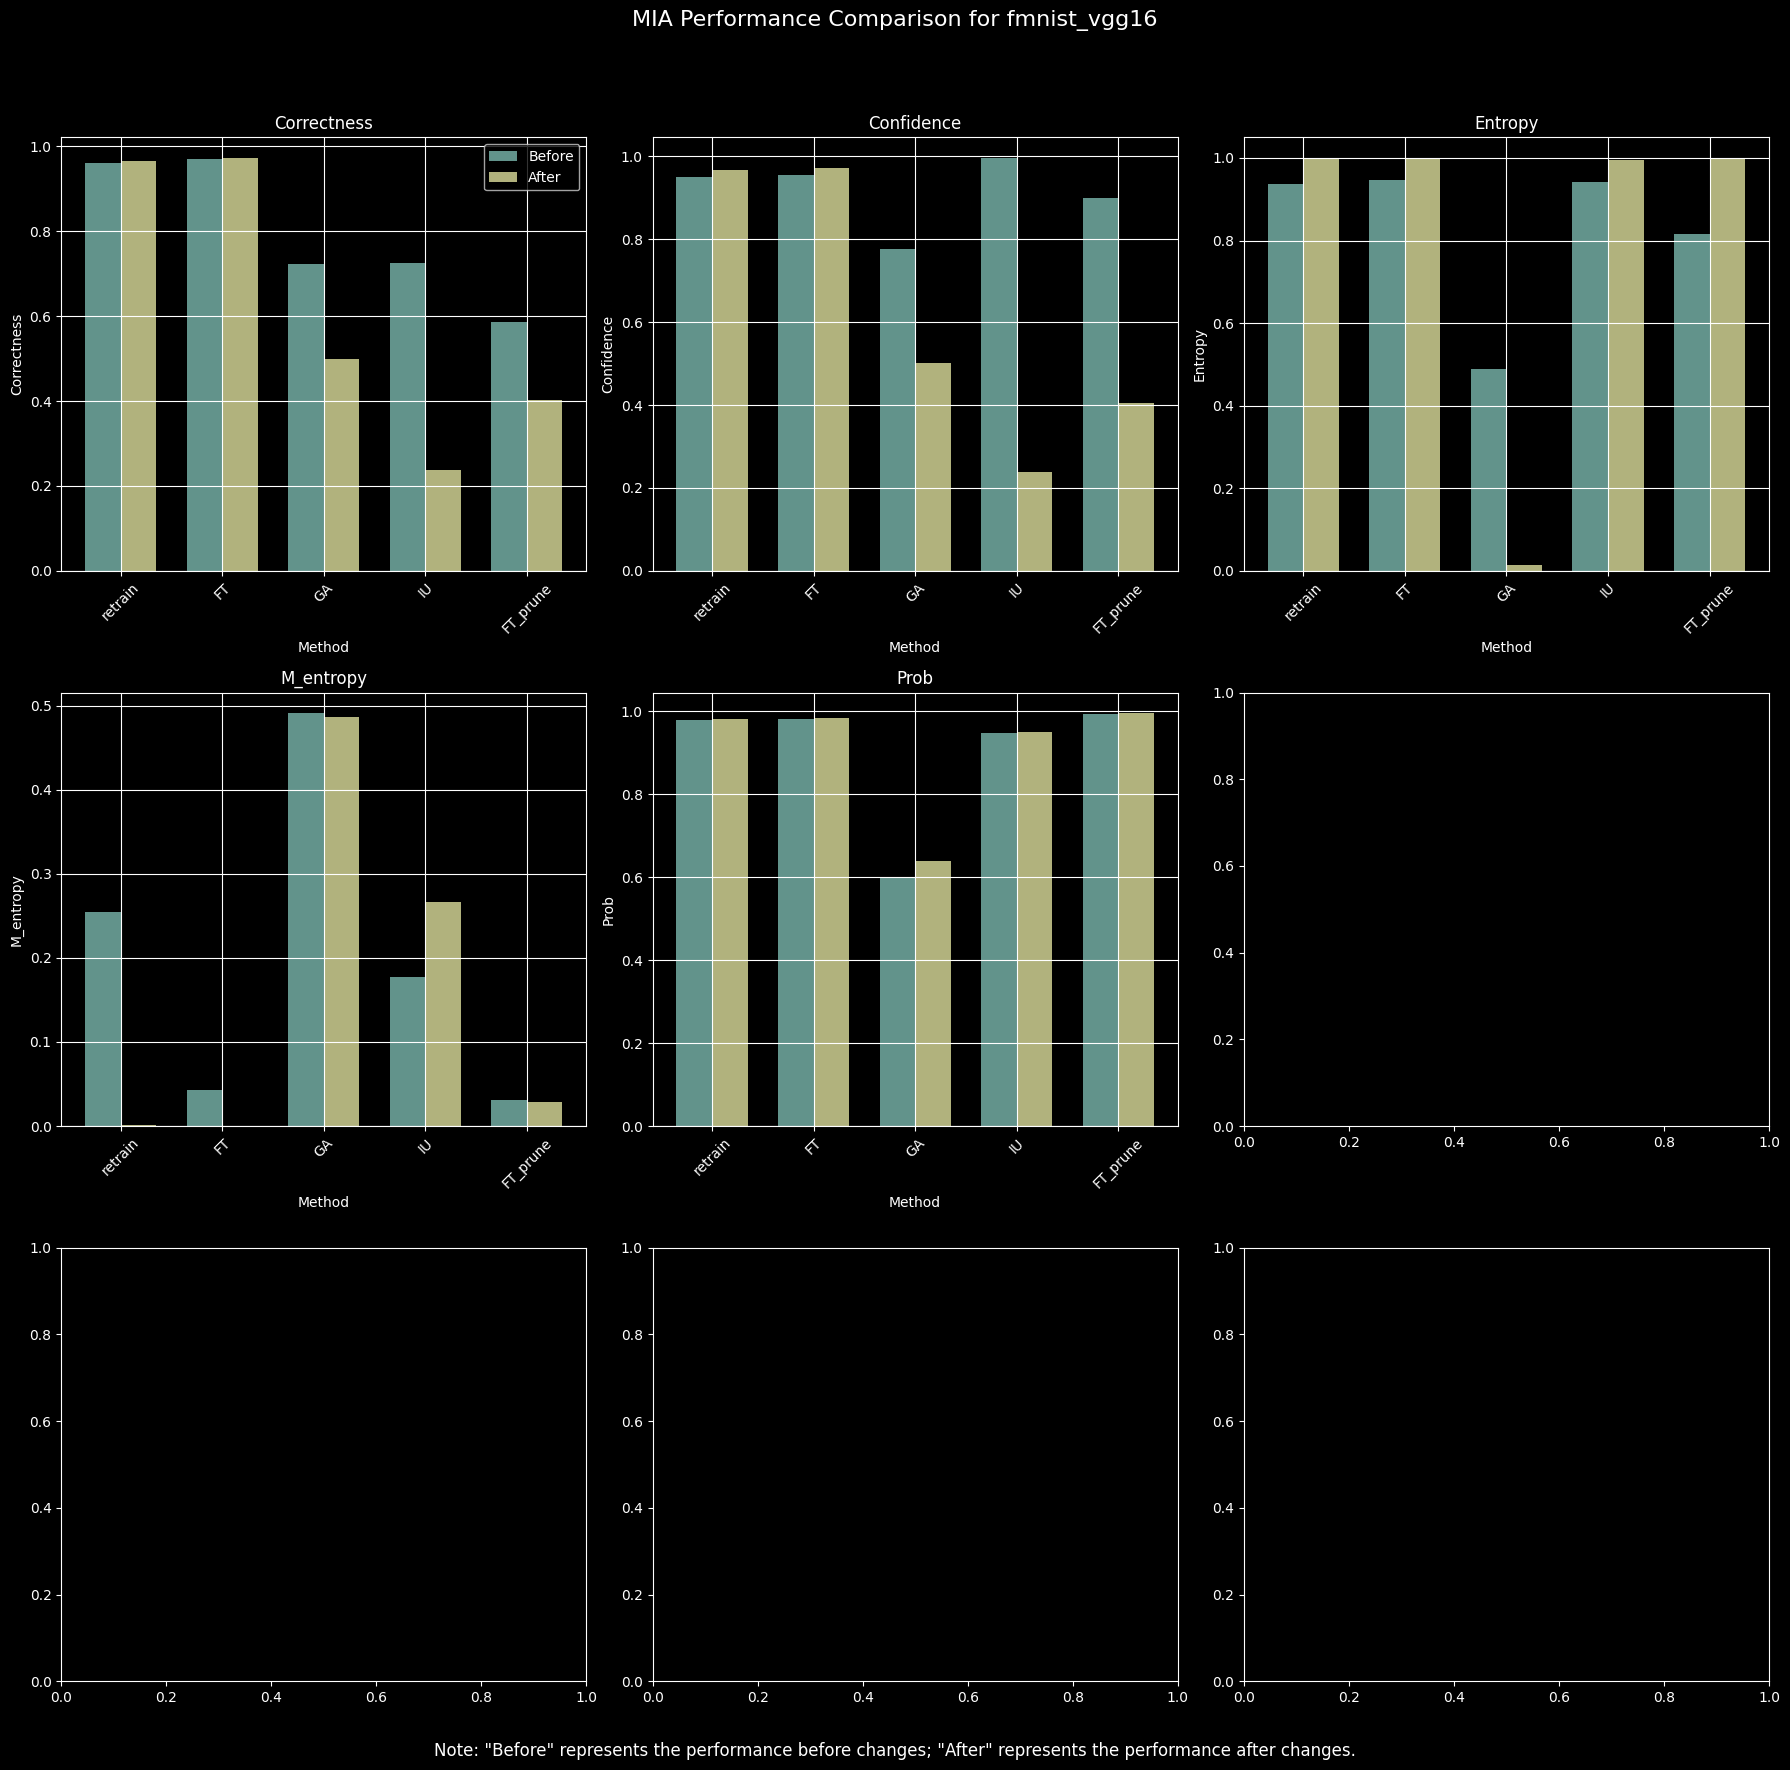

In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import zipfile

# # Step 1: Unzip the files
# ft_before_extract_path = '/mnt/data/ft_before_corrected'
# ft_after_extract_path = '/mnt/data/ft_after_corrected'

# with zipfile.ZipFile('/mnt/data/ft_before.zip', 'r') as zip_ref:
#     zip_ref.extractall(ft_before_extract_path)

# with zipfile.ZipFile('/mnt/data/ft_after.zip', 'r') as zip_ref:
#     zip_ref.extractall(ft_after_extract_path)

# Load the 'mia_after.csv' files from both directories
# mia_before_path = os.path.join(ft_before_extract_path, 'ft_before', 'mia_after.csv')
# mia_after_path = os.path.join(ft_after_extract_path, 'ft_after', 'mia_after.csv')
mia_before_path = os.path.join('ft_before', 'mia_after.csv')
mia_after_path = os.path.join('ft_after', 'mia_after.csv')

mia_before_df = pd.read_csv(mia_before_path)
mia_after_df = pd.read_csv(mia_after_path)

# Correct the JSON format in the DataFrames
mia_before_df_corrected = mia_before_df.copy()
mia_after_df_corrected = mia_after_df.copy()

for i in range(1, mia_before_df_corrected.shape[1]):
    mia_before_df_corrected.iloc[:, i] = mia_before_df_corrected.iloc[:, i].apply(correct_json_format)
    mia_after_df_corrected.iloc[:, i] = mia_after_df_corrected.iloc[:, i].apply(correct_json_format)

# Filter out rows with non-dictionary JSON data
filtered_mia_before_df = mia_before_df_corrected.copy()
filtered_mia_after_df = mia_after_df_corrected.copy()

for col in filtered_mia_before_df.columns[1:]:
    filtered_mia_before_df = filtered_mia_before_df[filtered_mia_before_df[col].apply(is_valid_json)]
    filtered_mia_after_df = filtered_mia_after_df[filtered_mia_after_df[col].apply(is_valid_json)]

# Extract the valid data keys for MIA analysis
mia_first_valid_data_cell = json.loads(filtered_mia_before_df.iloc[0, 1])
mia_valid_data_keys = mia_first_valid_data_cell.keys()

# Function to plot 9-grid comparison for MIA data
def plot_mia_comparison(dataset_column):
    fig, axes = plt.subplots(3, 3, figsize=(18, 18))
    axes = axes.flatten()

    for idx, key in enumerate(mia_valid_data_keys):
        ax = axes[idx]
        before_values = []
        after_values = []
        labels = []

        for i, row in filtered_mia_before_df.iterrows():
            method = row[0]
            before_data = json.loads(row[dataset_column])
            before_values.append(before_data.get(key, 0))
            labels.append(method)

            after_row = filtered_mia_after_df[filtered_mia_after_df.iloc[:, 0] == method]
            if not after_row.empty:
                after_data = json.loads(after_row.iloc[0][dataset_column])
                after_values.append(after_data.get(key, 0))
            else:
                after_values.append(0)

        x = range(len(labels))
        width = 0.35

        ax.bar(x, before_values, width=width, label='Before', alpha=0.7)
        ax.bar([p + width for p in x], after_values, width=width, label='After', alpha=0.7)

        ax.set_title(f'{key.capitalize()}')
        ax.set_xlabel('Method')
        ax.set_ylabel(f'{key.capitalize()}')
        ax.set_xticks([p + width/2 for p in x])
        ax.set_xticklabels(labels, rotation=45)
        ax.grid(True)
        if idx == 0:
            ax.legend()

    fig.suptitle(f'MIA Performance Comparison for {dataset_column}', fontsize=16)
    plt.figtext(0.5, 0.01, 'Note: "Before" represents the performance before changes; "After" represents the performance after changes.', ha='center', fontsize=12)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plotting for MIA data
mia_datasets = filtered_mia_before_df.columns[1:]
for dataset in mia_datasets:
    plot_mia_comparison(dataset)



## by MU method

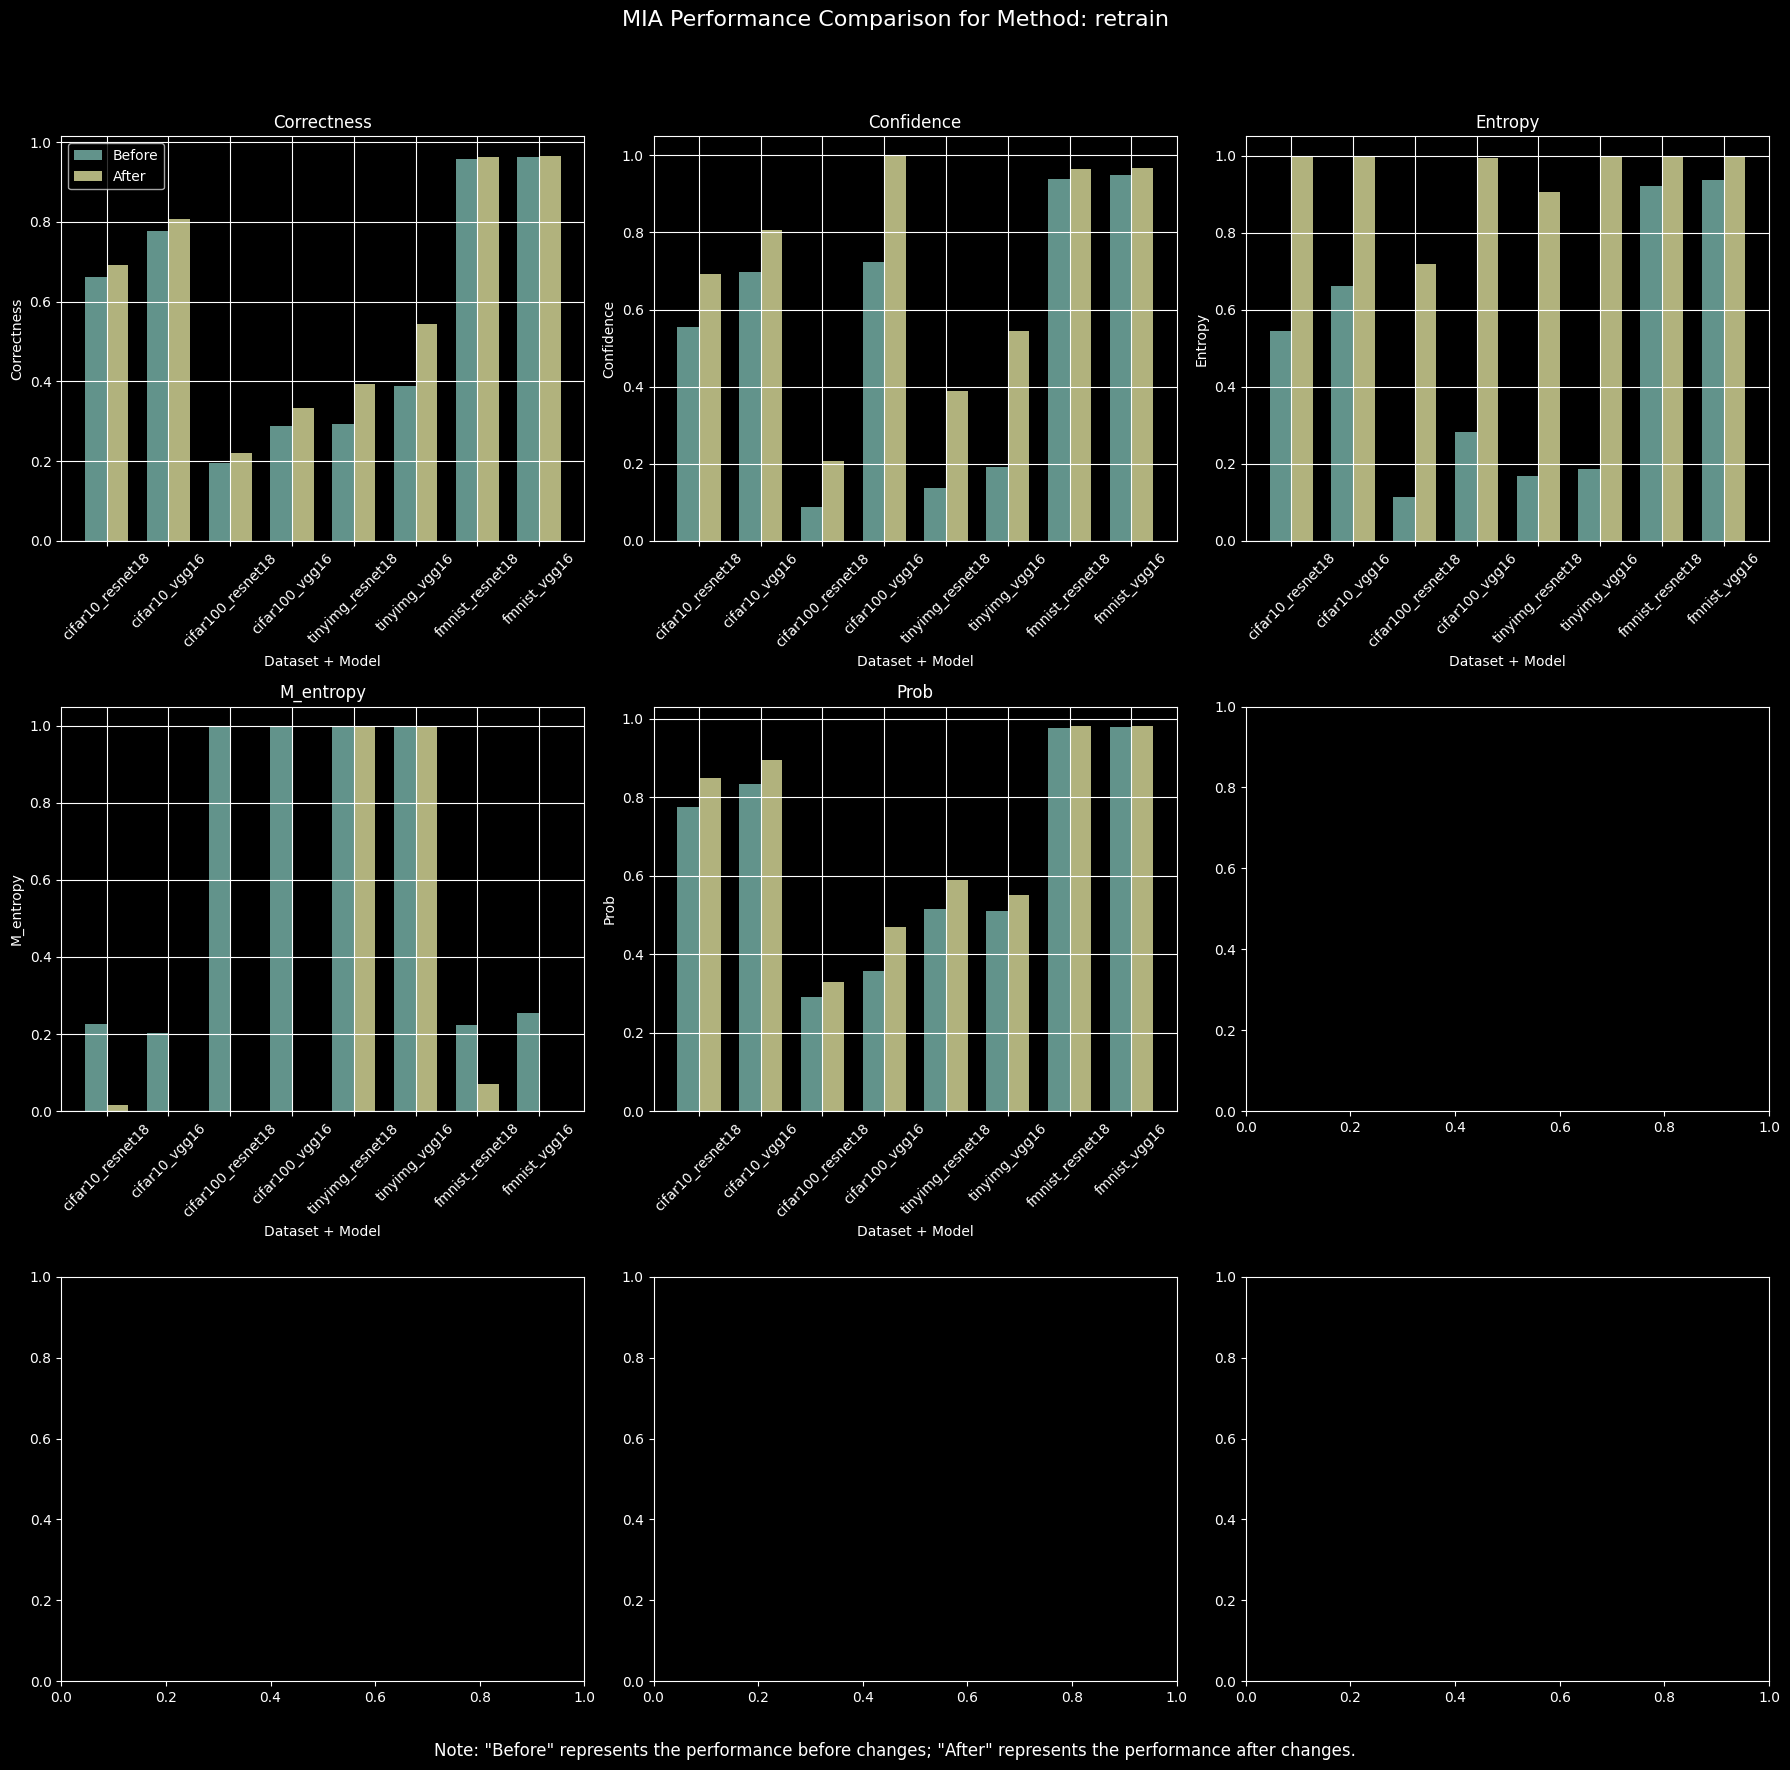

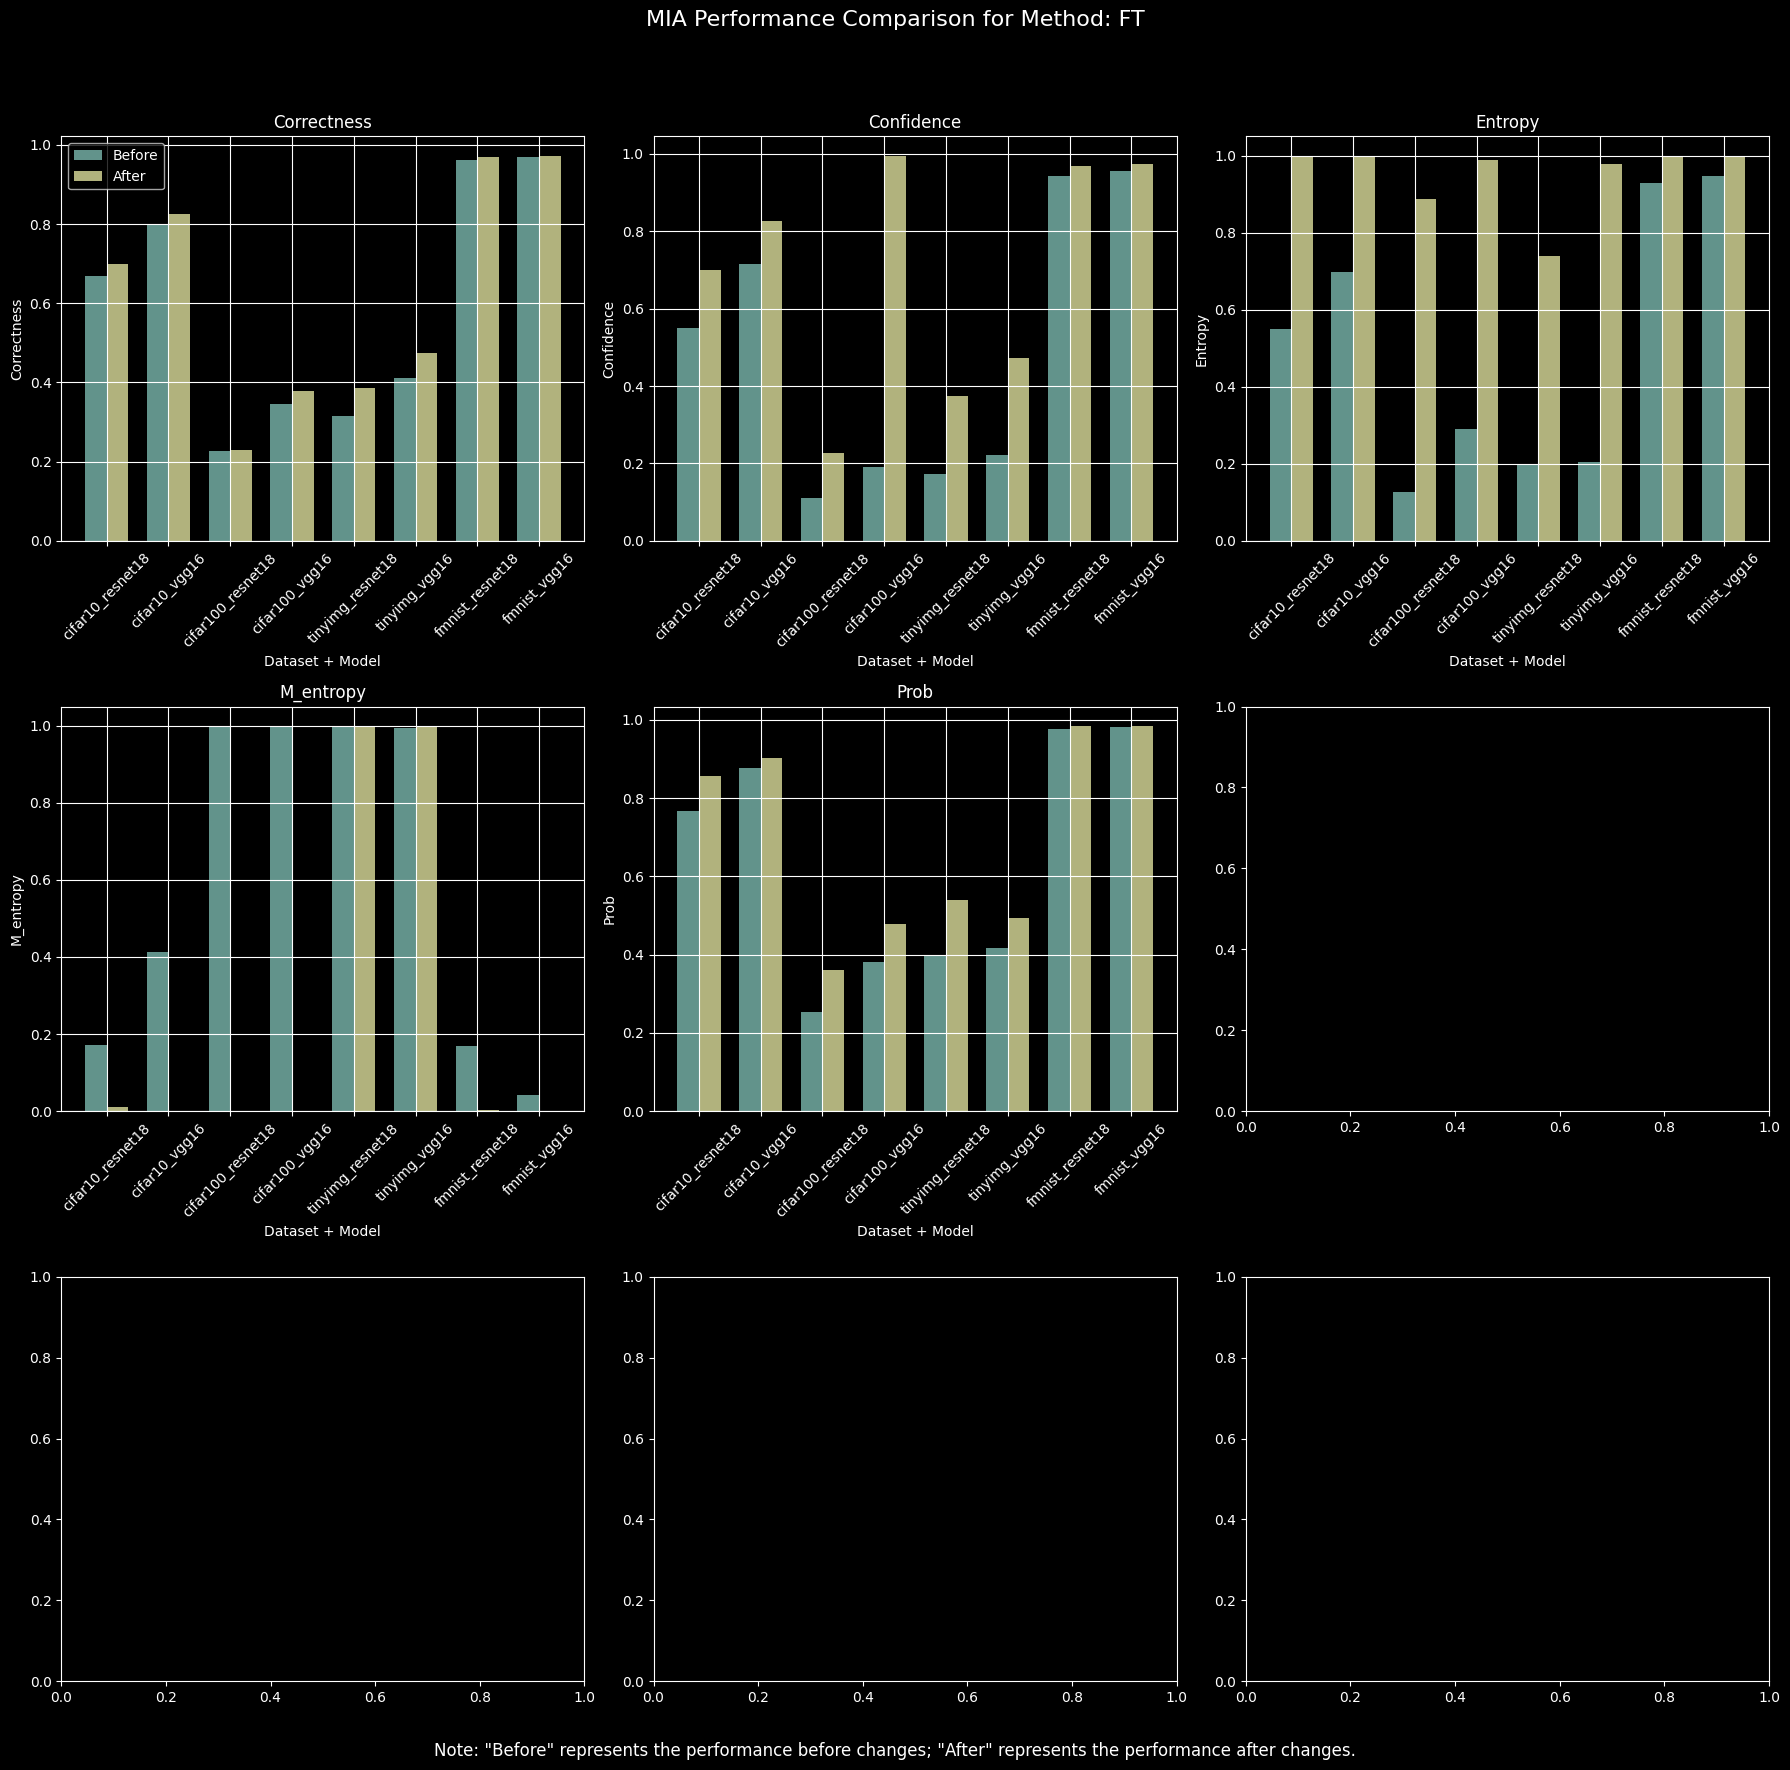

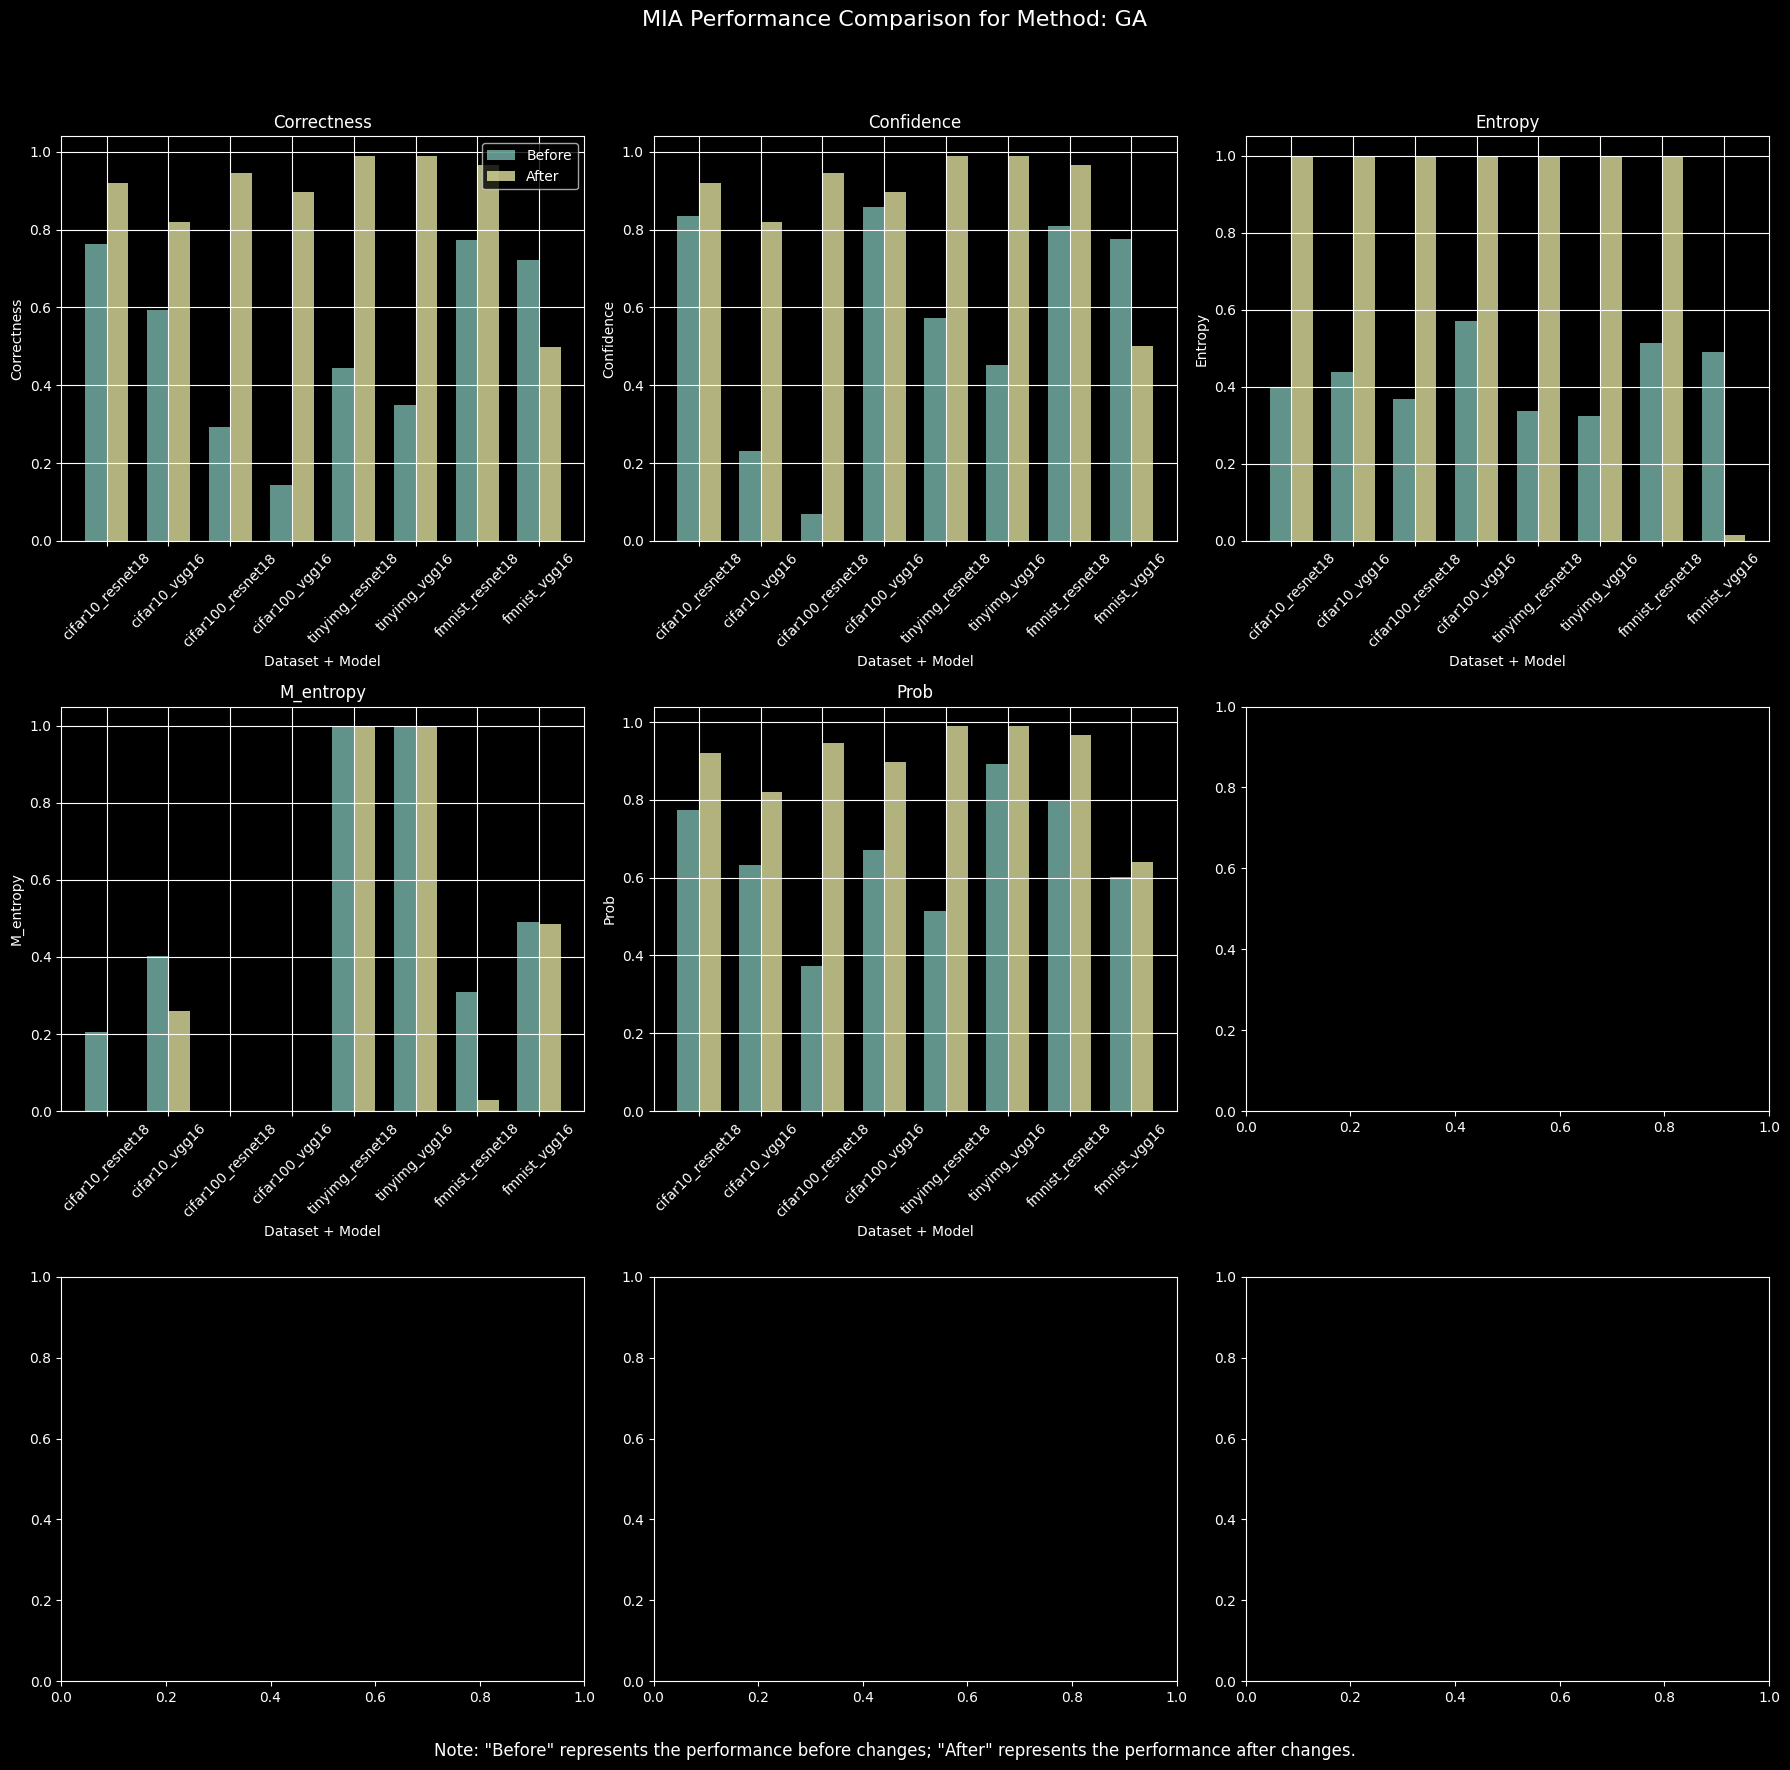

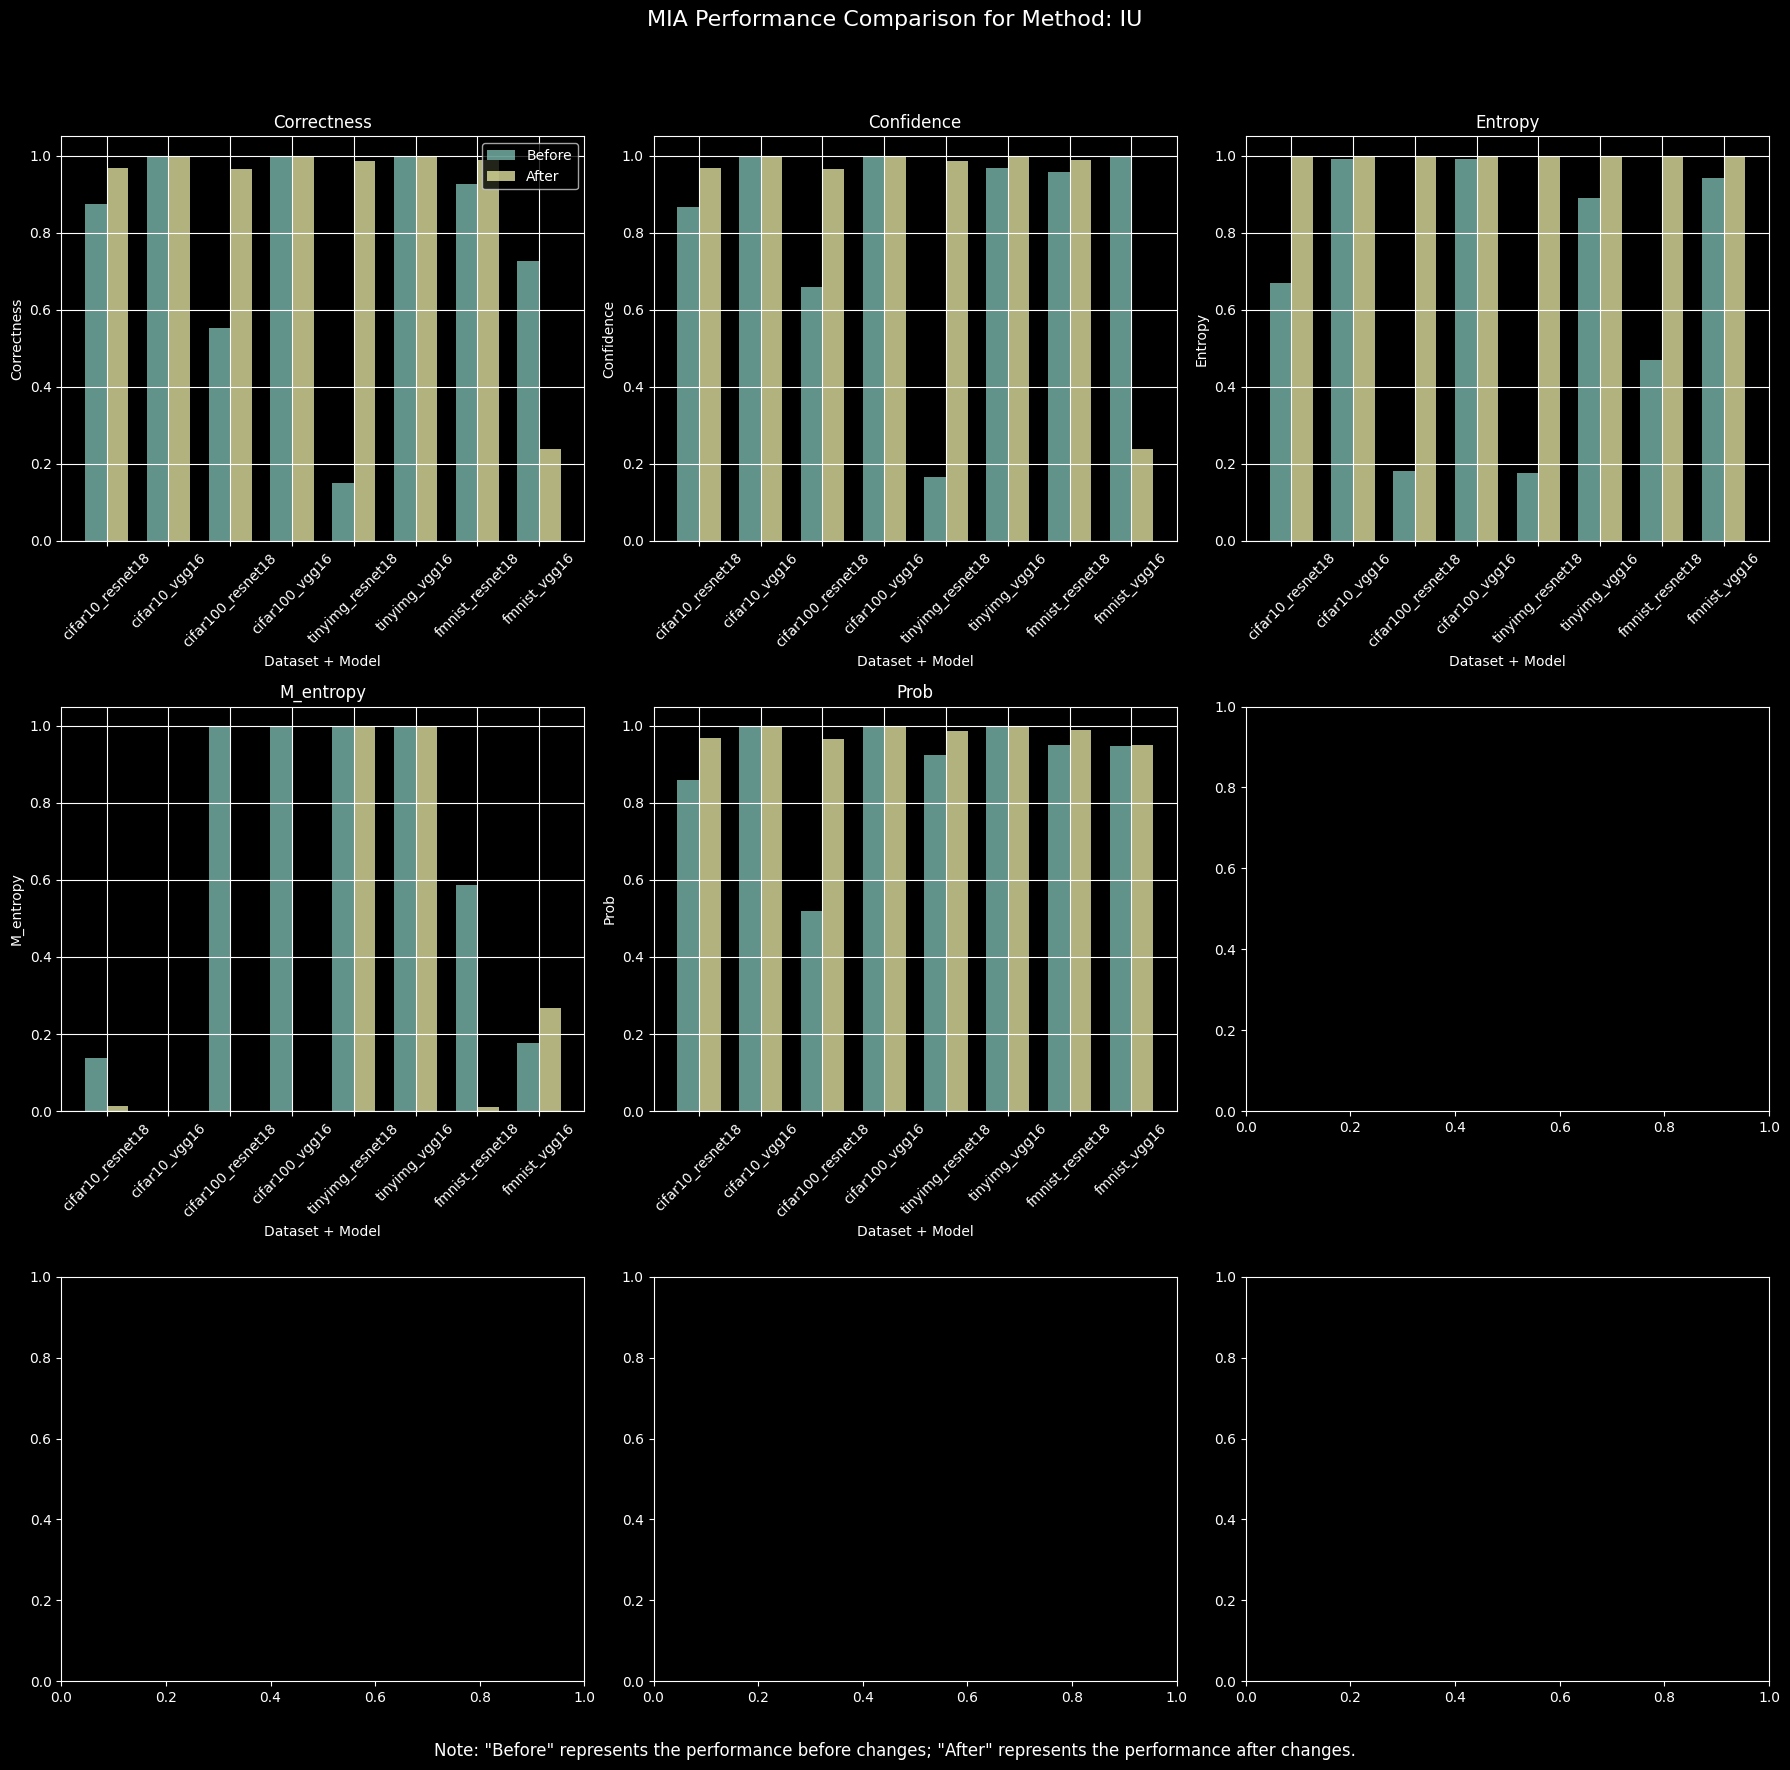

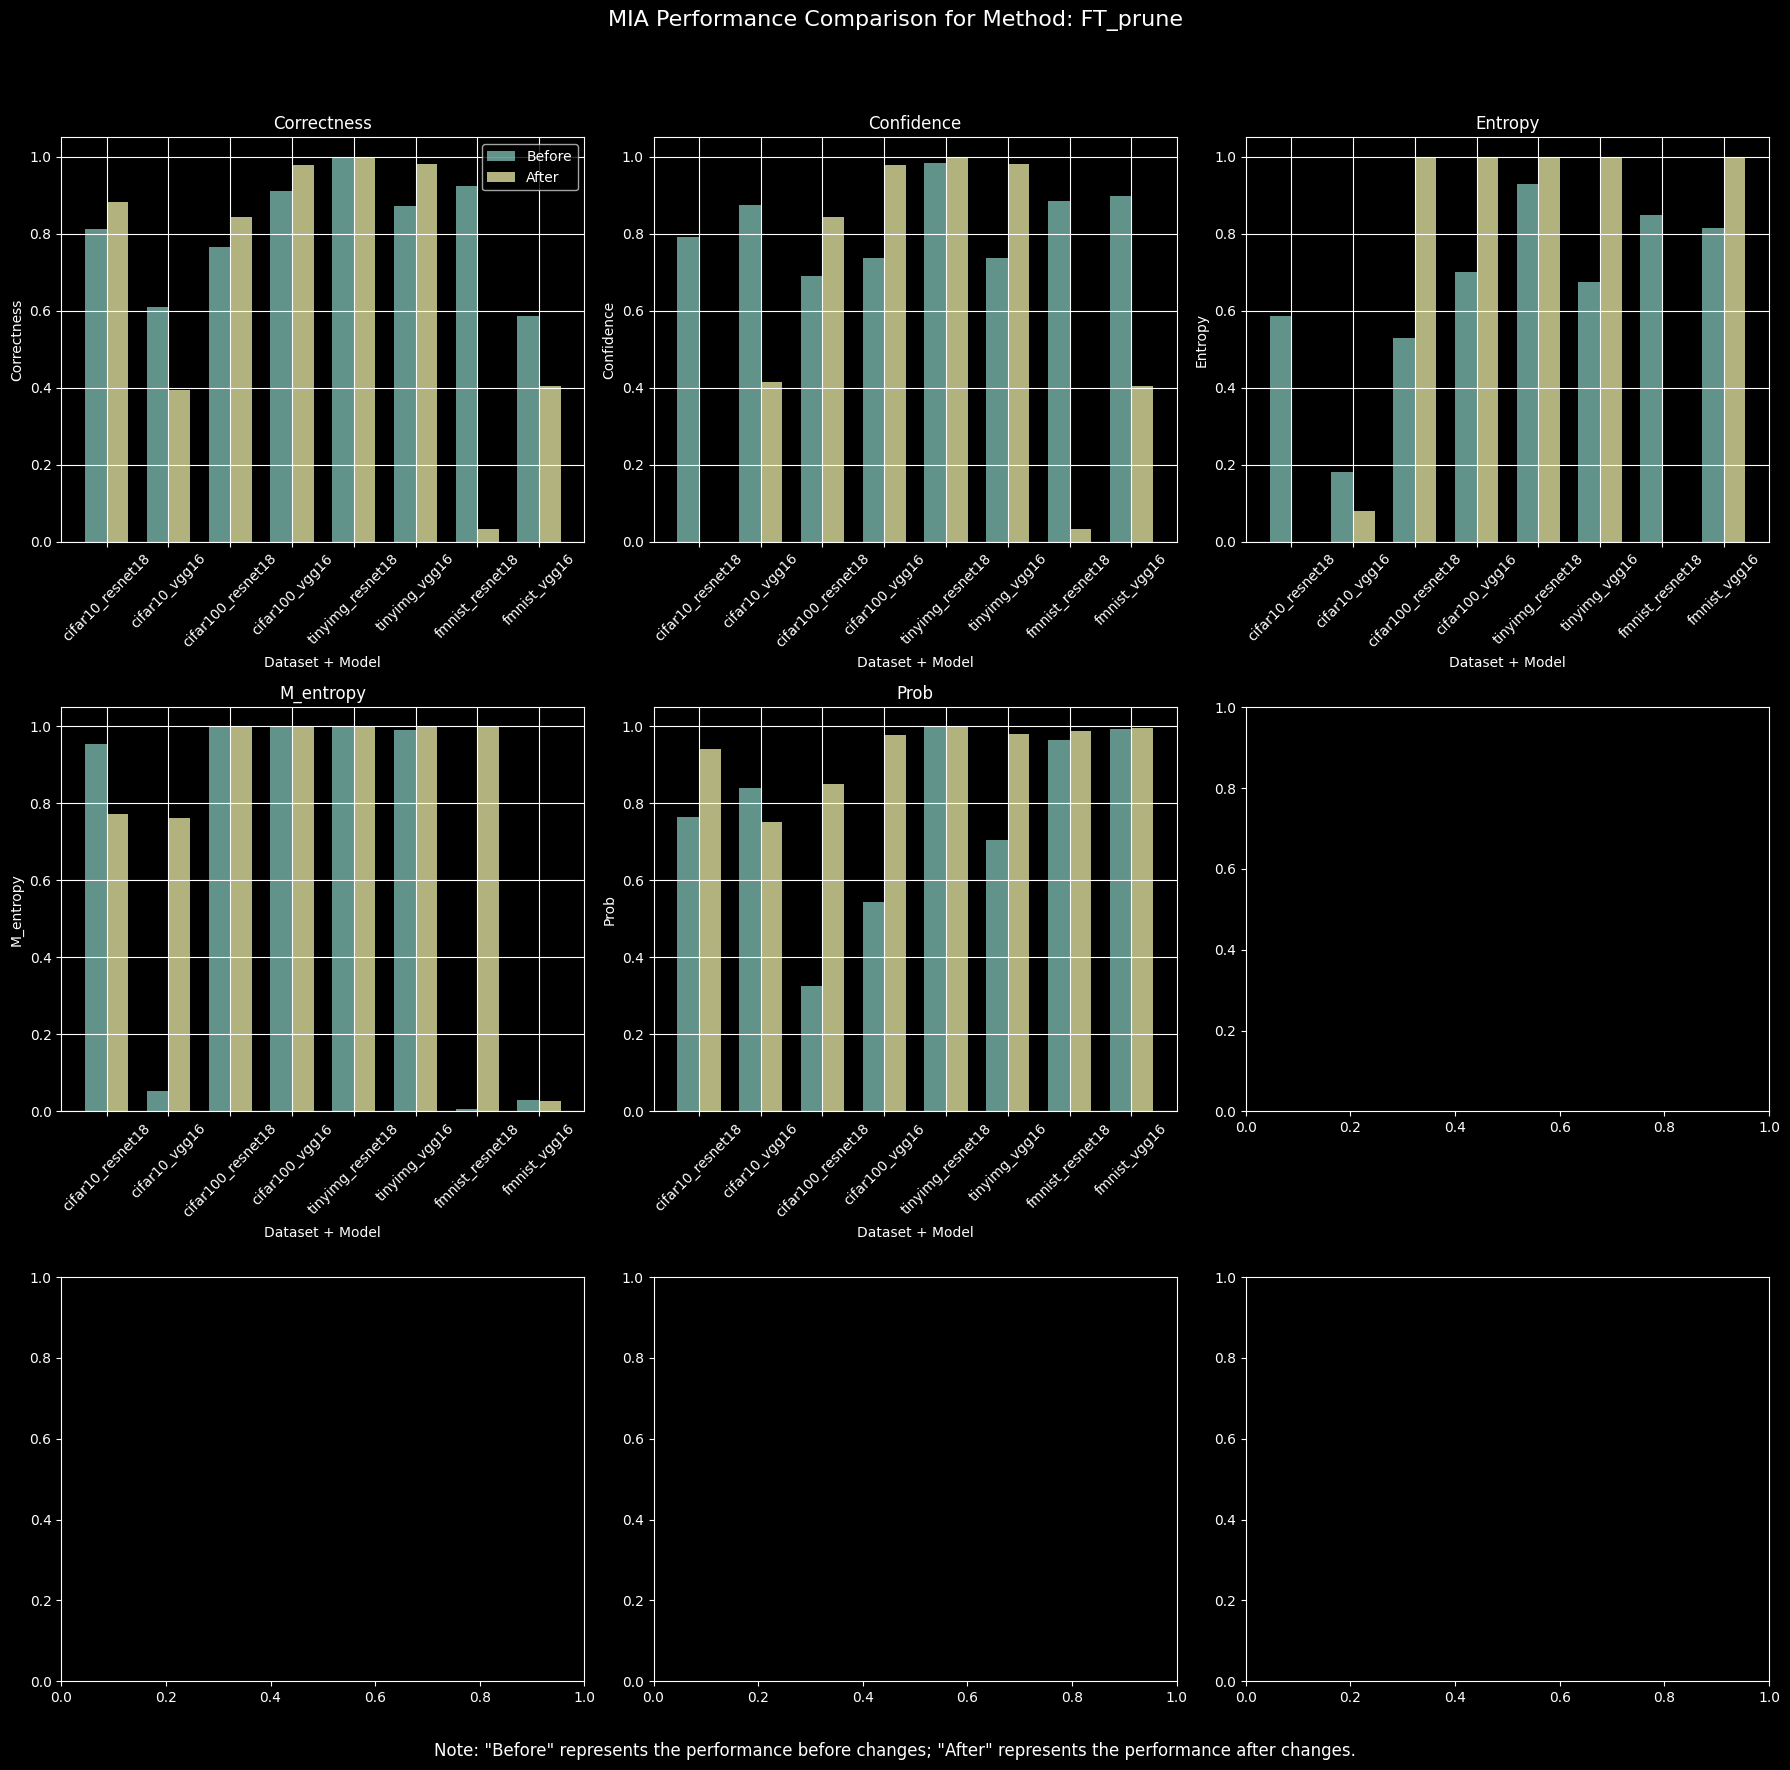

In [4]:
# Function to plot comparison for each machine unlearning method in MIA data
def plot_mia_method_comparison(method_name):
    fig, axes = plt.subplots(3, 3, figsize=(18, 18))
    axes = axes.flatten()

    for idx, key in enumerate(mia_valid_data_keys):
        ax = axes[idx]
        before_values = []
        after_values = []
        labels = []

        for dataset in filtered_mia_before_df.columns[1:]:
            before_row = filtered_mia_before_df[filtered_mia_before_df.iloc[:, 0] == method_name]
            after_row = filtered_mia_after_df[filtered_mia_after_df.iloc[:, 0] == method_name]

            if not before_row.empty:
                before_data = json.loads(before_row.iloc[0][dataset])
                before_values.append(before_data.get(key, 0))
            else:
                before_values.append(0)

            if not after_row.empty:
                after_data = json.loads(after_row.iloc[0][dataset])
                after_values.append(after_data.get(key, 0))
            else:
                after_values.append(0)

            labels.append(dataset)

        x = range(len(labels))
        width = 0.35

        ax.bar(x, before_values, width=width, label='Before', alpha=0.7)
        ax.bar([p + width for p in x], after_values, width=width, label='After', alpha=0.7)

        ax.set_title(f'{key.capitalize()}')
        ax.set_xlabel('Dataset + Model')
        ax.set_ylabel(f'{key.capitalize()}')
        ax.set_xticks([p + width/2 for p in x])
        ax.set_xticklabels(labels, rotation=45)
        ax.grid(True)
        if idx == 0:
            ax.legend()

    fig.suptitle(f'MIA Performance Comparison for Method: {method_name}', fontsize=16)
    plt.figtext(0.5, 0.01, 'Note: "Before" represents the performance before changes; "After" represents the performance after changes.', ha='center', fontsize=12)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plotting for each machine unlearning method in MIA data
mia_methods = filtered_mia_before_df.iloc[:, 0].unique()
for method in mia_methods:
    plot_mia_method_comparison(method)


# 热力图

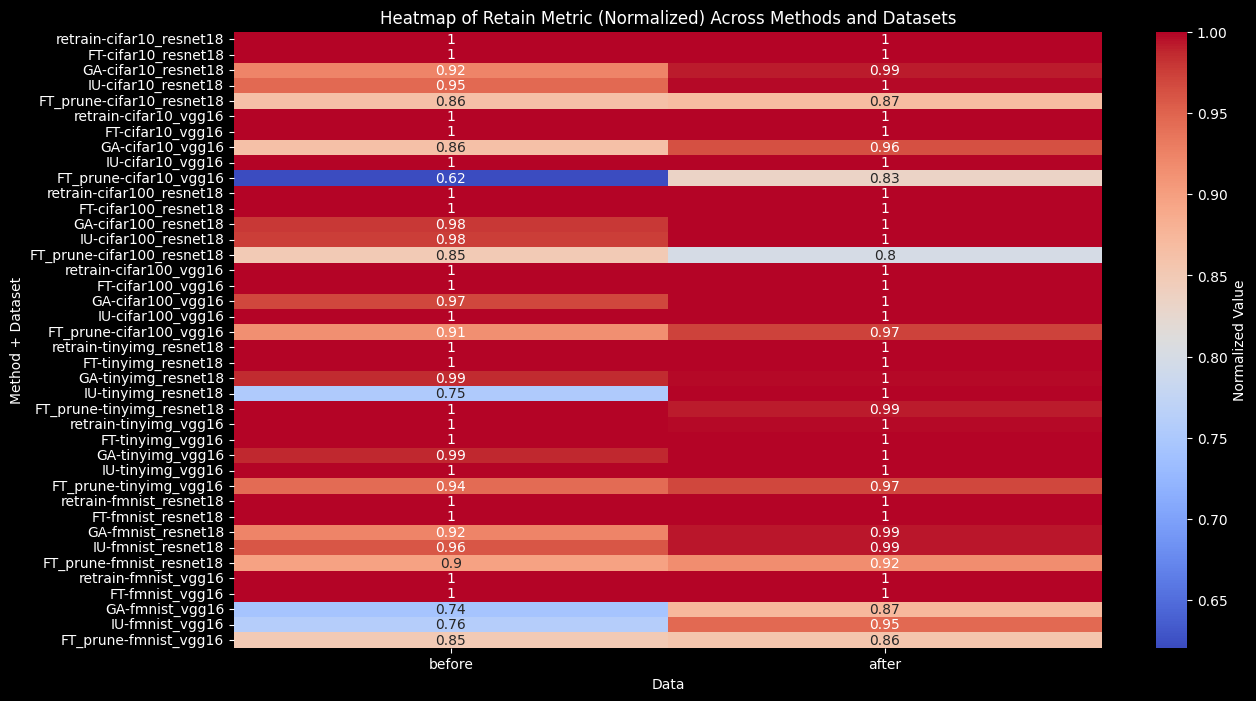

In [5]:
# Adjusting data handling for missing values
# Initialize a dictionary to store aggregated results with default values

aggregated_data = {}

# Function to aggregate data for a given dataset column with default handling
def aggregate_data_for_dataset(dataset_column):
    for method in methods:
        # Before data
        before_row = filtered_df[filtered_df.iloc[:, 0] == method]
        after_row = filtered_after_df[filtered_after_df.iloc[:, 0] == method]
        if not before_row.empty:
            before_data = json.loads(before_row.iloc[0][dataset_column])
        else:
            before_data = {key: 0 for key in valid_data_keys}
        
        if not after_row.empty:
            after_data = json.loads(after_row.iloc[0][dataset_column])
        else:
            after_data = {key: 0 for key in valid_data_keys}
        
        for key in valid_data_keys:
            if (method, dataset_column, key) not in aggregated_data:
                aggregated_data[(method, dataset_column, key)] = {
                    'before': before_data.get(key, 0),
                    'after': after_data.get(key, 0)
                }

# Aggregating data for all datasets
for dataset in filtered_df.columns[1:]:
    aggregate_data_for_dataset(dataset)

# Convert the aggregated data to a DataFrame
heatmap_data = pd.DataFrame.from_dict(aggregated_data, orient='index')

# Normalize the data for better heatmap visualization
heatmap_data_normalized = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

# Plotting the heatmap for 'retain' key as an example
import seaborn as sns

retain_data = heatmap_data_normalized.xs('retain', level=2, axis=0)
plt.figure(figsize=(14, 8))
sns.heatmap(retain_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Normalized Value'})
plt.title('Heatmap of Retain Metric (Normalized) Across Methods and Datasets')
plt.xlabel('Data')
plt.ylabel('Method + Dataset')
plt.show()


# 箱线图

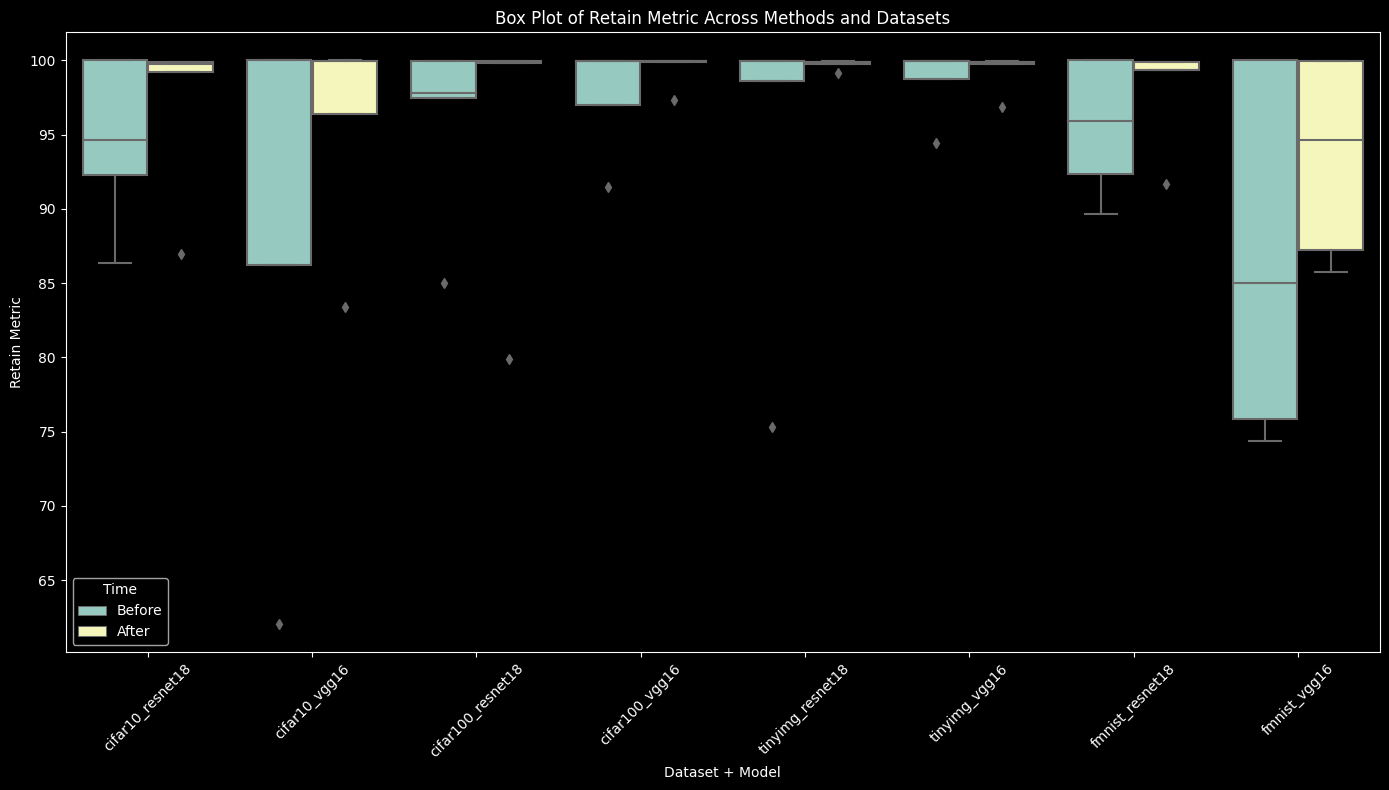

In [6]:
# Preparing the data for box plot visualization
# Extract data for box plot visualization for all methods and datasets

box_plot_data = []

# Function to collect data for a given method and metric
def collect_box_plot_data(method, metric):
    for dataset in filtered_df.columns[1:]:
        before_row = filtered_df[filtered_df.iloc[:, 0] == method]
        after_row = filtered_after_df[filtered_after_df.iloc[:, 0] == method]
        
        if not before_row.empty:
            before_data = json.loads(before_row.iloc[0][dataset]).get(metric, None)
        else:
            before_data = None
        
        if not after_row.empty:
            after_data = json.loads(after_row.iloc[0][dataset]).get(metric, None)
        else:
            after_data = None
        
        box_plot_data.append((method, dataset, 'Before', before_data))
        box_plot_data.append((method, dataset, 'After', after_data))

# Collecting data for the 'retain' metric as an example
metric = 'retain'
for method in methods:
    collect_box_plot_data(method, metric)

# Convert the collected data to a DataFrame
box_plot_df = pd.DataFrame(box_plot_data, columns=['Method', 'Dataset', 'Time', 'Value'])

# Plotting the box plot for 'retain' metric
plt.figure(figsize=(14, 8))
sns.boxplot(data=box_plot_df, x='Dataset', y='Value', hue='Time')
plt.title('Box Plot of Retain Metric Across Methods and Datasets')
plt.xlabel('Dataset + Model')
plt.ylabel('Retain Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 其他图

## 粗略

/tmp/ipykernel_247547/3936819907.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  method = row[0]


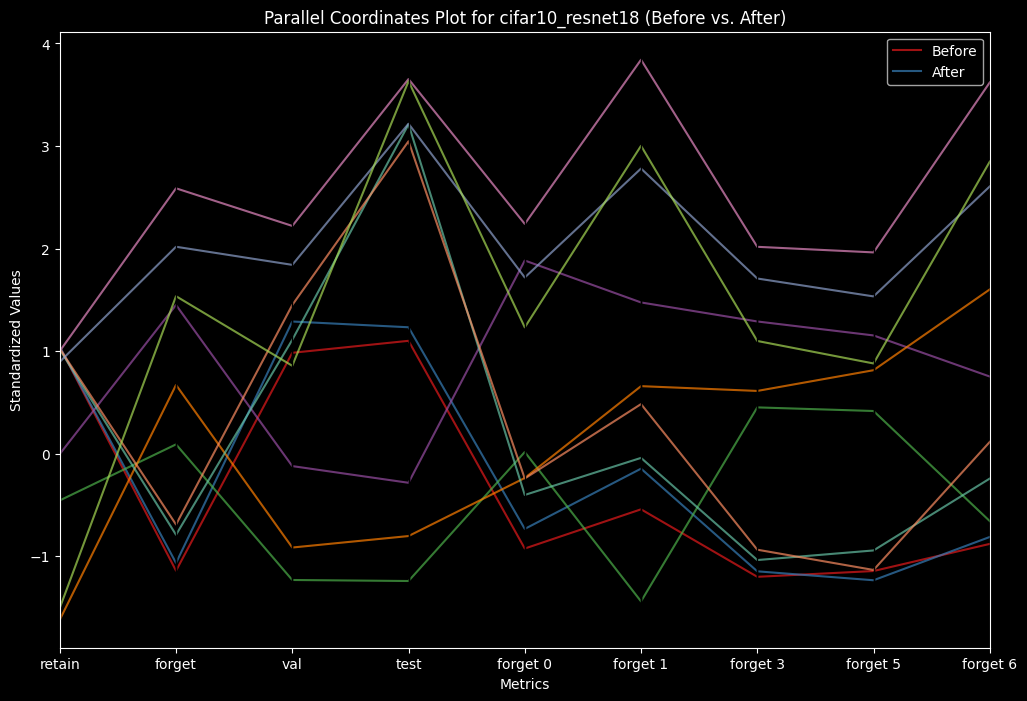

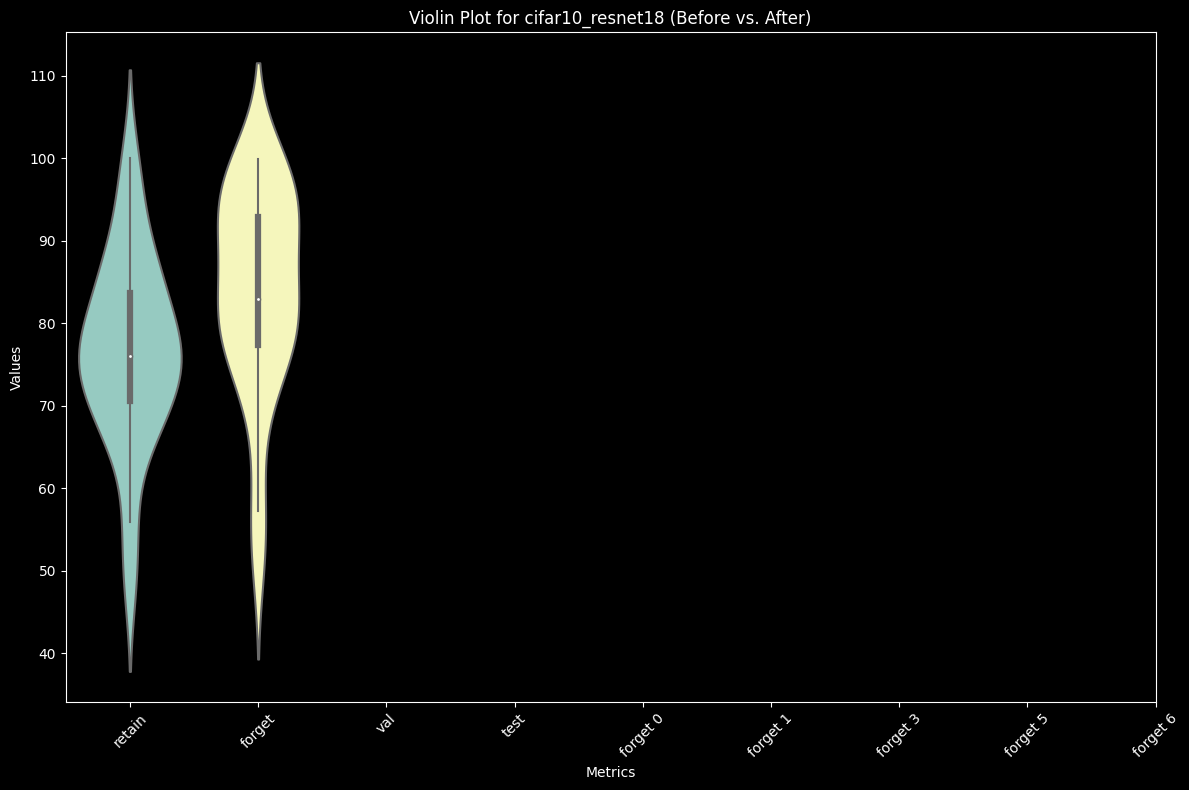

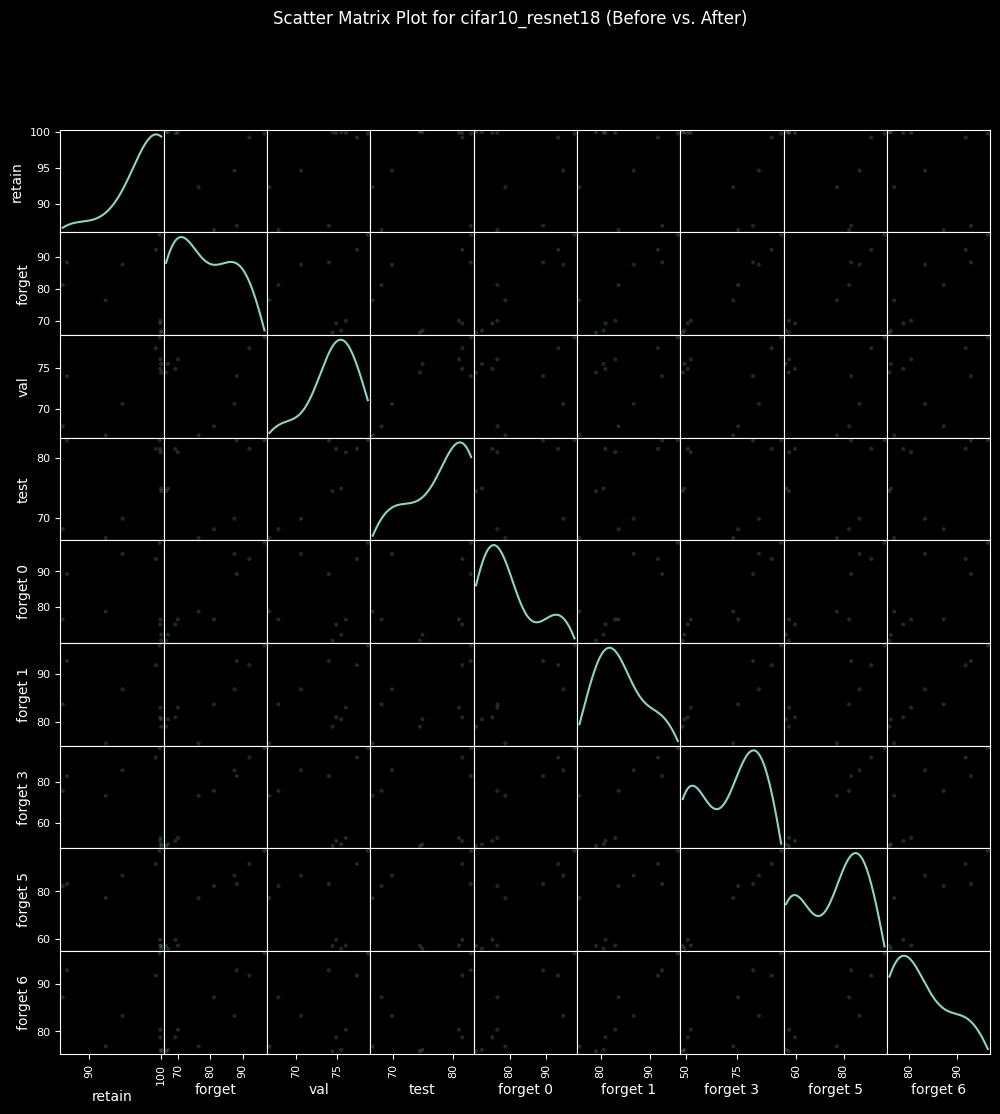

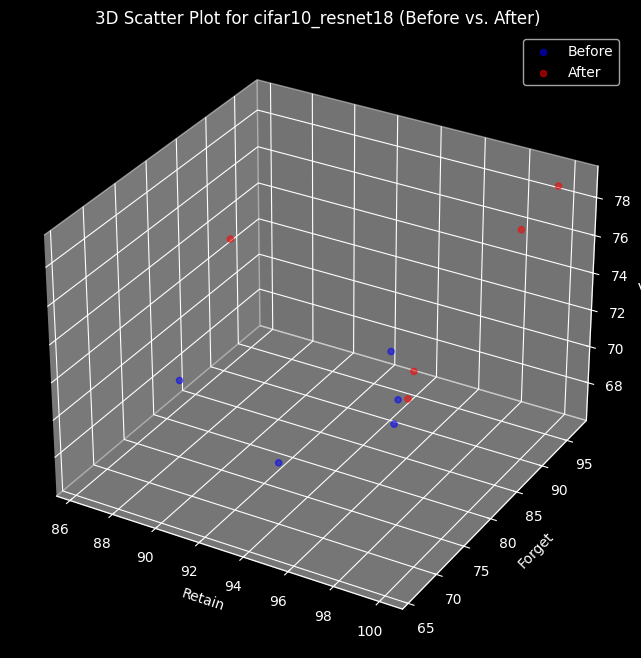

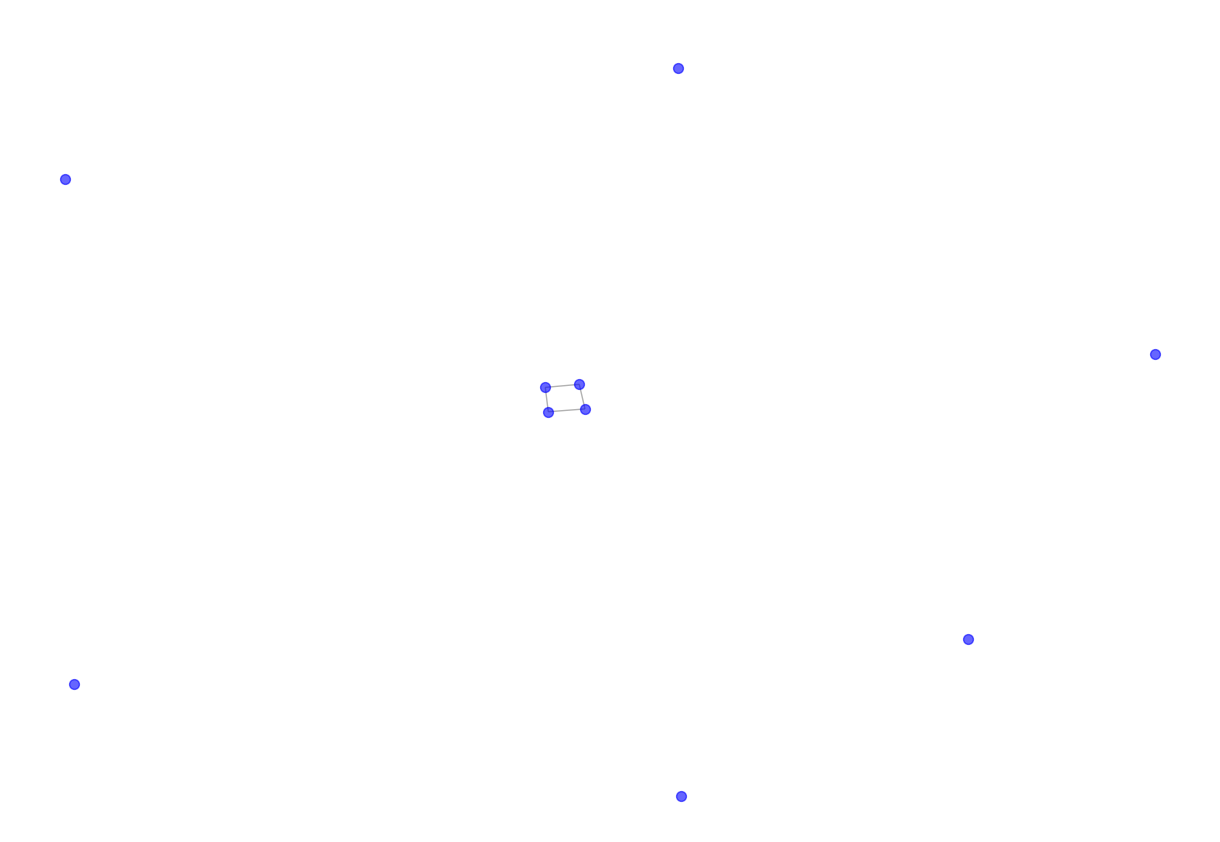

In [8]:
import seaborn as sns
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

# Prepare the data for visualization
def prepare_data(df, dataset_column):
    data = []
    for i, row in df.iterrows():
        method = row[0]
        json_data = json.loads(row[dataset_column])
        json_data['Method'] = method
        data.append(json_data)
    return pd.DataFrame(data)

# Preparing data for 'ft_before' and 'ft_after' for a specific dataset
dataset_column = 'cifar10_resnet18'
before_data = prepare_data(filtered_df, dataset_column)
after_data = prepare_data(filtered_after_df, dataset_column)

# Standardizing the data for parallel coordinates plot
scaler = StandardScaler()
before_scaled = scaler.fit_transform(before_data.drop(columns=['Method']))
after_scaled = scaler.transform(after_data.drop(columns=['Method']))

before_scaled_df = pd.DataFrame(before_scaled, columns=before_data.columns[:-1])
after_scaled_df = pd.DataFrame(after_scaled, columns=after_data.columns[:-1])
before_scaled_df['Method'] = before_data['Method']
after_scaled_df['Method'] = after_data['Method']

# Parallel Coordinates Plot
plt.figure(figsize=(12, 8))
pd.plotting.parallel_coordinates(before_scaled_df, 'Method', color=plt.cm.Set1.colors, alpha=0.7)
pd.plotting.parallel_coordinates(after_scaled_df, 'Method', color=plt.cm.Set2.colors, alpha=0.7)
plt.title('Parallel Coordinates Plot for cifar10_resnet18 (Before vs. After)')
plt.xlabel('Metrics')
plt.ylabel('Standardized Values')
plt.legend(['Before'] + ['After'], loc='upper right')
plt.show()

# Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=[before_data.drop(columns=['Method']), after_data.drop(columns=['Method'])], split=True)
plt.title('Violin Plot for cifar10_resnet18 (Before vs. After)')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(np.arange(len(before_data.columns[:-1])), before_data.columns[:-1], rotation=45)
plt.tight_layout()
plt.show()

# Scatter Matrix Plot
combined_data = pd.concat([before_data, after_data], axis=0)
combined_data['Type'] = ['Before'] * len(before_data) + ['After'] * len(after_data)
scatter_matrix(combined_data.drop(columns=['Method', 'Type']), alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Matrix Plot for cifar10_resnet18 (Before vs. After)')
plt.show()

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(before_data['retain'], before_data['forget'], before_data['val'], c='b', label='Before', alpha=0.5)
ax.scatter(after_data['retain'], after_data['forget'], after_data['val'], c='r', label='After', alpha=0.5)
ax.set_xlabel('Retain')
ax.set_ylabel('Forget')
ax.set_zlabel('Val')
ax.set_title('3D Scatter Plot for cifar10_resnet18 (Before vs. After)')
ax.legend()
plt.show()

# Network Graph (Example using a similarity matrix approach)
G = nx.Graph()

# Add nodes with a attribute "type" as before or after
for i, row in before_data.iterrows():
    G.add_node(f'before_{i}', attr_dict=row.to_dict())
for i, row in after_data.iterrows():
    G.add_node(f'after_{i}', attr_dict=row.to_dict())

# Create edges based on some similarity measure, here using simple Euclidean distance threshold
threshold = 15  # Example threshold value
for i, row1 in before_data.iterrows():
    for j, row2 in after_data.iterrows():
        distance = np.linalg.norm(row1.drop('Method') - row2.drop('Method'))
        if distance < threshold:
            G.add_edge(f'before_{i}', f'after_{j}', weight=distance)

pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_size=50, node_color='blue', edge_color='grey', alpha=0.6)
plt.title('Network Graph for cifar10_resnet18 (Before vs. After)')
plt.show()



## 详细

/tmp/ipykernel_247547/1568363321.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_row['Method'] = row[0]


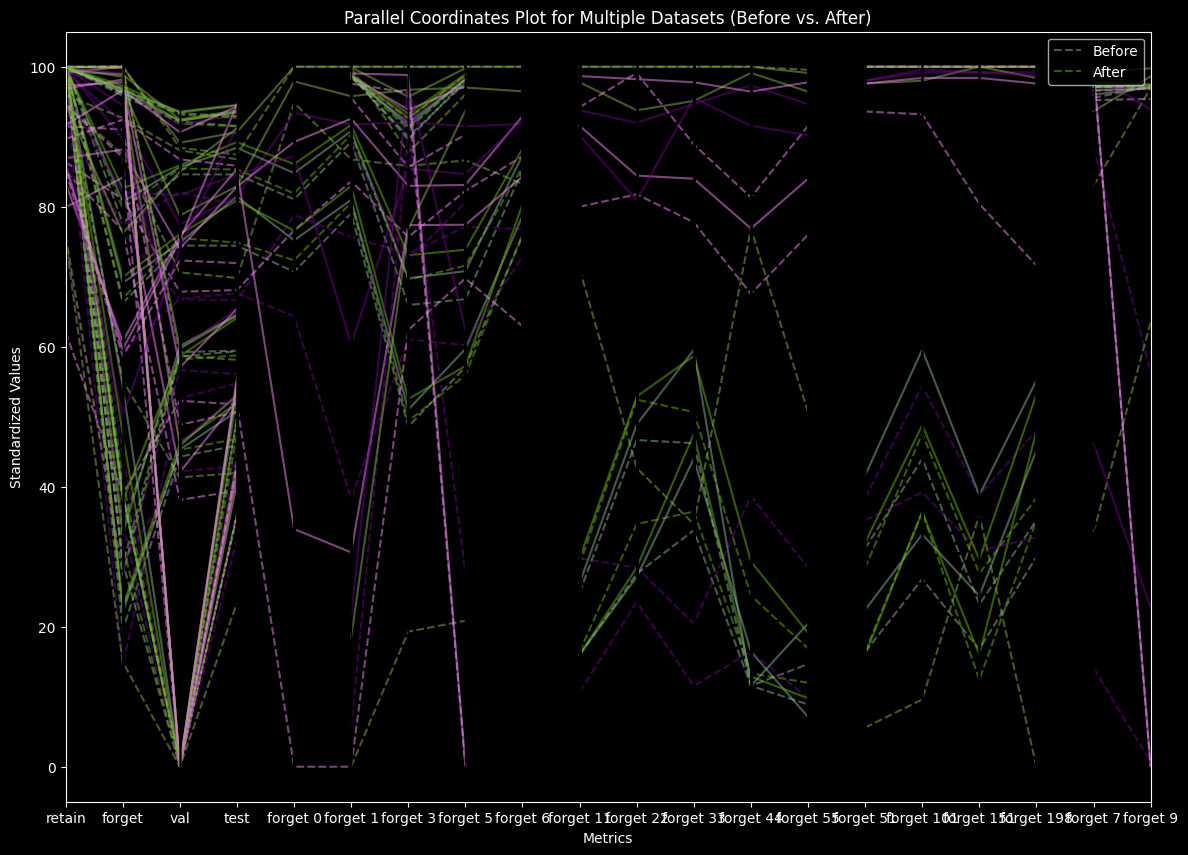

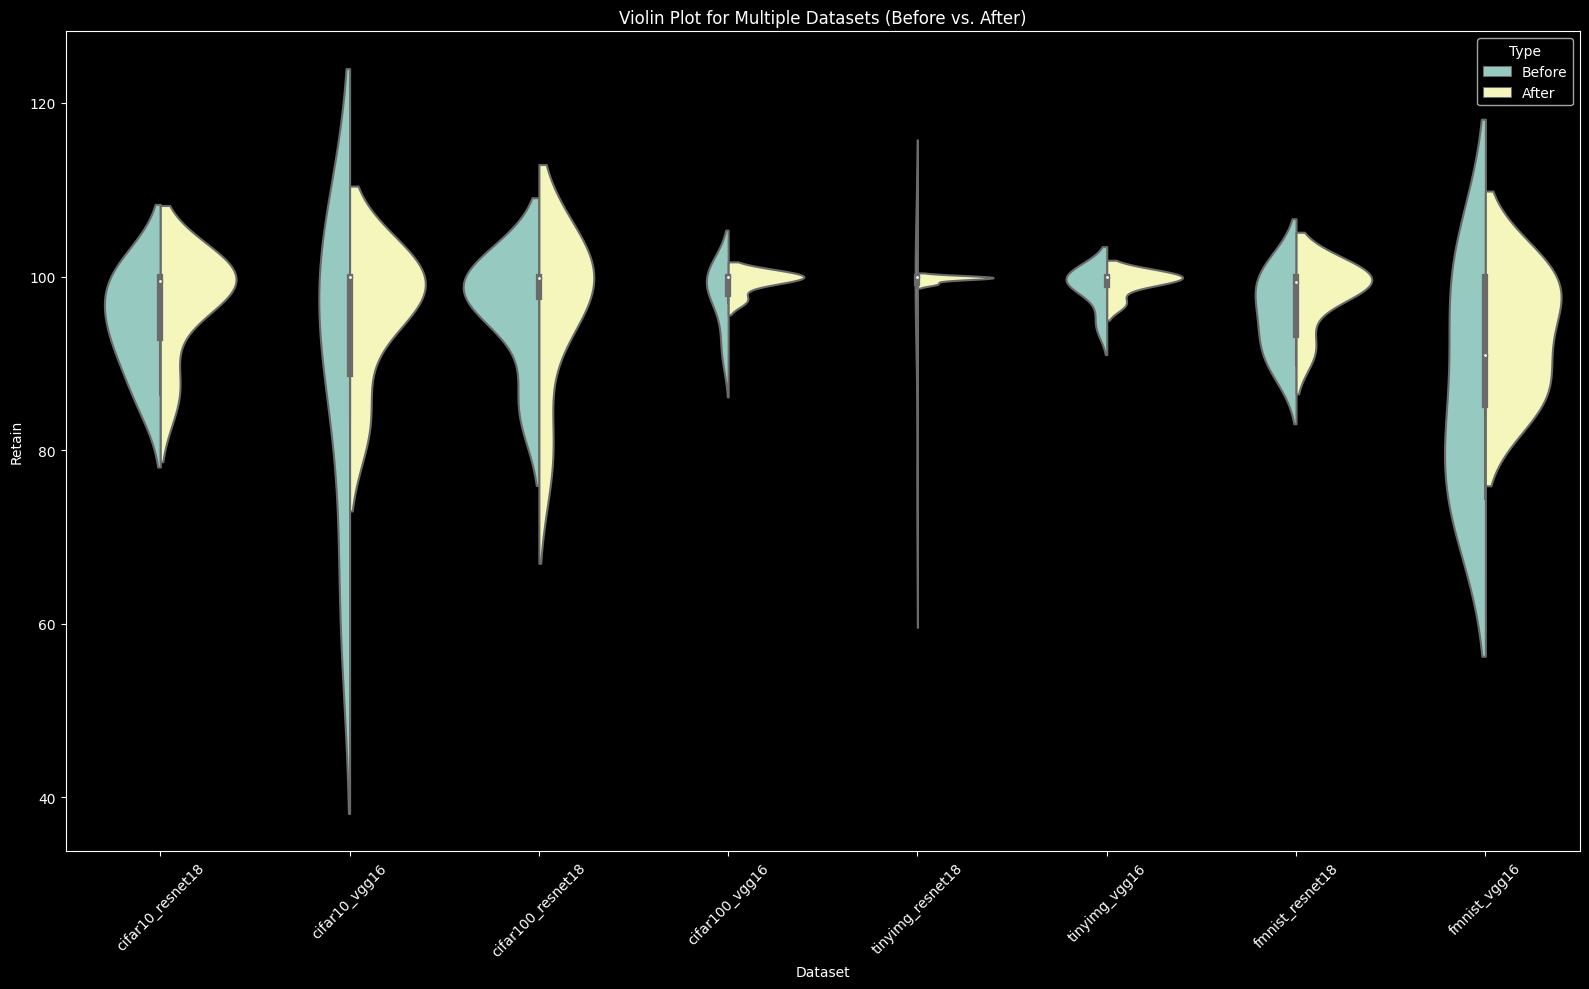

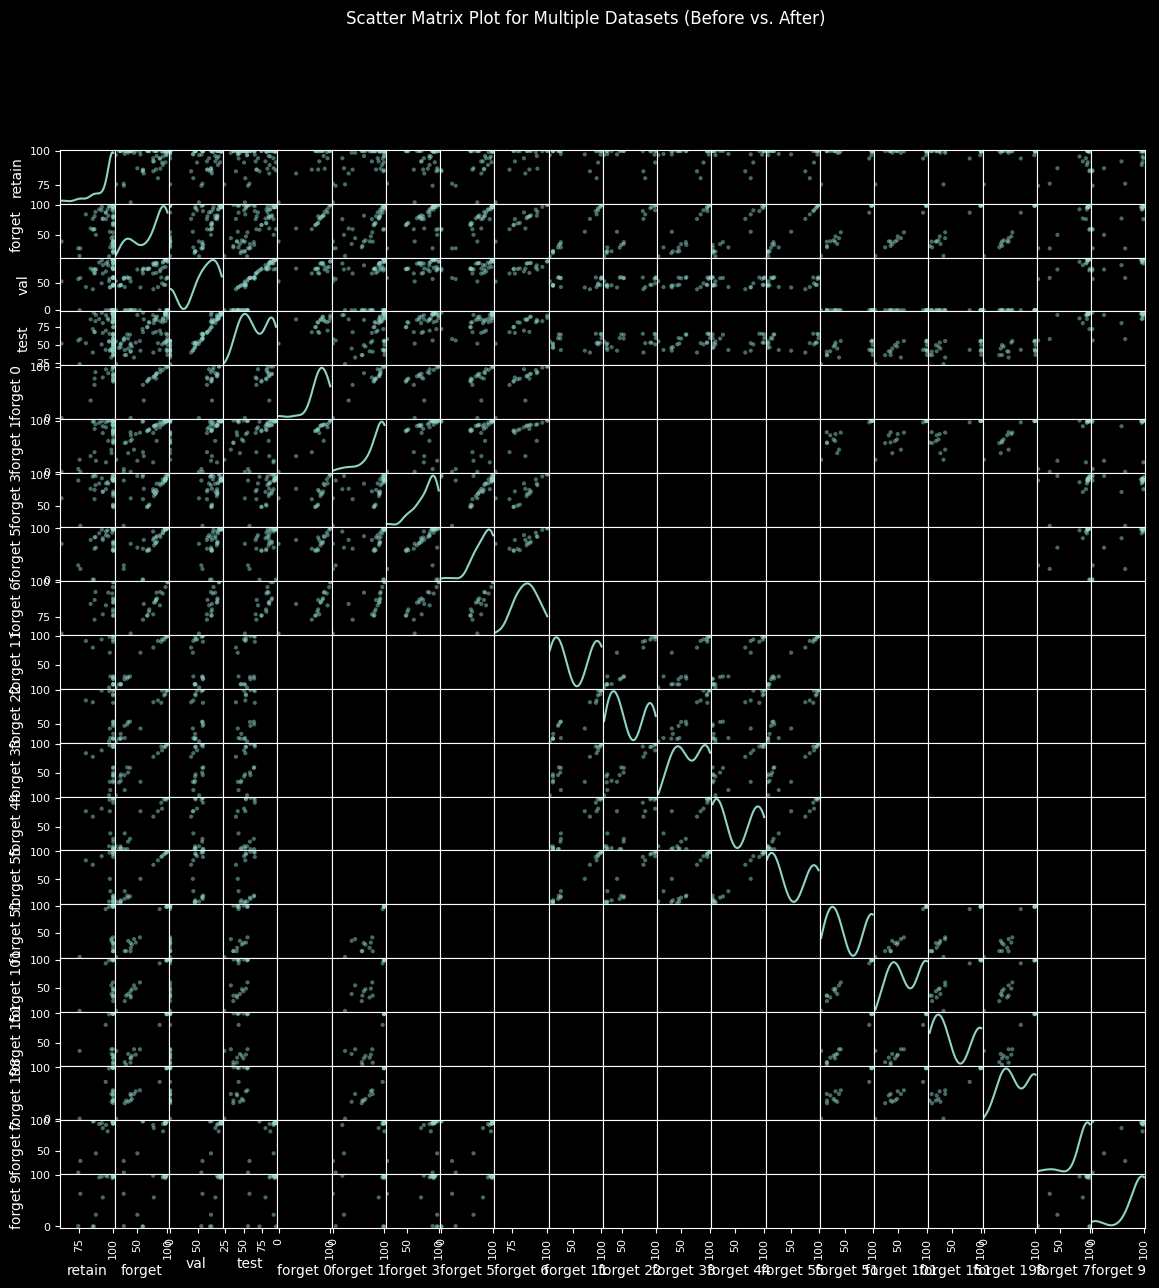

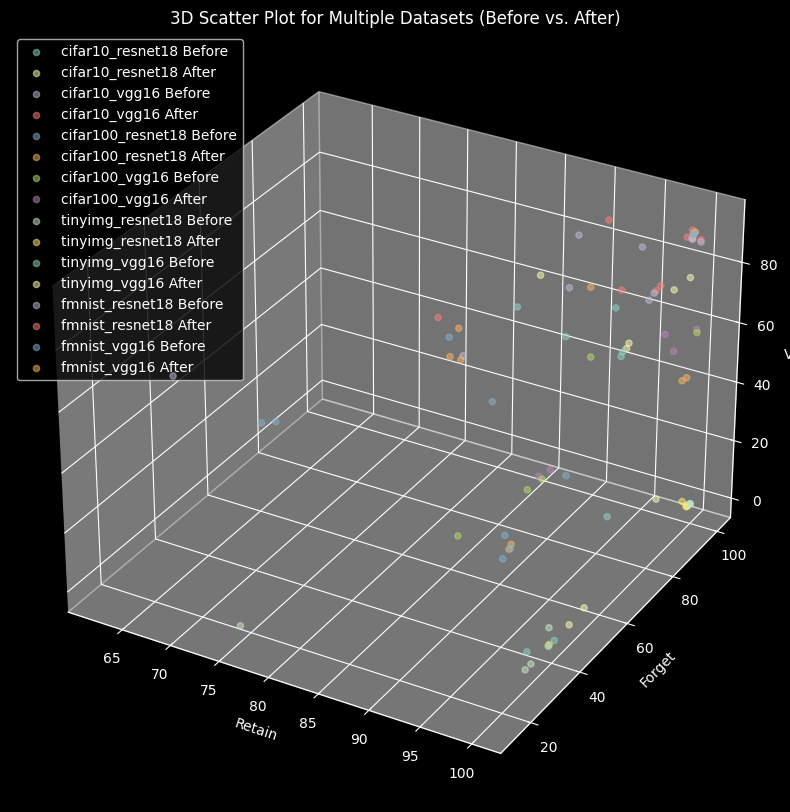

In [9]:
# Complex Visualizations for Multiple Scenarios

# Re-prepare data for visualization
def re_prepare_data(filtered_df):
    all_data = []
    for dataset in filtered_df.columns[1:]:
        for i, row in filtered_df.iterrows():
            data_row = json.loads(row[dataset])
            data_row['Method'] = row[0]
            data_row['Dataset'] = dataset
            all_data.append(data_row)
    return pd.DataFrame(all_data)

# Preparing data for 'ft_before' and 'ft_after' for all datasets
before_data_all = re_prepare_data(filtered_df)
after_data_all = re_prepare_data(filtered_after_df)

# Parallel Coordinates Plot with more details
plt.figure(figsize=(14, 10))
for dataset in before_data_all['Dataset'].unique():
    before_dataset_data = before_data_all[before_data_all['Dataset'] == dataset]
    after_dataset_data = after_data_all[after_data_all['Dataset'] == dataset]
    
    pd.plotting.parallel_coordinates(before_dataset_data.drop(columns=['Dataset']), 'Method', alpha=0.5, linestyle='--')
    pd.plotting.parallel_coordinates(after_dataset_data.drop(columns=['Dataset']), 'Method', alpha=0.5)

plt.title('Parallel Coordinates Plot for Multiple Datasets (Before vs. After)')
plt.xlabel('Metrics')
plt.ylabel('Standardized Values')
plt.legend(['Before'] + ['After'], loc='upper right')
plt.show()

# Violin Plot with more details
plt.figure(figsize=(16, 10))
combined_data_all = pd.concat([before_data_all.assign(Type='Before'), after_data_all.assign(Type='After')])
sns.violinplot(x='Dataset', y='retain', hue='Type', data=combined_data_all, split=True)
plt.title('Violin Plot for Multiple Datasets (Before vs. After)')
plt.xlabel('Dataset')
plt.ylabel('Retain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter Matrix Plot with more details
scatter_matrix(combined_data_all.drop(columns=['Method', 'Dataset', 'Type']), alpha=0.5, figsize=(14, 14), diagonal='kde')
plt.suptitle('Scatter Matrix Plot for Multiple Datasets (Before vs. After)')
plt.show()

# 3D Scatter Plot with more datasets and details
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
for dataset in before_data_all['Dataset'].unique():
    before_dataset_data = before_data_all[before_data_all['Dataset'] == dataset]
    after_dataset_data = after_data_all[after_data_all['Dataset'] == dataset]

    ax.scatter(before_dataset_data['retain'], before_dataset_data['forget'], before_dataset_data['val'], label=f'{dataset} Before', alpha=0.5)
    ax.scatter(after_dataset_data['retain'], after_dataset_data['forget'], after_dataset_data['val'], label=f'{dataset} After', alpha=0.5)

ax.set_xlabel('Retain')
ax.set_ylabel('Forget')
ax.set_zlabel('Val')
ax.set_title('3D Scatter Plot for Multiple Datasets (Before vs. After)')
ax.legend()
plt.show()



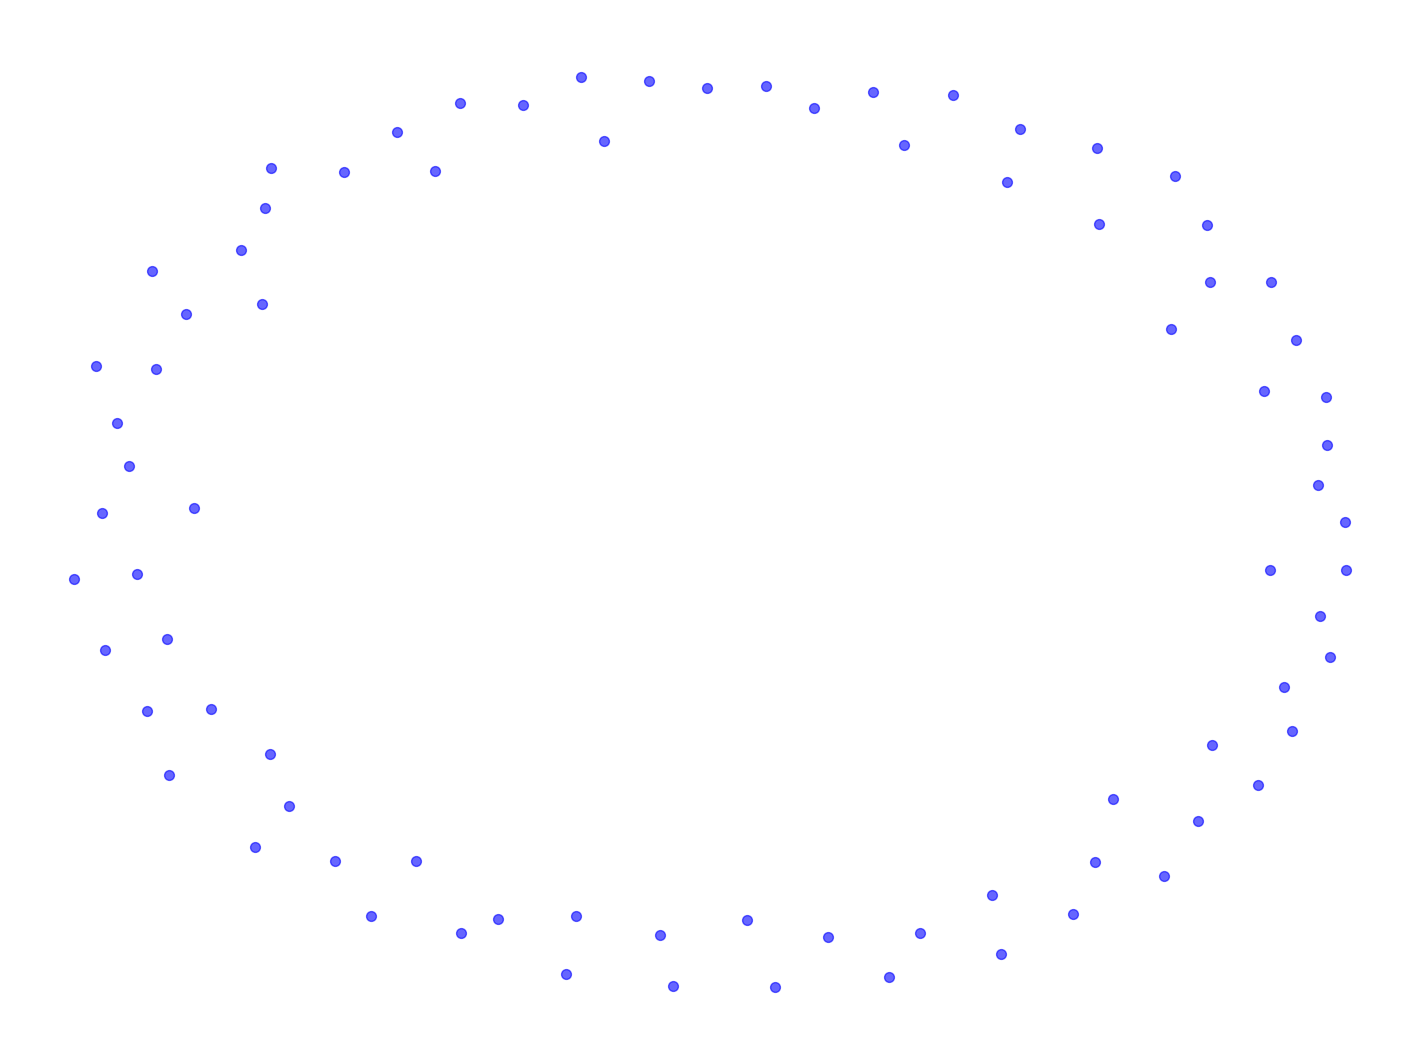

In [10]:
# Re-attempt the Network Graph with correct data handling
G = nx.Graph()

# Adding nodes and edges with combined data
for i, row in combined_data_all.iterrows():
    G.add_node(f"{row['Type']}_{row['Dataset']}_{i}", **row.to_dict())

# Calculate distance and add edges
for i, row1 in combined_data_all.iterrows():
    for j, row2 in combined_data_all.iterrows():
        if row1['Type'] != row2['Type']:
            data1 = np.array(list(row1.drop(['Method', 'Dataset', 'Type'])))
            data2 = np.array(list(row2.drop(['Method', 'Dataset', 'Type'])))
            distance = np.linalg.norm(data1 - data2)  # Correct usage of np.linalg.norm
            if distance < threshold:
                G.add_edge(f"{row1['Type']}_{row1['Dataset']}_{i}", f"{row2['Type']}_{row2['Dataset']}_{j}", weight=distance)

pos = nx.spring_layout(G, k=0.1)
plt.figure(figsize=(14, 10))
nx.draw(G, pos, with_labels=False, node_size=50, node_color='blue', edge_color='grey', alpha=0.6)
plt.title('Complex Network Graph for Multiple Datasets (Before vs. After)')
plt.show()


# TEST

## 雷达图

In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import zipfile

# # Step 1: Unzip the files
# ft_before_extract_path = '/mnt/data/ft_before_corrected'
# ft_after_extract_path = '/mnt/data/ft_after_corrected'

# with zipfile.ZipFile('/mnt/data/ft_before.zip', 'r') as zip_ref:
#     zip_ref.extractall(ft_before_extract_path)

# with zipfile.ZipFile('/mnt/data/ft_after.zip', 'r') as zip_ref:
#     zip_ref.extractall(ft_after_extract_path)

# # Step 2: Define the paths for 'unlearn_acc.csv' files

# ft_before_correct_path = os.path.join(ft_before_extract_path, 'ft_before', 'unlearn_acc.csv')
# ft_after_correct_path = os.path.join(ft_after_extract_path, 'ft_after', 'unlearn_acc.csv')

ft_before_correct_path = os.path.join('ft_before', 'unlearn_acc.csv')
ft_after_correct_path = os.path.join('ft_after', 'unlearn_acc.csv')

# Step 3: Load the CSV files into DataFrames
unlearn_acc_df = pd.read_csv(ft_before_correct_path)
unlearn_acc_after_df = pd.read_csv(ft_after_correct_path)

# Step 4: Correct the JSON format in the DataFrames
def correct_json_format(json_str):
    return json_str.replace("'", '"')

unlearn_acc_df_corrected = unlearn_acc_df.copy()
unlearn_acc_after_df_corrected = unlearn_acc_after_df.copy()

for i in range(1, unlearn_acc_df_corrected.shape[1]):
    unlearn_acc_df_corrected.iloc[:, i] = unlearn_acc_df_corrected.iloc[:, i].apply(correct_json_format)
    unlearn_acc_after_df_corrected.iloc[:, i] = unlearn_acc_after_df_corrected.iloc[:, i].apply(correct_json_format)

# Step 5: Filter out rows with non-dictionary JSON data
def is_valid_json(val):
    try:
        data = json.loads(val)
        return isinstance(data, dict)
    except (json.JSONDecodeError, TypeError):
        return False

filtered_df = unlearn_acc_df_corrected.copy()
filtered_after_df = unlearn_acc_after_df_corrected.copy()

for col in filtered_df.columns[1:]:
    filtered_df = filtered_df[filtered_df[col].apply(is_valid_json)]
    filtered_after_df = filtered_after_df[filtered_after_df[col].apply(is_valid_json)]

# Step 6: Extract the valid data keys
first_valid_data_cell = json.loads(filtered_df.iloc[0, 1])
valid_data_keys = first_valid_data_cell.keys()



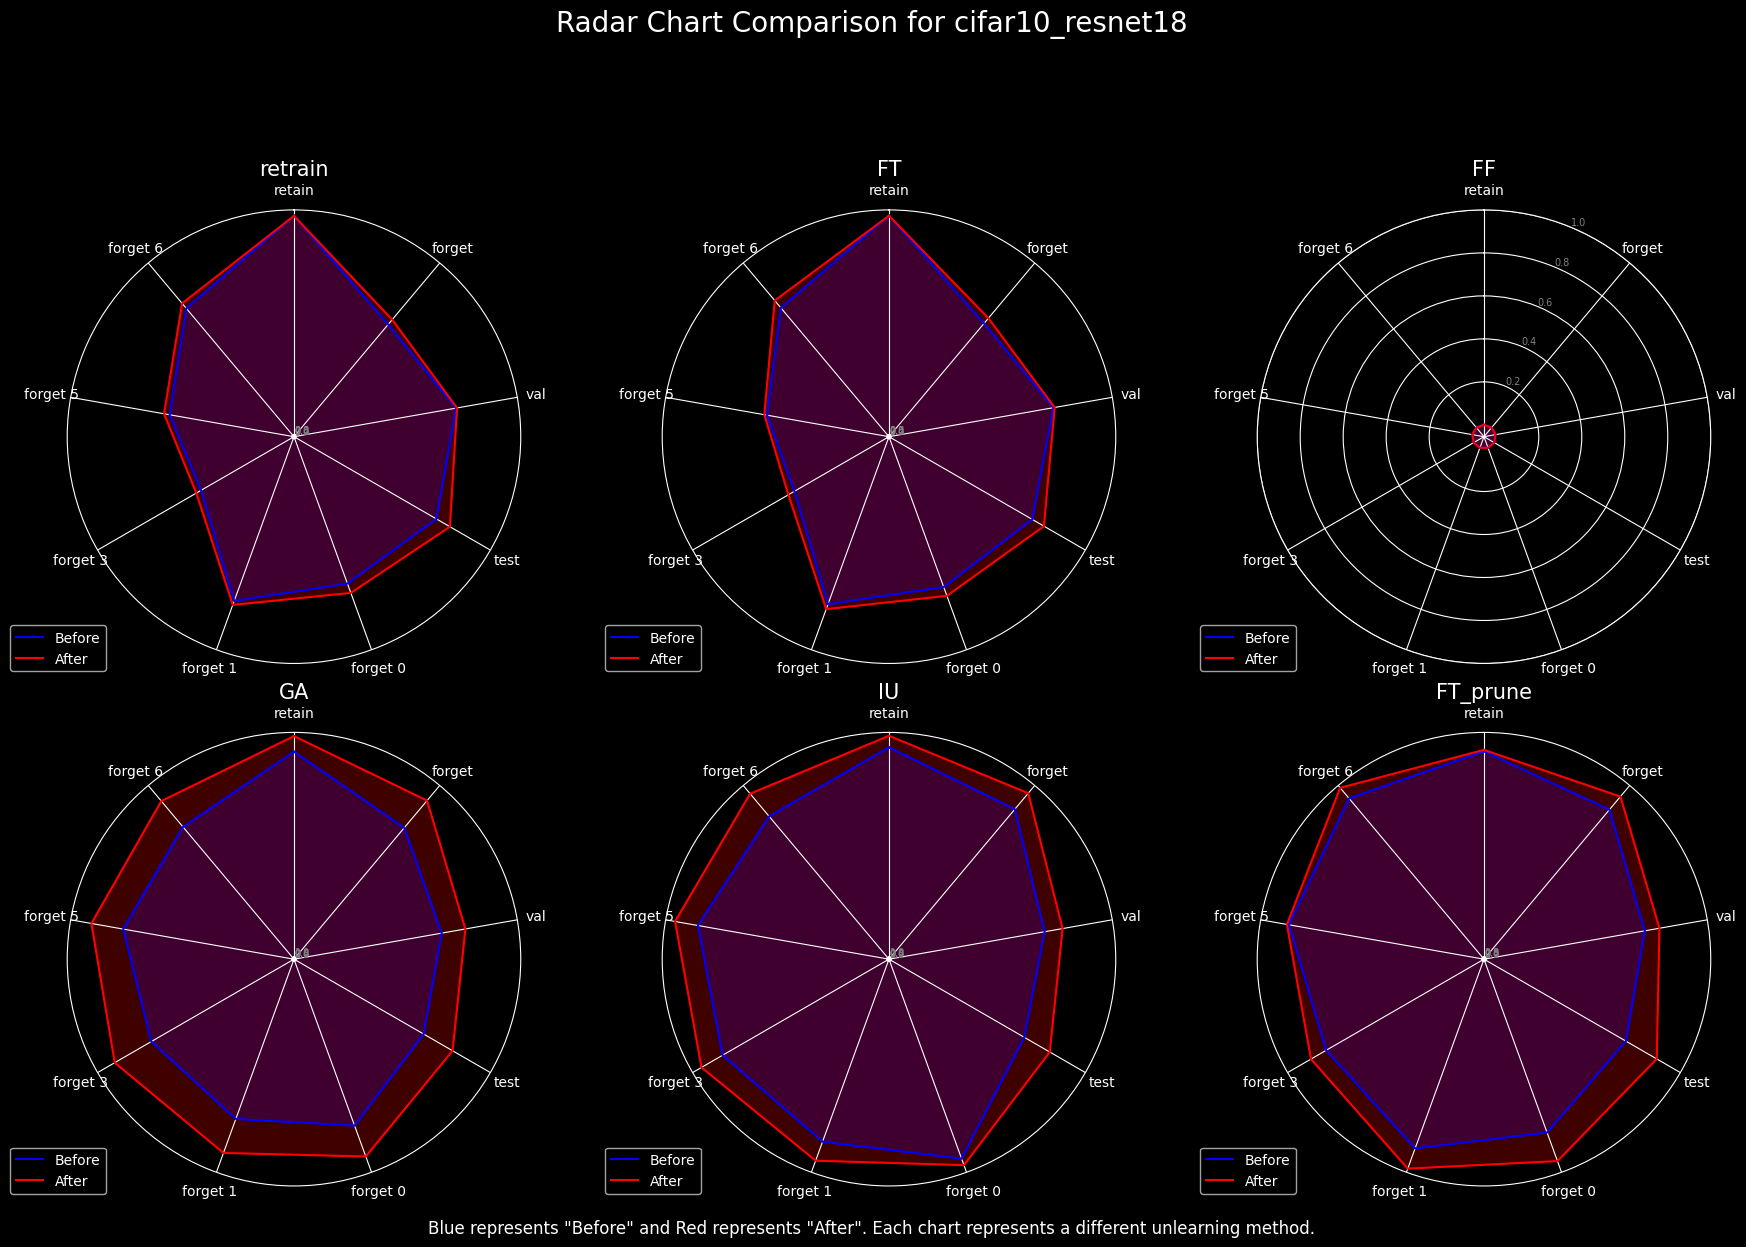

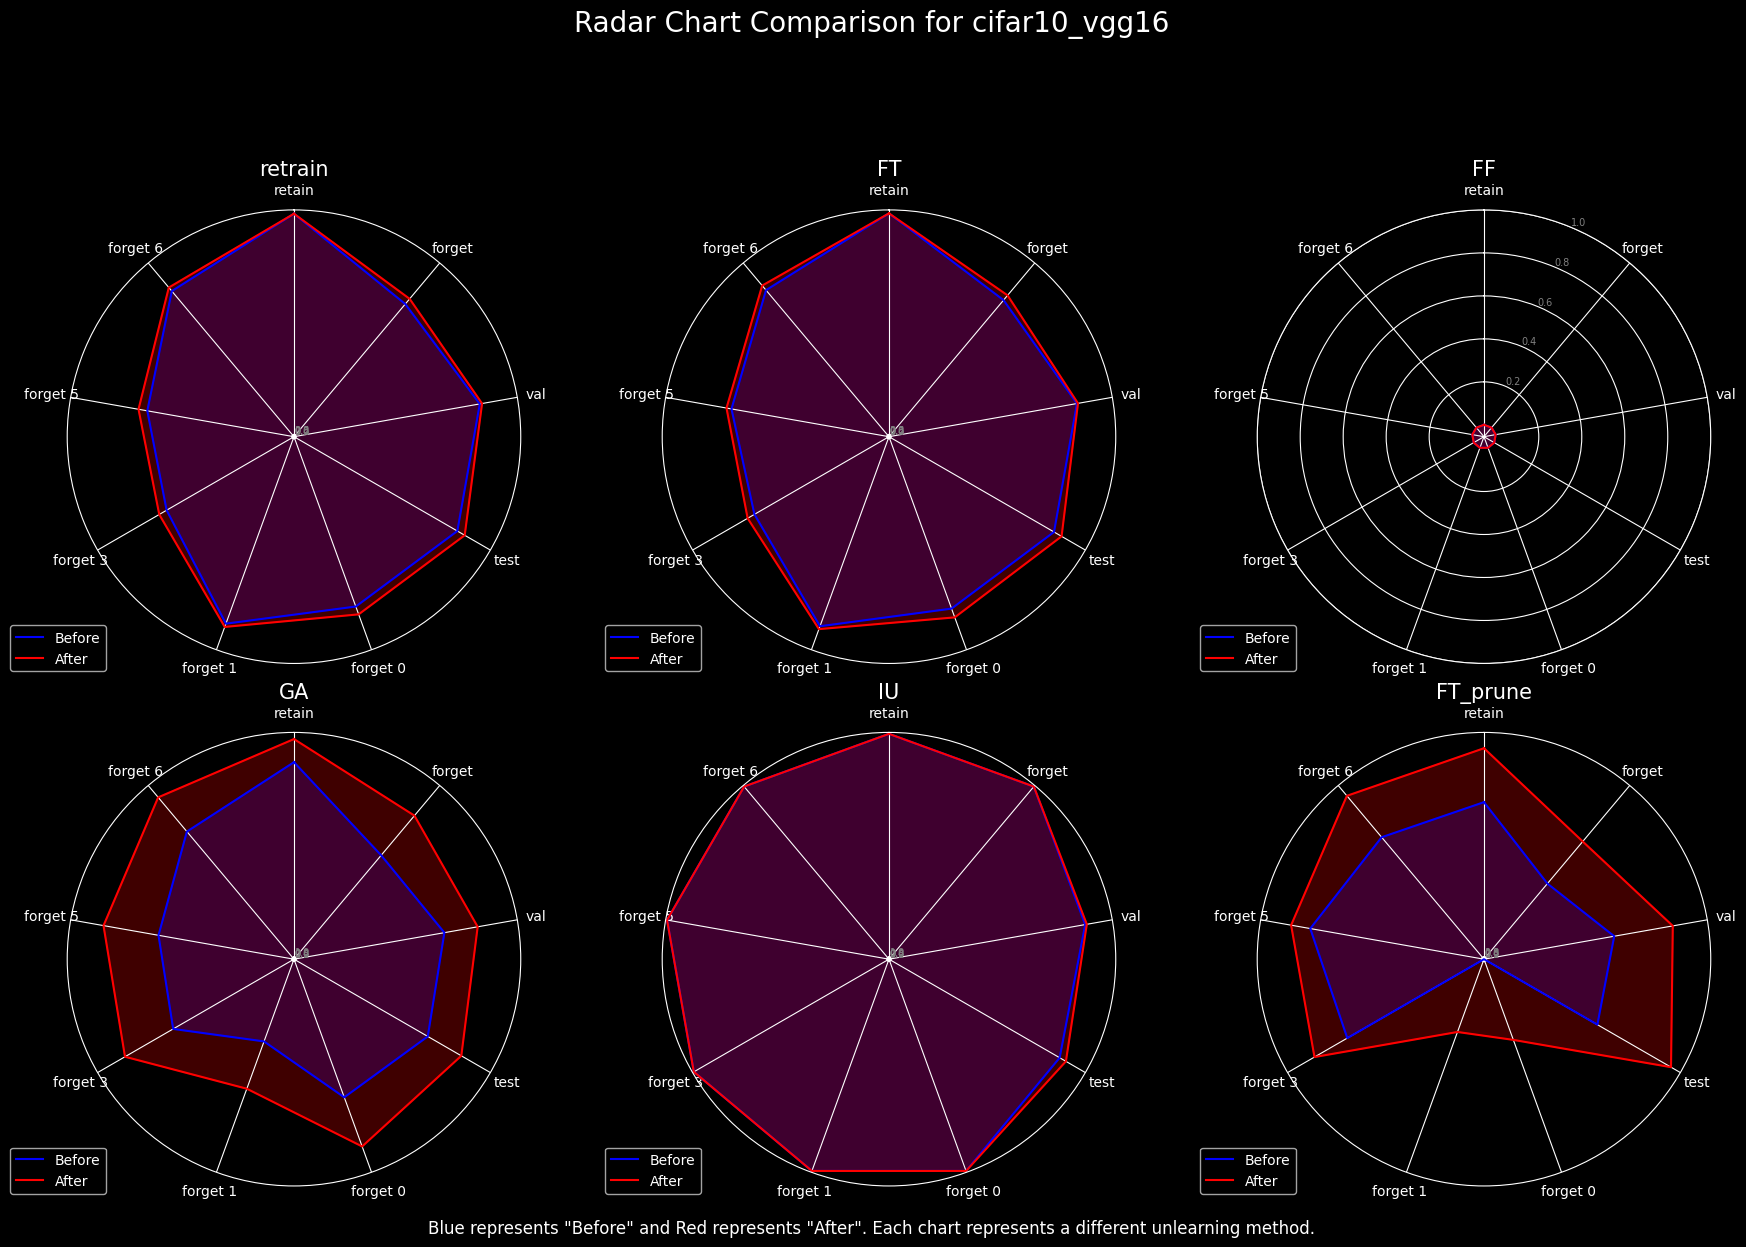

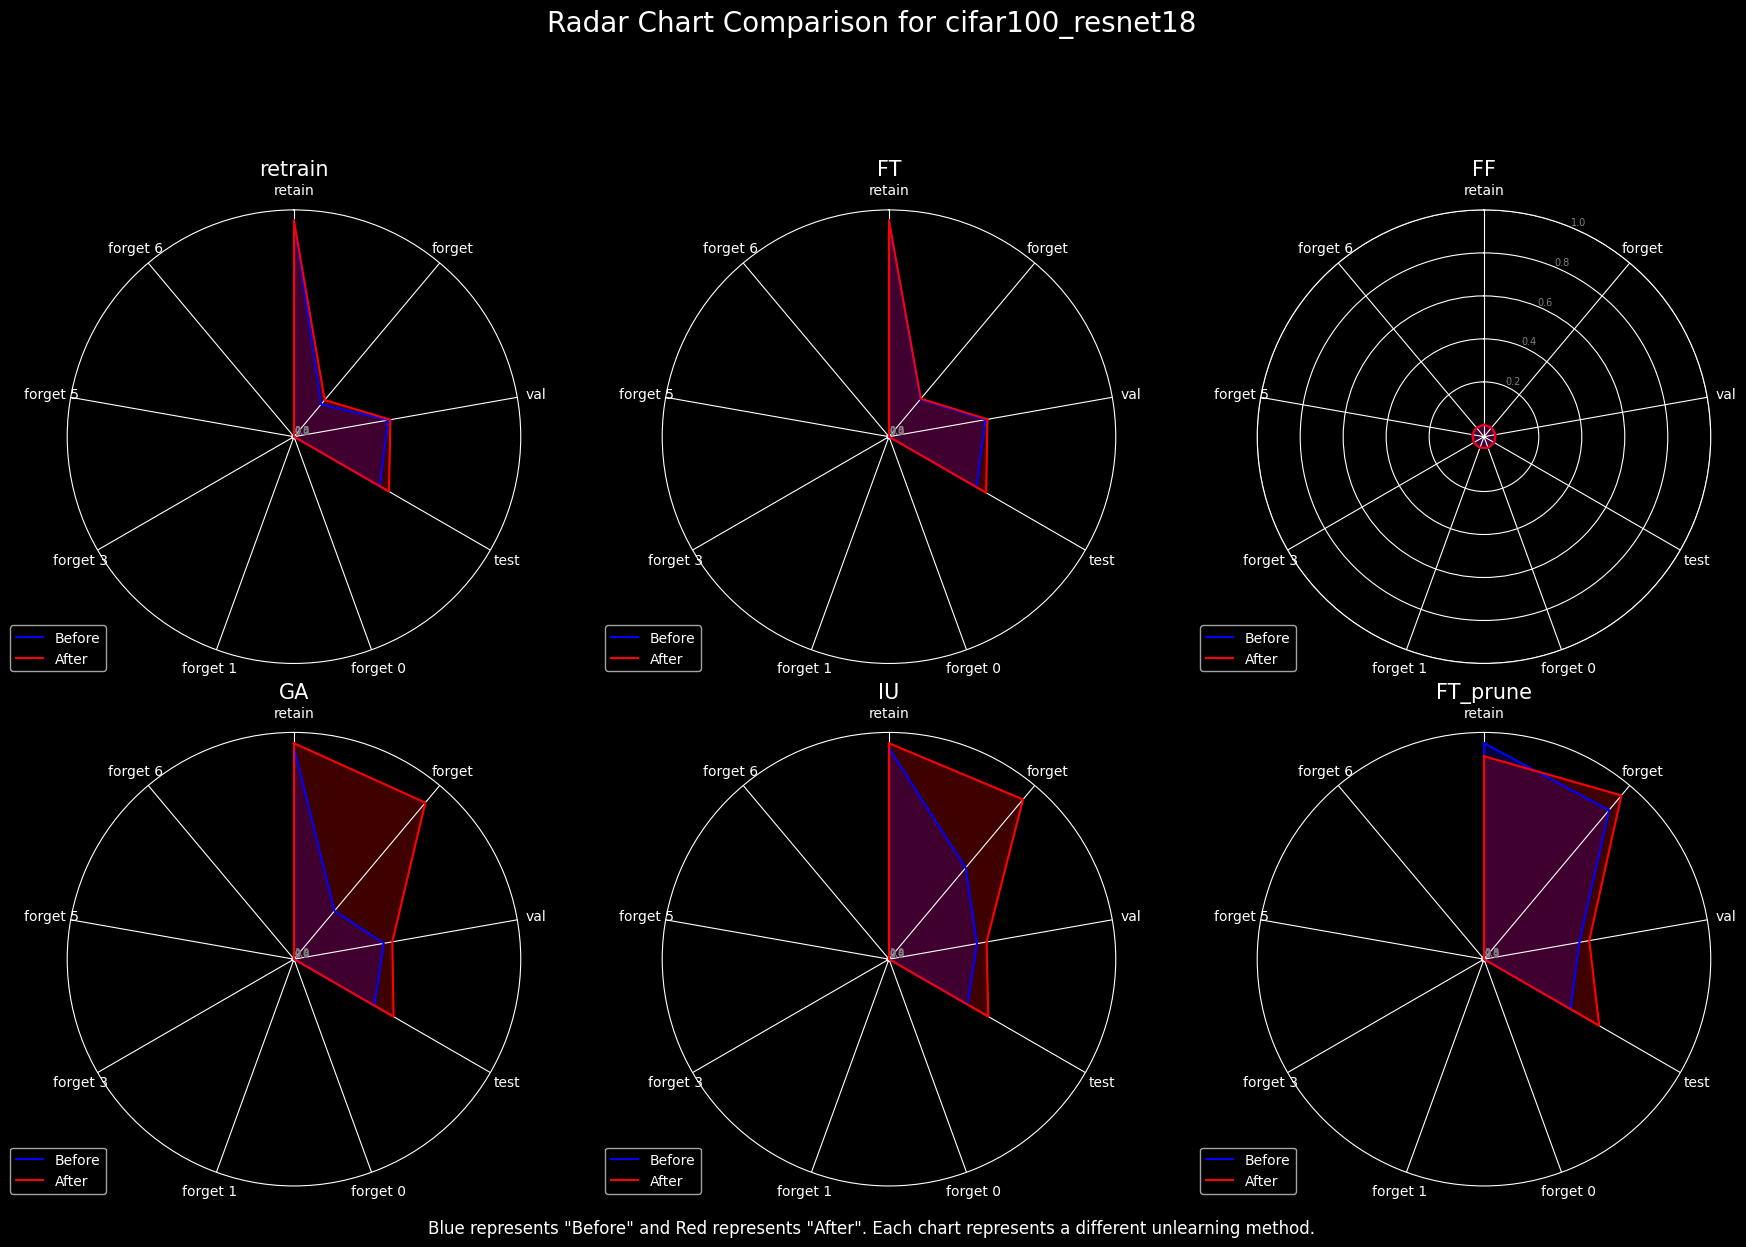

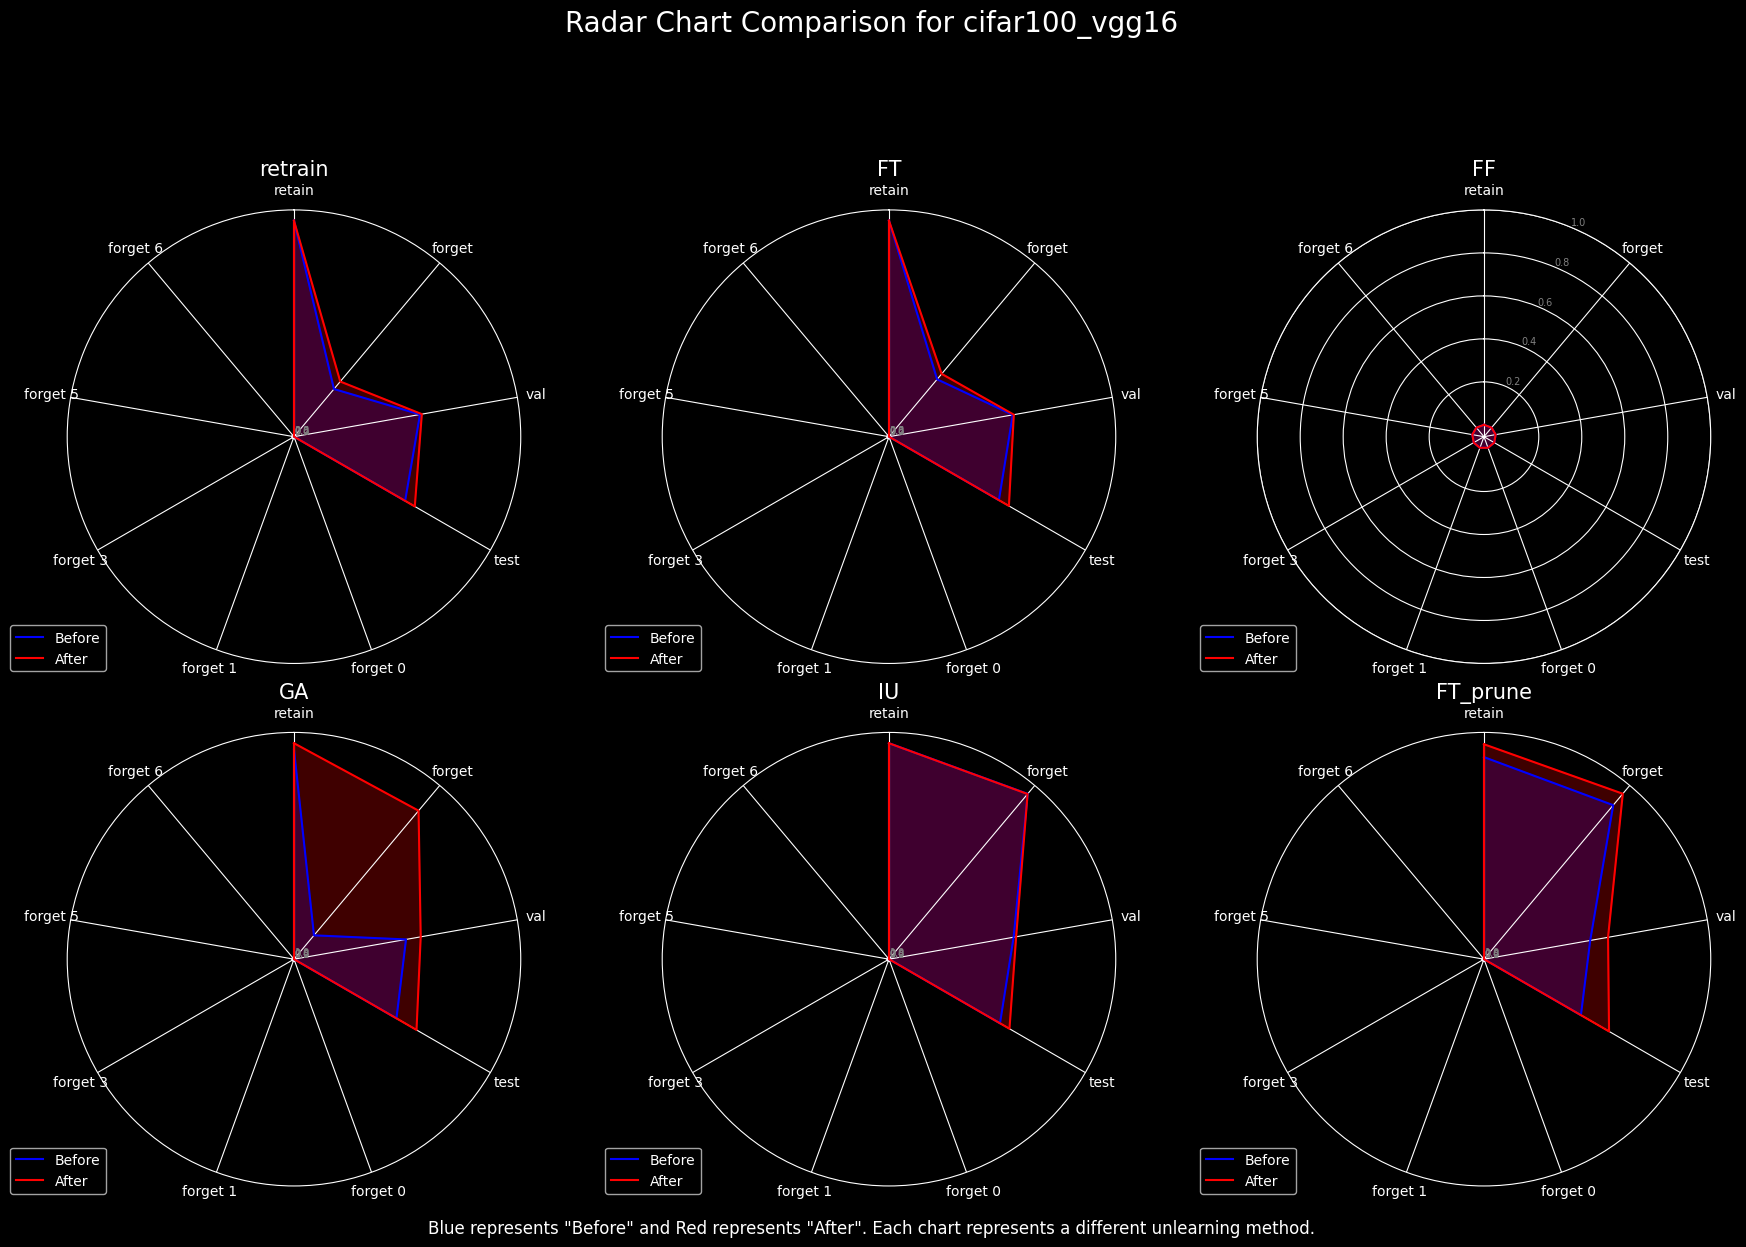

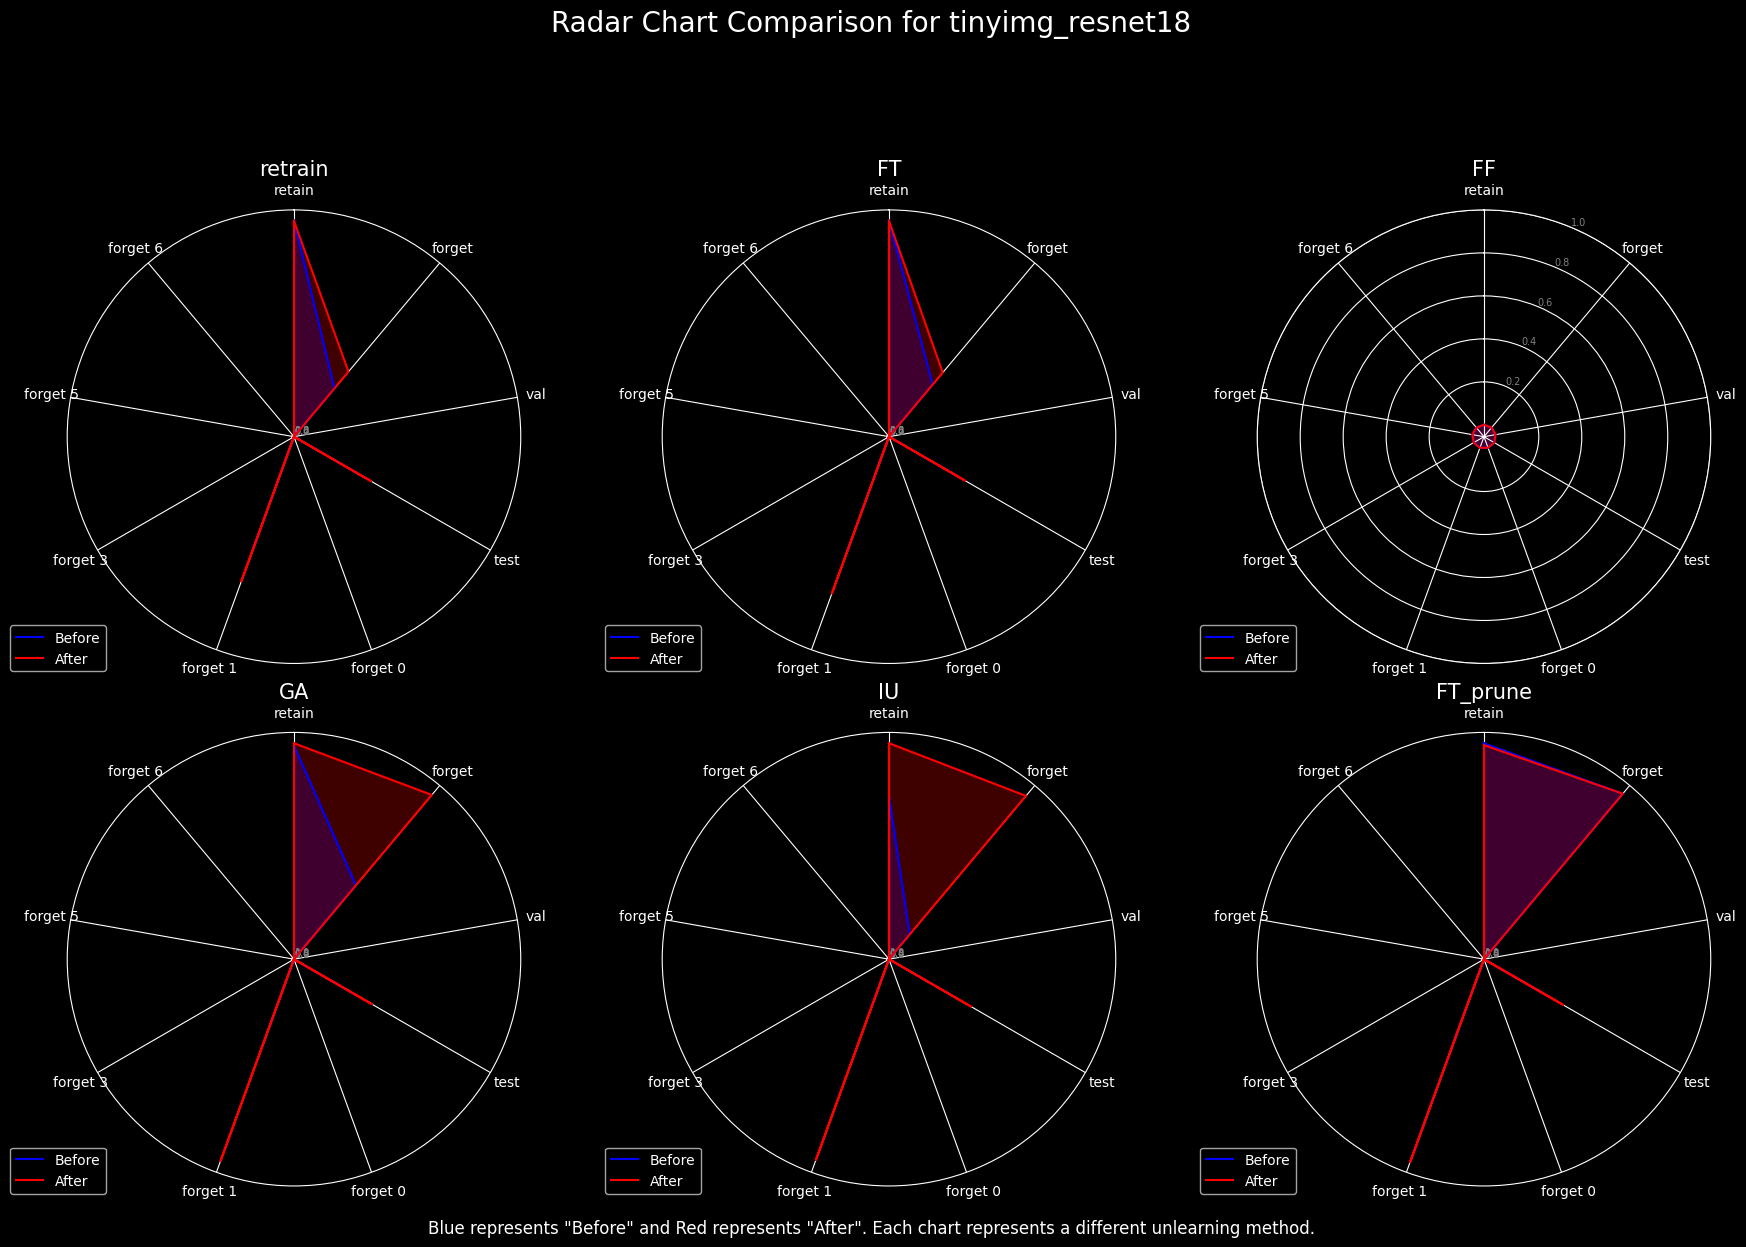

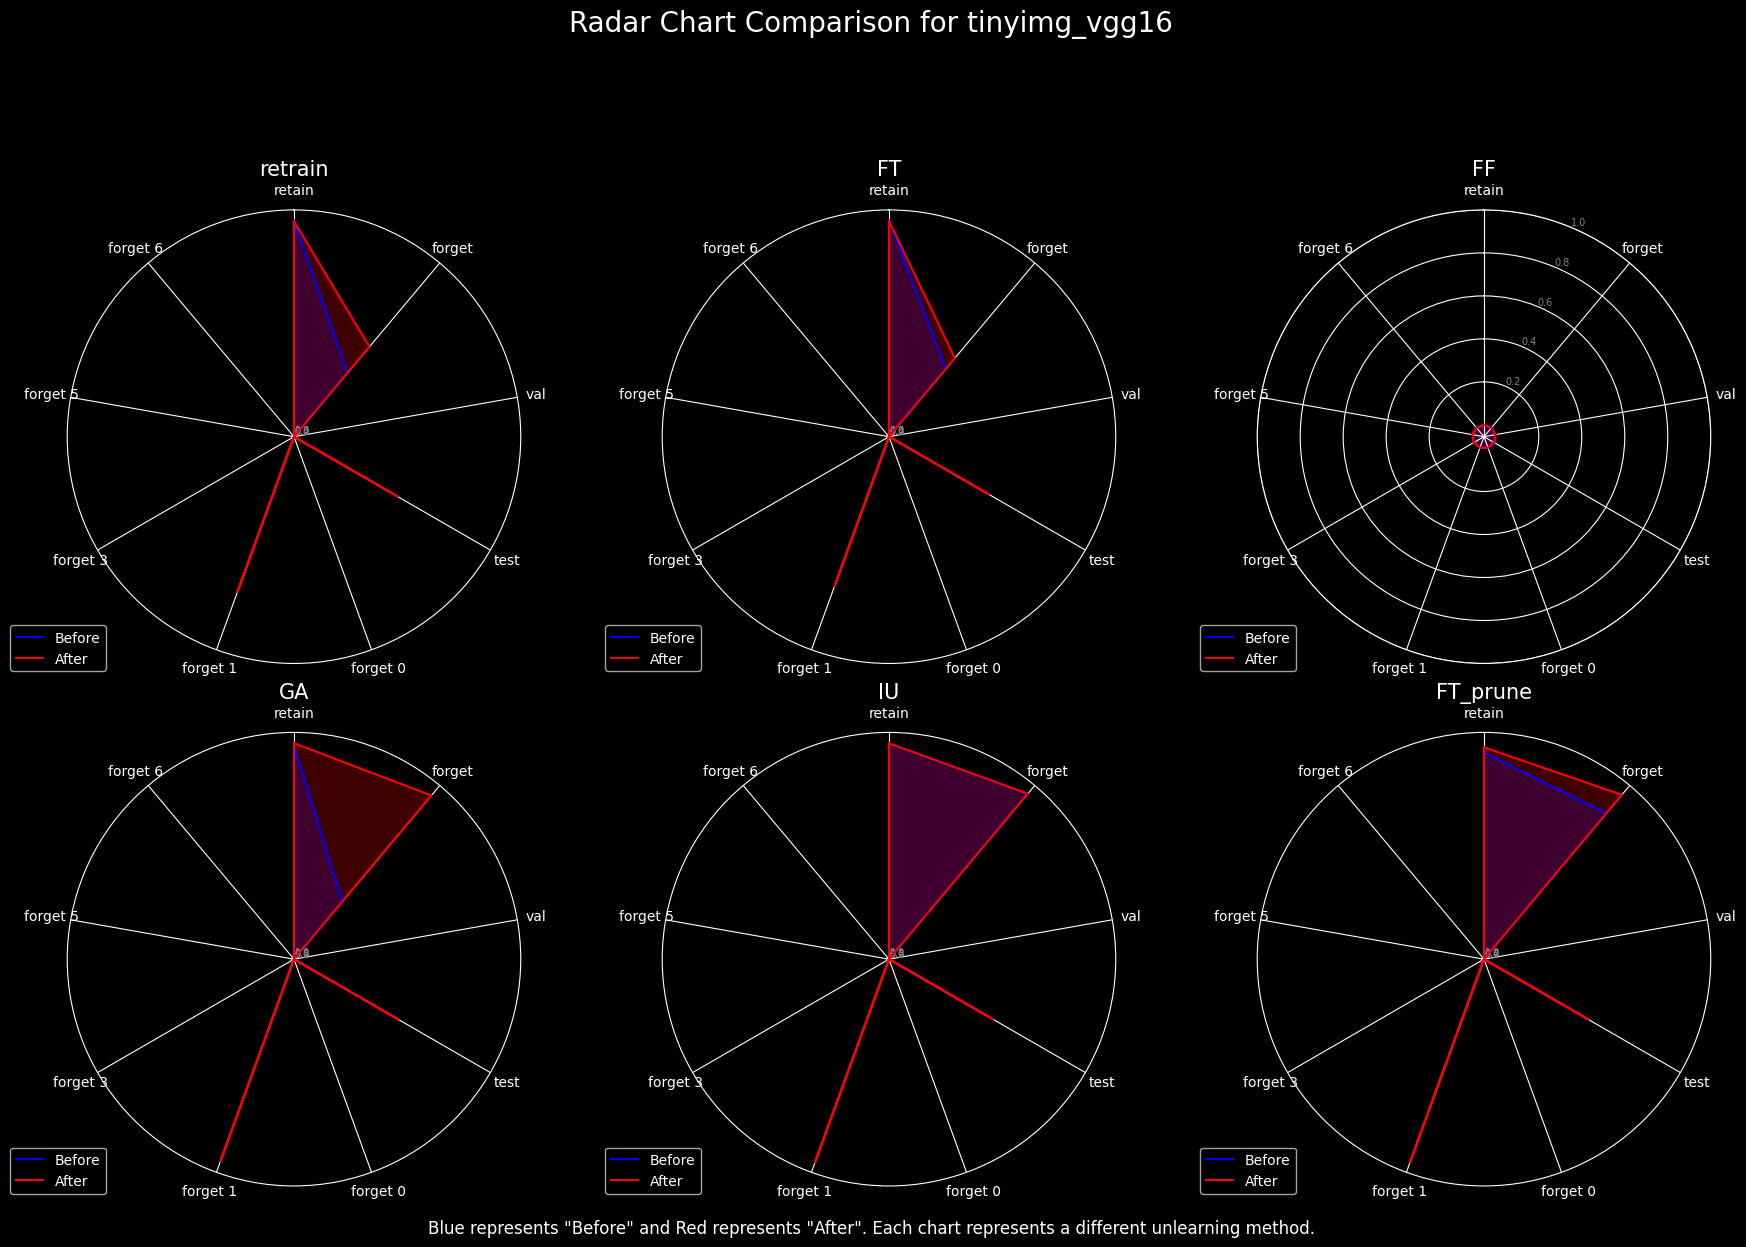

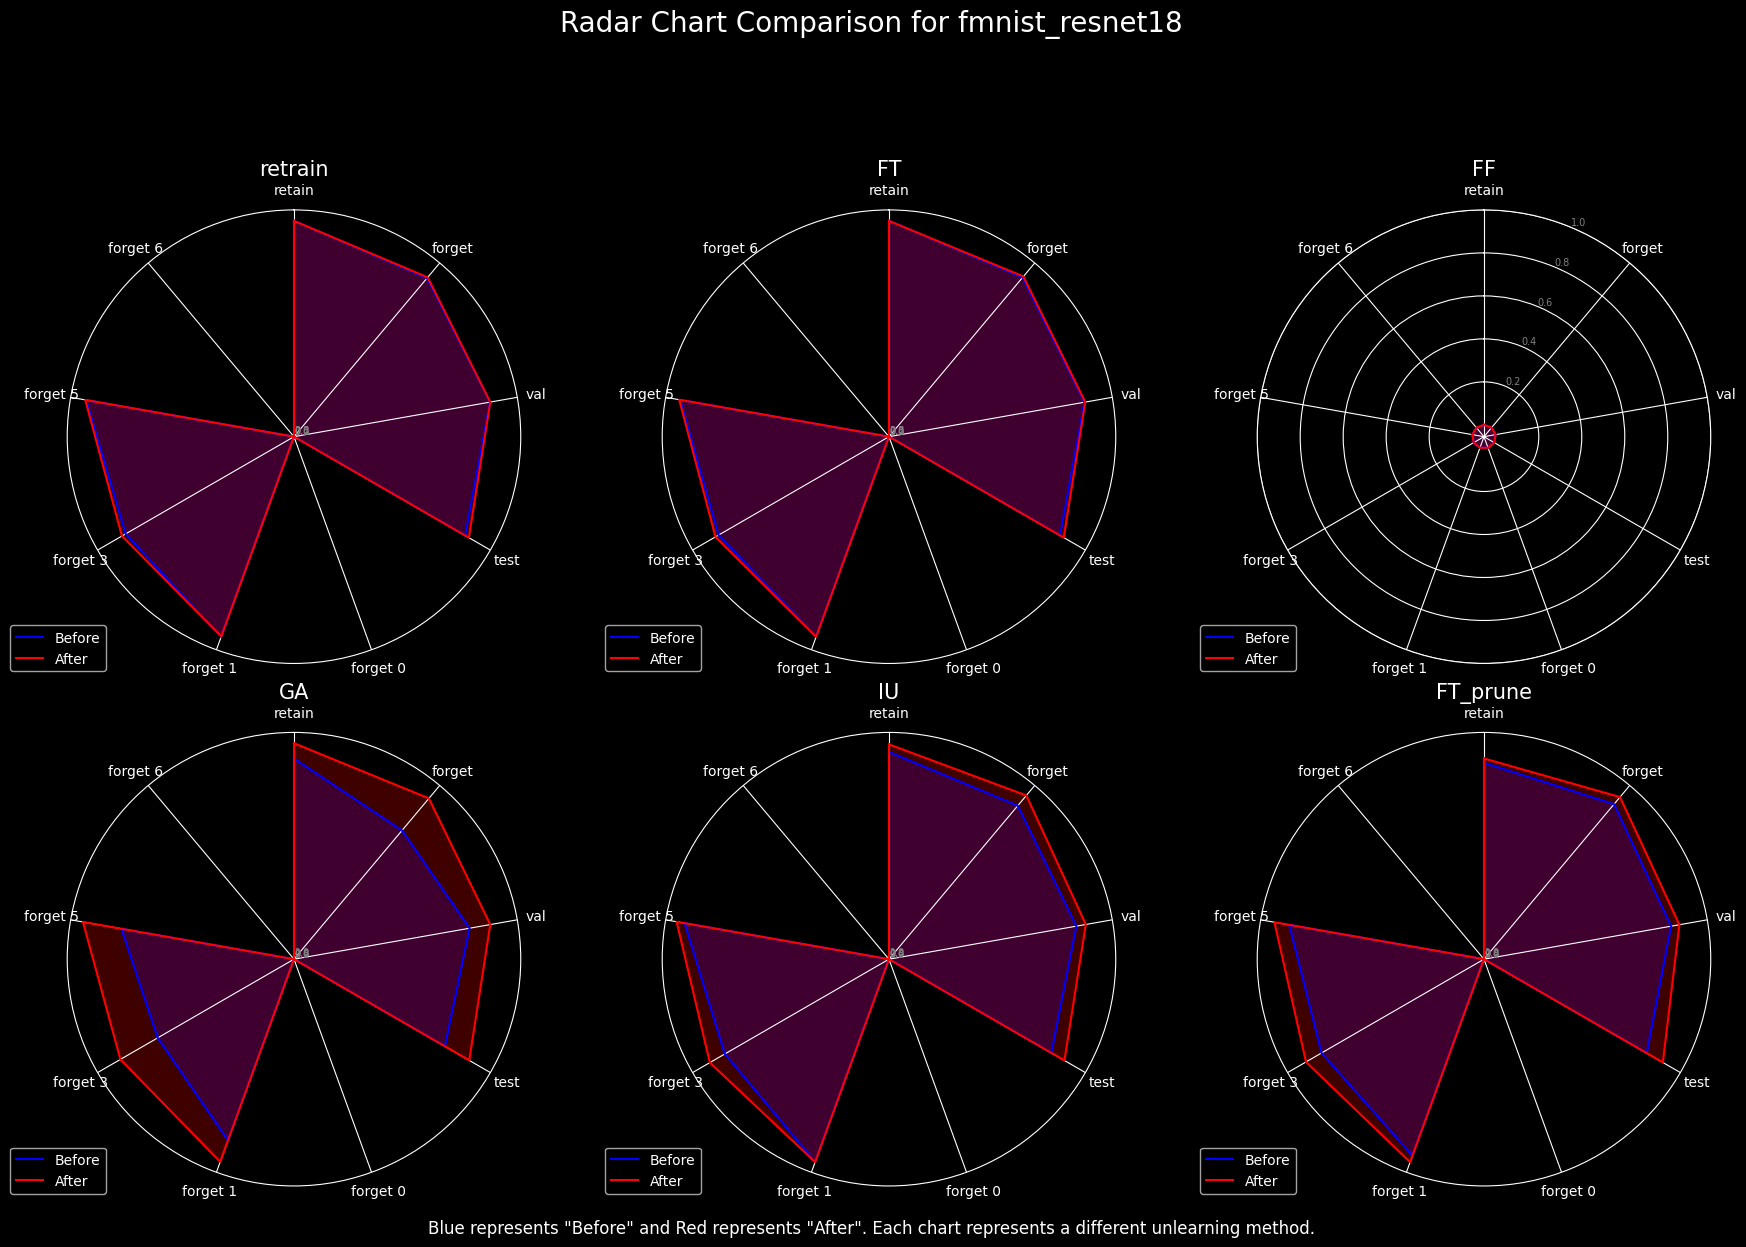

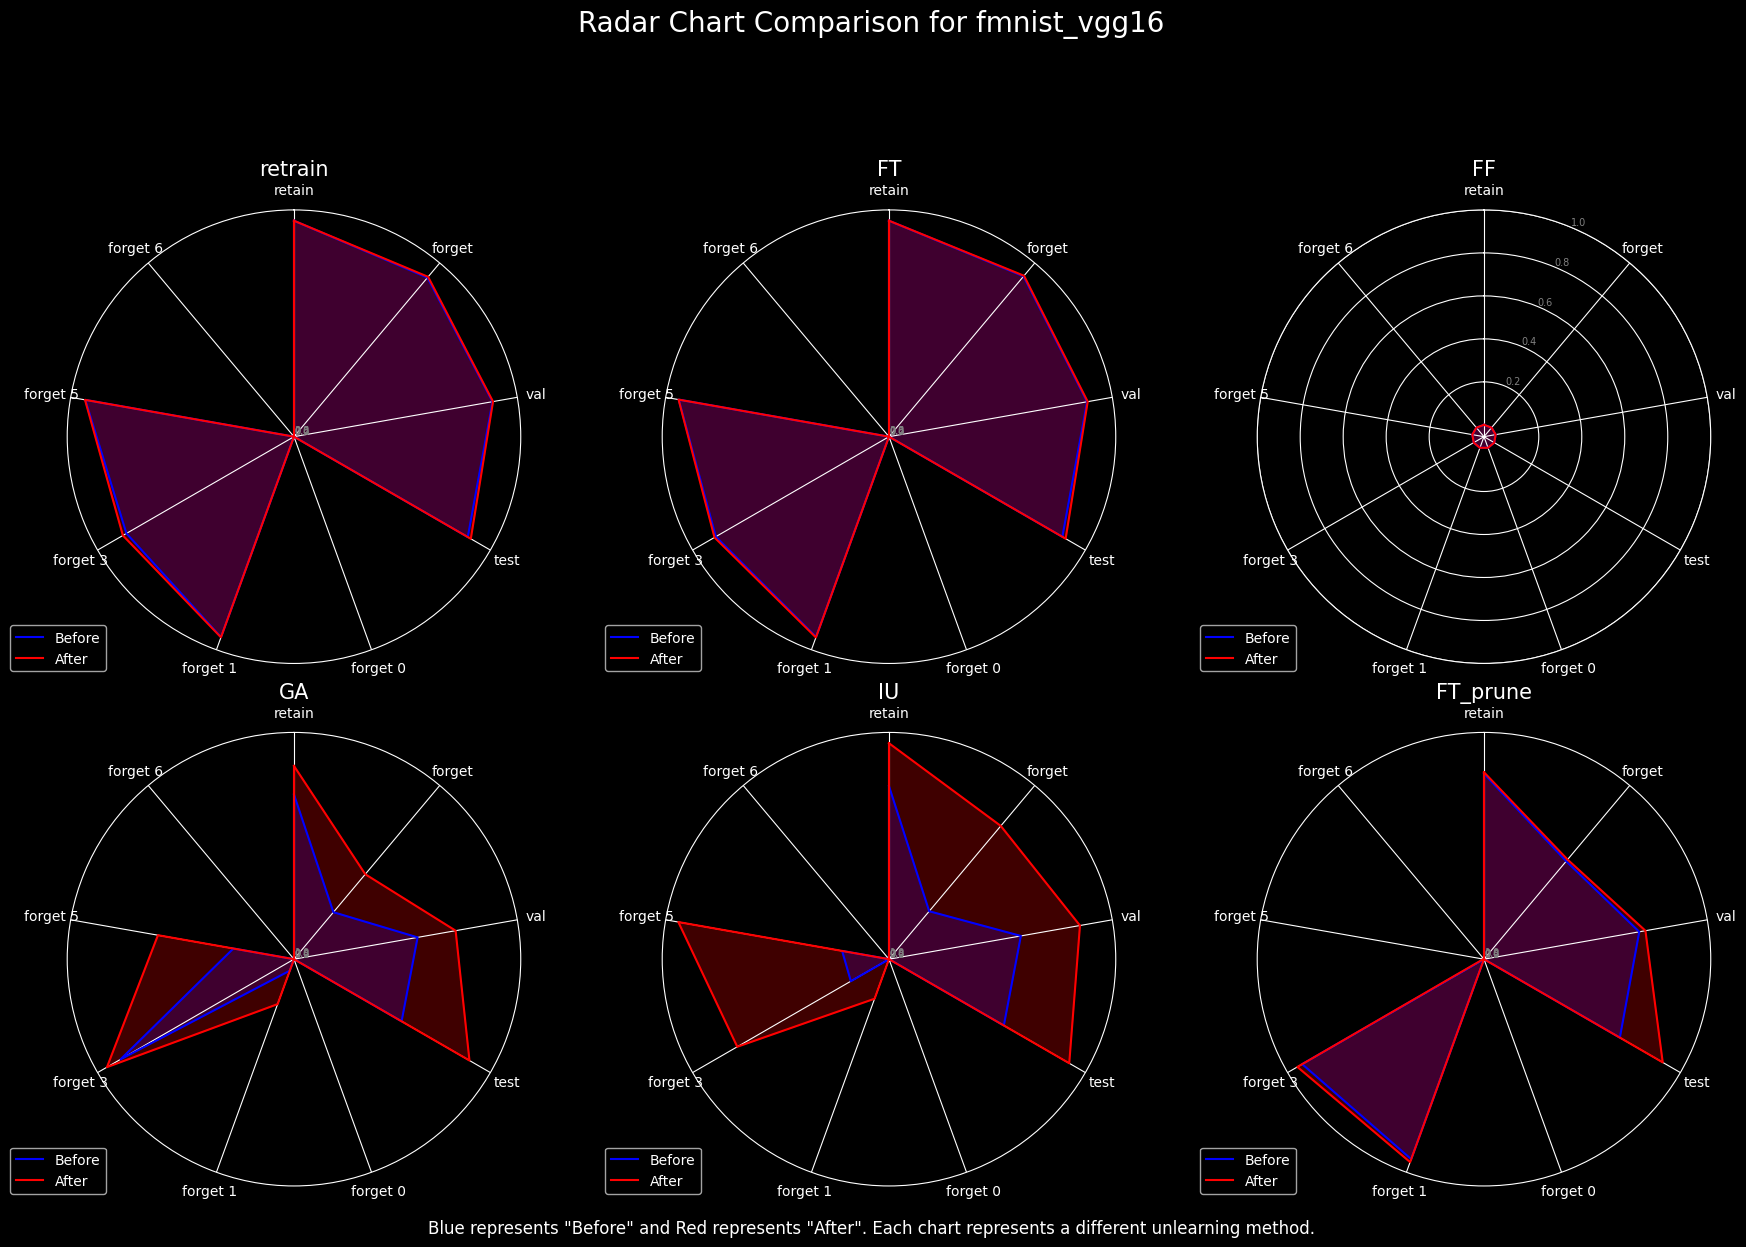

In [8]:
def plot_radar_chart_comparison(before_data, after_data, labels, dataset_title, methods):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    before_data = np.concatenate((before_data, before_data[:, [0]]), axis=1)
    after_data = np.concatenate((after_data, after_data[:, [0]]), axis=1)
    angles += angles[:1]

    fig, axs = plt.subplots(2, 3, figsize=(18, 12), subplot_kw=dict(polar=True))
    axs = axs.flatten()
    fig.suptitle(f'Radar Chart Comparison for {dataset_title}', size=20, y=1.03)

    for i, method in enumerate(methods):
        axs[i].plot(angles, before_data[i], label='Before', color='blue')
        axs[i].fill(angles, before_data[i], color='blue', alpha=0.25)
        axs[i].plot(angles, after_data[i], label='After', color='red')
        axs[i].fill(angles, after_data[i], color='red', alpha=0.25)

        axs[i].set_theta_offset(np.pi / 2)
        axs[i].set_theta_direction(-1)
        axs[i].set_xticks(angles[:-1])
        axs[i].set_xticklabels(labels)
        axs[i].set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
        axs[i].set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], color="grey", size=7)
        axs[i].set_title(method, size=15)
        axs[i].grid(True)
        axs[i].legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.figtext(0.5, 0.01, 'Blue represents "Before" and Red represents "After". Each chart represents a different unlearning method.', ha='center', fontsize=12)
    plt.show()

methods = ['retrain', 'FT', 'FF', 'GA', 'IU', 'FT_prune']

# Process and plot for each dataset and model combination
for dataset in datasets:
    # Get data for ft_before
    before_data = []
    for method in methods:
        method_data = []
        row = filtered_df[filtered_df.iloc[:, 0] == method]
        if not row.empty:
            before_data_json = json.loads(row[dataset].values[0])
            method_data = [before_data_json.get(key, 0) for key in valid_data_keys]
        else:
            method_data = [0] * len(valid_data_keys)
        before_data.append(method_data)
    
    # Get data for ft_after
    after_data = []
    for method in methods:
        method_data = []
        row = filtered_after_df[filtered_after_df.iloc[:, 0] == method]
        if not row.empty:
            after_data_json = json.loads(row[dataset].values[0])
            method_data = [after_data_json.get(key, 0) for key in valid_data_keys]
        else:
            method_data = [0] * len(valid_data_keys)
        after_data.append(method_data)
    
    # Plot radar charts for ft_before and ft_after
    plot_radar_chart_comparison(np.array(before_data), np.array(after_data), valid_data_keys, dataset, methods)
